In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
def ignore(*args, **kwargs):
    pass
warnings.warn=ignore

In [3]:
from scipy import stats
from scipy.stats import norm, skew

In [4]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
null_data=train.isnull().sum()
null_data=null_data.sort_values(ascending=False)
miss_data=pd.DataFrame({'Null SUM':null_data})
miss_data.head(25)

,Null SUM
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
LotFrontage,259
GarageCond,81
GarageType,81
GarageYrBlt,81
GarageFinish,81


In [6]:
null_data=test.isnull().sum()
null_data=null_data.sort_values(ascending=False)
miss_data=pd.DataFrame({'Null SUM':null_data})
miss_data.head(40)

,Null SUM
PoolQC,1456
MiscFeature,1408
Alley,1352
Fence,1169
FireplaceQu,730
LotFrontage,227
GarageCond,78
GarageQual,78
GarageYrBlt,78
GarageFinish,78


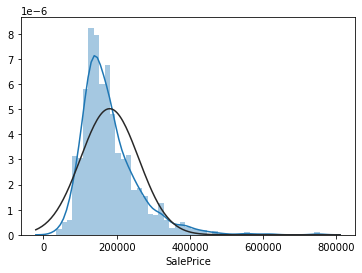

In [7]:
sns.distplot(train['SalePrice'], fit=norm)


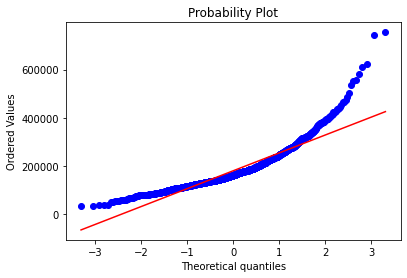

In [8]:
stats.probplot(train['SalePrice'],plot=plt)
plt.show()

In [9]:
(train.corr()**2)['SalePrice'].sort_values(ascending=False)[1:]

OverallQual      0.625652
GrLivArea        0.502149
GarageCars       0.410124
GarageArea       0.388667
TotalBsmtSF      0.376481
1stFlrSF         0.367057
FullBath         0.314344
TotRmsAbvGrd     0.284860
YearBuilt        0.273422
YearRemodAdd     0.257151
GarageYrBlt      0.236548
MasVnrArea       0.228000
Fireplaces       0.218023
BsmtFinSF1       0.149320
LotFrontage      0.123763
WoodDeckSF       0.105244
2ndFlrSF         0.101974
OpenPorchSF      0.099765
HalfBath         0.080717
LotArea          0.069613
BsmtFullBath     0.051585
BsmtUnfSF        0.046001
BedroomAbvGr     0.028296
KitchenAbvGr     0.018471
EnclosedPorch    0.016532
ScreenPorch      0.012420
PoolArea         0.008538
MSSubClass       0.007104
OverallCond      0.006062
MoSold           0.002156
3SsnPorch        0.001988
YrSold           0.000837
LowQualFinSF     0.000656
Id               0.000480
MiscVal          0.000449
BsmtHalfBath     0.000284
BsmtFinSF2       0.000129
Name: SalePrice, dtype: float64

In [10]:
train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<400000)].index,inplace=True)

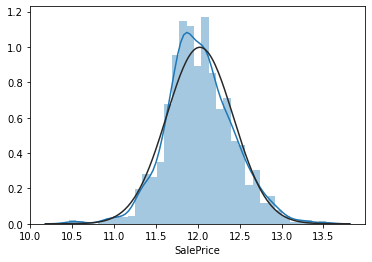

In [11]:
train['SalePrice']=np.log1p(train['SalePrice'])

sns.distplot(train['SalePrice'], fit=norm)

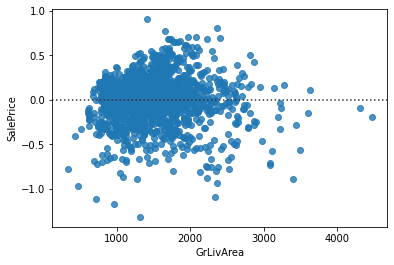

In [12]:
sns.residplot(x = train.GrLivArea, y = train.SalePrice);

In [13]:
train.shape

(1458, 81)

In [14]:
train.drop(columns=['Id'], axis=1, inplace=True)
test.drop(columns=['Id'], axis=1, inplace=True)

y=train.SalePrice.reset_index(drop=True)

p_train=train.copy()

In [15]:
train = train.drop(['SalePrice'], axis=1)

In [16]:
all_data=pd.concat((train,test)).reset_index(drop=True)



In [17]:
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)
missing_val_col = ["Alley", 
                   "PoolQC", 
                   "MiscFeature",
                   "Fence",
                   "FireplaceQu",
                   "GarageType",
                   "GarageFinish",
                   "GarageQual",
                   "GarageCond",
                   'BsmtQual',
                   'BsmtCond',
                   'BsmtExposure',
                   'BsmtFinType1',
                   'BsmtFinType2',
                   'MasVnrType']

for i in missing_val_col:
    all_data[i] = all_data[i].fillna('None')

In [18]:
missing_val_col2 = ['BsmtFinSF1',
                    'BsmtFinSF2',
                    'BsmtUnfSF',
                    'TotalBsmtSF',
                    'BsmtFullBath', 
                    'BsmtHalfBath', 
                    'GarageYrBlt',
                    'GarageArea',
                    'GarageCars',
                    'MasVnrArea']

for i in missing_val_col2:
    all_data[i] = all_data[i].fillna(0)

In [19]:

all_data['MSZoning'] = all_data.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

all_data['Functional'] = all_data['Functional'].fillna('Typ') 
all_data['Utilities'] = all_data['Utilities'].fillna('AllPub') 
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0]) 
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna("TA") 
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data['Electrical'] = all_data['Electrical'].fillna("SBrkr") 



In [20]:
all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform( lambda x: x.fillna(x.median()))

In [21]:
objects = []
for i in all_data.columns:
    if all_data[i].dtype == object:
        objects.append(i)

all_data.update(all_data[objects].fillna('None'))



numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerics = []
for i in all_data.columns:
    if all_data[i].dtype in numeric_dtypes:
        numerics.append(i)
all_data.update(all_data[numerics].fillna(0))

In [22]:
print(all_data['MasVnrArea'])

0       196.0
1         0.0
2       162.0
3         0.0
4       350.0
        ...  
2912      0.0
2913      0.0
2914      0.0
2915      0.0
2916     94.0
Name: MasVnrArea, Length: 2917, dtype: float64


In [23]:
null_data=all_data.isnull().sum()
null_data=null_data.sort_values(ascending=False)
miss_data=pd.DataFrame({'Null SUM':null_data})
miss_data.head(5)

,Null SUM
SaleCondition,0
Foundation,0
RoofMatl,0
Exterior1st,0
Exterior2nd,0


In [24]:
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerics2 = []
for i in all_data.columns:
    if all_data[i].dtype in numeric_dtypes:
        numerics2.append(i)


skewed_feats = all_data[numerics2].apply(lambda x: skew(x)).sort_values(ascending=False)

skewed_feats

MiscVal          21.939672
PoolArea         17.688664
LotArea          13.109495
LowQualFinSF     12.084539
3SsnPorch        11.372080
KitchenAbvGr      4.300550
BsmtFinSF2        4.144503
EnclosedPorch     4.002344
ScreenPorch       3.945101
BsmtHalfBath      3.929996
MasVnrArea        2.621719
OpenPorchSF       2.529358
WoodDeckSF        1.844792
1stFlrSF          1.257286
LotFrontage       1.103039
GrLivArea         1.068750
BsmtFinSF1        0.980645
BsmtUnfSF         0.919688
2ndFlrSF          0.861556
TotRmsAbvGrd      0.749232
Fireplaces        0.725278
HalfBath          0.696666
TotalBsmtSF       0.671751
BsmtFullBath      0.622415
OverallCond       0.569314
BedroomAbvGr      0.326568
GarageArea        0.216857
OverallQual       0.189591
FullBath          0.165514
GarageCars       -0.219297
YearRemodAdd     -0.450134
YearBuilt        -0.599194
GarageYrBlt      -3.904632
dtype: float64

In [25]:
from scipy.stats import skew, boxcox_normmax
from scipy.special import boxcox1p




high_skew=skewed_feats[abs(skewed_feats)>0.5]
skewed_features=high_skew.index

for feature in skewed_features:
    all_data[feature]=boxcox1p(all_data[feature],boxcox_normmax(all_data[feature]+1))

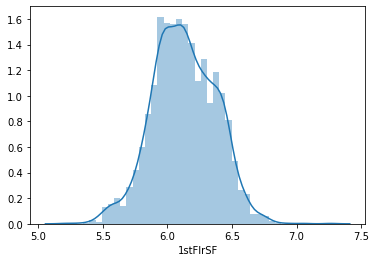

In [26]:
sns.distplot(all_data['1stFlrSF'])

In [27]:
all_data = all_data.drop(['Utilities', 'Street', 'PoolQC',], axis=1)

all_data['TotalSF']=(all_data['TotalBsmtSF']+all_data['1stFlrSF']+all_data['2ndFlrSF'])

all_data['YrBltAndRemod'] = all_data['YearBuilt'] + all_data['YearRemodAdd']

all_data['Total_sqr_footage'] = (all_data['BsmtFinSF1'] 
                                 + all_data['BsmtFinSF2'] 
                                 + all_data['1stFlrSF'] 
                                 + all_data['2ndFlrSF'])

all_data['Total_Bathrooms'] = (all_data['FullBath'] 
                               + (0.5 * all_data['HalfBath']) 
                               + all_data['BsmtFullBath'] 
                               + (0.5 * all_data['BsmtHalfBath']))
                               

all_data['Total_porch_sf'] = (all_data['OpenPorchSF'] 
                              + all_data['3SsnPorch'] 
                              + all_data['EnclosedPorch'] 
                              + all_data['ScreenPorch'] 
                              + all_data['WoodDeckSF'])

In [28]:
all_data['haspool'] = all_data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
all_data['has2ndfloor'] = all_data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasgarage'] = all_data['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasbsmt'] = all_data['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasfireplace'] = all_data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [29]:
all_data.shape

(2917, 86)

In [30]:
final_data = pd.get_dummies(all_data).reset_index(drop=True)
final_data.shape

(2917, 333)

In [31]:
X = final_data.iloc[:len(y), :]

X_sub = final_data.iloc[len(y):, :]

In [32]:
print('X', X.shape, 'y', y.shape, 'X_sub', X_sub.shape)


X (1458, 333) y (1458,) X_sub (1459, 333)


In [33]:
outliers = [30, 88, 462, 631, 1322]
X = X.drop(X.index[outliers])
y = y.drop(y.index[outliers])

In [34]:

overfit = []
for i in X.columns:
    counts = X[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(X) * 100 > 99.94:
        overfit.append(i)

overfit = list(overfit)
    
overfit.append('MSZoning_C (all)')

    




X = X.drop(overfit, axis=1).copy()
X_sub = X_sub.drop(overfit, axis=1).copy()

In [35]:
print(X.shape)
print(y.shape)
print(X_sub.shape)

(1453, 331)
(1453,)
(1459, 331)


In [36]:
from sklearn.linear_model import ElasticNet, Lasso, BayesianRidge, LassoLarsIC,LassoCV, RidgeCV,ElasticNetCV,Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
import xgboost as xgb
import lightgbm as lgb
from bayes_opt import BayesianOptimization
from mlxtend.regressor import StackingCVRegressor

import sklearn
print(sklearn.show_versions())


System:
    python: 3.7.7 (default, Mar 10 2020, 15:43:33)  [Clang 11.0.0 (clang-1100.0.33.17)]
executable: /usr/local/opt/python/bin/python3.7
   machine: Darwin-19.4.0-x86_64-i386-64bit

Python dependencies:
          pip: 20.1.1
   setuptools: 46.0.0
      sklearn: 0.23.1
        numpy: 1.18.4
        scipy: 1.4.1
       Cython: None
       pandas: 1.0.4
   matplotlib: 3.2.1
       joblib: 0.15.1
threadpoolctl: 2.1.0

Built with OpenMP: True
None


In [37]:
X.dtypes

LotFrontage              float64
LotArea                  float64
OverallQual                int64
OverallCond              float64
YearBuilt                float64
                          ...   
SaleCondition_AdjLand      uint8
SaleCondition_Alloca       uint8
SaleCondition_Family       uint8
SaleCondition_Normal       uint8
SaleCondition_Partial      uint8
Length: 331, dtype: object

In [38]:
np.array(y.isnull().any())

array(False)

In [39]:
kfolds = KFold(n_splits=10, shuffle=True, random_state=42).get_n_splits(X)

def rmse_cv(model):
    
    rmse= np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv = kfolds))
    return(rmse)

In [40]:
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

In [229]:
ridge = Ridge()
ridge_search = GridSearchCV(ridge, {'alpha': np.logspace(1, 2, 100)}, cv=10, scoring="neg_mean_squared_error")
ridge_search.fit(X, y)
print(ridge_search.best_score_)
print(ridge_search.best_estimator_)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.07929e-116): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.04795e-116): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.23155e-116): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.27131e-116): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.437e-116): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: Li

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.27404e-115): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.30018e-115): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.29612e-115): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.26039e-115): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.30334e-115): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: 

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.06245e-115): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.08808e-115): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.08624e-115): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.17005e-115): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.135e-115): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: Li

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.06962e-115): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.96137e-115): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.04033e-115): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.02883e-115): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.15076e-115): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: 

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.64841e-115): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.82782e-115): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.83766e-115): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.66034e-115): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.95583e-115): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: 

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.49832e-115): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.31362e-115): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.49558e-115): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.66097e-115): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.59224e-115): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: 

-0.0709375556194935
Ridge(alpha=31.25715849688237)


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.01996e-115): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.24823e-115): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.21468e-115): result may not be accurate.
  overwrite_a=True).T


In [41]:
ridge=make_pipeline(RobustScaler(),Ridge(alpha=23.64))
print(rmse_cv(ridge).mean())

0.1026308331881525


In [190]:
lasso = Lasso()
lasso_search = GridSearchCV(lasso, {'alpha': np.logspace(-4, -3, 20)}, cv=5, scoring="neg_mean_squared_error")
lasso_search.fit(X, y)
print(lasso_search.best_score_)
print(lasso_search.best_estimator_)

-0.011799227286436339
Lasso(alpha=0.0004832930238571752)


In [42]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha=0.000483, 
                                              random_state=42
                                              ))
print(rmse_cv(lasso).mean())

0.10193380948425271


In [431]:
elnet = ElasticNet()
elnet_search = GridSearchCV(elnet, {'alpha': np.logspace(-5, -3, 20),'l1_ratio':np.logspace(-1, 0, 10)}, cv=5,verbose=10, scoring="neg_mean_squared_error")
elnet_search.fit(X, y)
print(elnet_search.best_score_)
print(elnet_search.best_estimator_)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[CV] alpha=1e-05, l1_ratio=0.1 .......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... alpha=1e-05, l1_ratio=0.1, score=-0.012, total=   0.2s
[CV] alpha=1e-05, l1_ratio=0.1 .......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] .......... alpha=1e-05, l1_ratio=0.1, score=-0.013, total=   0.2s
[CV] alpha=1e-05, l1_ratio=0.1 .......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV] .......... alpha=1e-05, l1_ratio=0.1, score=-0.018, total=   0.2s
[CV] alpha=1e-05, l1_ratio=0.1 .......................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.7s remaining:    0.0s


[CV] .......... alpha=1e-05, l1_ratio=0.1, score=-0.012, total=   0.2s
[CV] alpha=1e-05, l1_ratio=0.1 .......................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.9s remaining:    0.0s


[CV] .......... alpha=1e-05, l1_ratio=0.1, score=-0.013, total=   0.2s
[CV] alpha=1e-05, l1_ratio=0.1291549665014884 ........................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.1s remaining:    0.0s


[CV]  alpha=1e-05, l1_ratio=0.1291549665014884, score=-0.012, total=   0.2s
[CV] alpha=1e-05, l1_ratio=0.1291549665014884 ........................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.4s remaining:    0.0s


[CV]  alpha=1e-05, l1_ratio=0.1291549665014884, score=-0.013, total=   0.2s
[CV] alpha=1e-05, l1_ratio=0.1291549665014884 ........................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.6s remaining:    0.0s


[CV]  alpha=1e-05, l1_ratio=0.1291549665014884, score=-0.018, total=   0.3s
[CV] alpha=1e-05, l1_ratio=0.1291549665014884 ........................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.9s remaining:    0.0s


[CV]  alpha=1e-05, l1_ratio=0.1291549665014884, score=-0.012, total=   0.2s
[CV] alpha=1e-05, l1_ratio=0.1291549665014884 ........................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    2.1s remaining:    0.0s


[CV]  alpha=1e-05, l1_ratio=0.1291549665014884, score=-0.013, total=   0.2s
[CV] alpha=1e-05, l1_ratio=0.16681005372000587 .......................
[CV]  alpha=1e-05, l1_ratio=0.16681005372000587, score=-0.012, total=   0.2s
[CV] alpha=1e-05, l1_ratio=0.16681005372000587 .......................
[CV]  alpha=1e-05, l1_ratio=0.16681005372000587, score=-0.013, total=   0.2s
[CV] alpha=1e-05, l1_ratio=0.16681005372000587 .......................
[CV]  alpha=1e-05, l1_ratio=0.16681005372000587, score=-0.018, total=   0.2s
[CV] alpha=1e-05, l1_ratio=0.16681005372000587 .......................
[CV]  alpha=1e-05, l1_ratio=0.16681005372000587, score=-0.012, total=   0.2s
[CV] alpha=1e-05, l1_ratio=0.16681005372000587 .......................
[CV]  alpha=1e-05, l1_ratio=0.16681005372000587, score=-0.013, total=   0.2s
[CV] alpha=1e-05, l1_ratio=0.21544346900318834 .......................
[CV]  alpha=1e-05, l1_ratio=0.21544346900318834, score=-0.012, total=   0.2s
[CV] alpha=1e-05, l1_ratio=0.2154434

[CV]  alpha=1.2742749857031348e-05, l1_ratio=0.21544346900318834, score=-0.012, total=   0.2s
[CV] alpha=1.2742749857031348e-05, l1_ratio=0.21544346900318834 ......
[CV]  alpha=1.2742749857031348e-05, l1_ratio=0.21544346900318834, score=-0.013, total=   0.2s
[CV] alpha=1.2742749857031348e-05, l1_ratio=0.21544346900318834 ......
[CV]  alpha=1.2742749857031348e-05, l1_ratio=0.21544346900318834, score=-0.017, total=   0.2s
[CV] alpha=1.2742749857031348e-05, l1_ratio=0.21544346900318834 ......
[CV]  alpha=1.2742749857031348e-05, l1_ratio=0.21544346900318834, score=-0.012, total=   0.2s
[CV] alpha=1.2742749857031348e-05, l1_ratio=0.21544346900318834 ......
[CV]  alpha=1.2742749857031348e-05, l1_ratio=0.21544346900318834, score=-0.013, total=   0.2s
[CV] alpha=1.2742749857031348e-05, l1_ratio=0.2782559402207124 .......
[CV]  alpha=1.2742749857031348e-05, l1_ratio=0.2782559402207124, score=-0.012, total=   0.2s
[CV] alpha=1.2742749857031348e-05, l1_ratio=0.2782559402207124 .......
[CV]  alpha

[CV]  alpha=1.623776739188721e-05, l1_ratio=0.21544346900318834, score=-0.017, total=   0.2s
[CV] alpha=1.623776739188721e-05, l1_ratio=0.21544346900318834 .......
[CV]  alpha=1.623776739188721e-05, l1_ratio=0.21544346900318834, score=-0.012, total=   0.2s
[CV] alpha=1.623776739188721e-05, l1_ratio=0.21544346900318834 .......
[CV]  alpha=1.623776739188721e-05, l1_ratio=0.21544346900318834, score=-0.013, total=   0.2s
[CV] alpha=1.623776739188721e-05, l1_ratio=0.2782559402207124 ........
[CV]  alpha=1.623776739188721e-05, l1_ratio=0.2782559402207124, score=-0.012, total=   0.2s
[CV] alpha=1.623776739188721e-05, l1_ratio=0.2782559402207124 ........
[CV]  alpha=1.623776739188721e-05, l1_ratio=0.2782559402207124, score=-0.013, total=   0.2s
[CV] alpha=1.623776739188721e-05, l1_ratio=0.2782559402207124 ........
[CV]  alpha=1.623776739188721e-05, l1_ratio=0.2782559402207124, score=-0.017, total=   0.2s
[CV] alpha=1.623776739188721e-05, l1_ratio=0.2782559402207124 ........
[CV]  alpha=1.62377

[CV]  alpha=2.06913808111479e-05, l1_ratio=0.2782559402207124, score=-0.011, total=   0.2s
[CV] alpha=2.06913808111479e-05, l1_ratio=0.2782559402207124 .........
[CV]  alpha=2.06913808111479e-05, l1_ratio=0.2782559402207124, score=-0.013, total=   0.2s
[CV] alpha=2.06913808111479e-05, l1_ratio=0.2782559402207124 .........
[CV]  alpha=2.06913808111479e-05, l1_ratio=0.2782559402207124, score=-0.017, total=   0.2s
[CV] alpha=2.06913808111479e-05, l1_ratio=0.2782559402207124 .........
[CV]  alpha=2.06913808111479e-05, l1_ratio=0.2782559402207124, score=-0.012, total=   0.2s
[CV] alpha=2.06913808111479e-05, l1_ratio=0.2782559402207124 .........
[CV]  alpha=2.06913808111479e-05, l1_ratio=0.2782559402207124, score=-0.013, total=   0.2s
[CV] alpha=2.06913808111479e-05, l1_ratio=0.35938136638046275 ........
[CV]  alpha=2.06913808111479e-05, l1_ratio=0.35938136638046275, score=-0.011, total=   0.2s
[CV] alpha=2.06913808111479e-05, l1_ratio=0.35938136638046275 ........
[CV]  alpha=2.0691380811147

[CV]  alpha=2.6366508987303556e-05, l1_ratio=0.2782559402207124, score=-0.017, total=   0.2s
[CV] alpha=2.6366508987303556e-05, l1_ratio=0.2782559402207124 .......
[CV]  alpha=2.6366508987303556e-05, l1_ratio=0.2782559402207124, score=-0.012, total=   0.2s
[CV] alpha=2.6366508987303556e-05, l1_ratio=0.2782559402207124 .......
[CV]  alpha=2.6366508987303556e-05, l1_ratio=0.2782559402207124, score=-0.013, total=   0.2s
[CV] alpha=2.6366508987303556e-05, l1_ratio=0.35938136638046275 ......
[CV]  alpha=2.6366508987303556e-05, l1_ratio=0.35938136638046275, score=-0.011, total=   0.2s
[CV] alpha=2.6366508987303556e-05, l1_ratio=0.35938136638046275 ......
[CV]  alpha=2.6366508987303556e-05, l1_ratio=0.35938136638046275, score=-0.013, total=   0.2s
[CV] alpha=2.6366508987303556e-05, l1_ratio=0.35938136638046275 ......
[CV]  alpha=2.6366508987303556e-05, l1_ratio=0.35938136638046275, score=-0.017, total=   0.2s
[CV] alpha=2.6366508987303556e-05, l1_ratio=0.35938136638046275 ......
[CV]  alpha=2

[CV]  alpha=3.359818286283781e-05, l1_ratio=0.2782559402207124, score=-0.012, total=   0.2s
[CV] alpha=3.359818286283781e-05, l1_ratio=0.2782559402207124 ........
[CV]  alpha=3.359818286283781e-05, l1_ratio=0.2782559402207124, score=-0.013, total=   0.2s
[CV] alpha=3.359818286283781e-05, l1_ratio=0.35938136638046275 .......
[CV]  alpha=3.359818286283781e-05, l1_ratio=0.35938136638046275, score=-0.011, total=   0.2s
[CV] alpha=3.359818286283781e-05, l1_ratio=0.35938136638046275 .......
[CV]  alpha=3.359818286283781e-05, l1_ratio=0.35938136638046275, score=-0.013, total=   0.2s
[CV] alpha=3.359818286283781e-05, l1_ratio=0.35938136638046275 .......
[CV]  alpha=3.359818286283781e-05, l1_ratio=0.35938136638046275, score=-0.016, total=   0.2s
[CV] alpha=3.359818286283781e-05, l1_ratio=0.35938136638046275 .......
[CV]  alpha=3.359818286283781e-05, l1_ratio=0.35938136638046275, score=-0.012, total=   0.2s
[CV] alpha=3.359818286283781e-05, l1_ratio=0.35938136638046275 .......
[CV]  alpha=3.3598

[CV]  alpha=4.281332398719396e-05, l1_ratio=0.35938136638046275, score=-0.011, total=   0.2s
[CV] alpha=4.281332398719396e-05, l1_ratio=0.35938136638046275 .......
[CV]  alpha=4.281332398719396e-05, l1_ratio=0.35938136638046275, score=-0.013, total=   0.2s
[CV] alpha=4.281332398719396e-05, l1_ratio=0.35938136638046275 .......
[CV]  alpha=4.281332398719396e-05, l1_ratio=0.35938136638046275, score=-0.016, total=   0.2s
[CV] alpha=4.281332398719396e-05, l1_ratio=0.35938136638046275 .......
[CV]  alpha=4.281332398719396e-05, l1_ratio=0.35938136638046275, score=-0.011, total=   0.2s
[CV] alpha=4.281332398719396e-05, l1_ratio=0.35938136638046275 .......
[CV]  alpha=4.281332398719396e-05, l1_ratio=0.35938136638046275, score=-0.012, total=   0.2s
[CV] alpha=4.281332398719396e-05, l1_ratio=0.46415888336127786 .......
[CV]  alpha=4.281332398719396e-05, l1_ratio=0.46415888336127786, score=-0.011, total=   0.2s
[CV] alpha=4.281332398719396e-05, l1_ratio=0.46415888336127786 .......
[CV]  alpha=4.28

[CV]  alpha=5.4555947811685143e-05, l1_ratio=0.35938136638046275, score=-0.016, total=   0.2s
[CV] alpha=5.4555947811685143e-05, l1_ratio=0.35938136638046275 ......
[CV]  alpha=5.4555947811685143e-05, l1_ratio=0.35938136638046275, score=-0.011, total=   0.2s
[CV] alpha=5.4555947811685143e-05, l1_ratio=0.35938136638046275 ......
[CV]  alpha=5.4555947811685143e-05, l1_ratio=0.35938136638046275, score=-0.012, total=   0.2s
[CV] alpha=5.4555947811685143e-05, l1_ratio=0.46415888336127786 ......
[CV]  alpha=5.4555947811685143e-05, l1_ratio=0.46415888336127786, score=-0.010, total=   0.2s
[CV] alpha=5.4555947811685143e-05, l1_ratio=0.46415888336127786 ......
[CV]  alpha=5.4555947811685143e-05, l1_ratio=0.46415888336127786, score=-0.012, total=   0.2s
[CV] alpha=5.4555947811685143e-05, l1_ratio=0.46415888336127786 ......
[CV]  alpha=5.4555947811685143e-05, l1_ratio=0.46415888336127786, score=-0.015, total=   0.2s
[CV] alpha=5.4555947811685143e-05, l1_ratio=0.46415888336127786 ......
[CV]  alph

[CV]  alpha=6.951927961775606e-05, l1_ratio=0.35938136638046275, score=-0.011, total=   0.2s
[CV] alpha=6.951927961775606e-05, l1_ratio=0.35938136638046275 .......
[CV]  alpha=6.951927961775606e-05, l1_ratio=0.35938136638046275, score=-0.012, total=   0.2s
[CV] alpha=6.951927961775606e-05, l1_ratio=0.46415888336127786 .......
[CV]  alpha=6.951927961775606e-05, l1_ratio=0.46415888336127786, score=-0.010, total=   0.2s
[CV] alpha=6.951927961775606e-05, l1_ratio=0.46415888336127786 .......
[CV]  alpha=6.951927961775606e-05, l1_ratio=0.46415888336127786, score=-0.012, total=   0.2s
[CV] alpha=6.951927961775606e-05, l1_ratio=0.46415888336127786 .......
[CV]  alpha=6.951927961775606e-05, l1_ratio=0.46415888336127786, score=-0.015, total=   0.2s
[CV] alpha=6.951927961775606e-05, l1_ratio=0.46415888336127786 .......
[CV]  alpha=6.951927961775606e-05, l1_ratio=0.46415888336127786, score=-0.011, total=   0.2s
[CV] alpha=6.951927961775606e-05, l1_ratio=0.46415888336127786 .......
[CV]  alpha=6.95

[CV]  alpha=8.858667904100833e-05, l1_ratio=0.46415888336127786, score=-0.012, total=   0.2s
[CV] alpha=8.858667904100833e-05, l1_ratio=0.46415888336127786 .......
[CV]  alpha=8.858667904100833e-05, l1_ratio=0.46415888336127786, score=-0.015, total=   0.2s
[CV] alpha=8.858667904100833e-05, l1_ratio=0.46415888336127786 .......
[CV]  alpha=8.858667904100833e-05, l1_ratio=0.46415888336127786, score=-0.011, total=   0.2s
[CV] alpha=8.858667904100833e-05, l1_ratio=0.46415888336127786 .......
[CV]  alpha=8.858667904100833e-05, l1_ratio=0.46415888336127786, score=-0.012, total=   0.2s
[CV] alpha=8.858667904100833e-05, l1_ratio=0.5994842503189409 ........
[CV]  alpha=8.858667904100833e-05, l1_ratio=0.5994842503189409, score=-0.010, total=   0.2s
[CV] alpha=8.858667904100833e-05, l1_ratio=0.5994842503189409 ........
[CV]  alpha=8.858667904100833e-05, l1_ratio=0.5994842503189409, score=-0.012, total=   0.2s
[CV] alpha=8.858667904100833e-05, l1_ratio=0.5994842503189409 ........
[CV]  alpha=8.8586

[CV]  alpha=0.00011288378916846884, l1_ratio=0.46415888336127786, score=-0.014, total=   0.2s
[CV] alpha=0.00011288378916846884, l1_ratio=0.46415888336127786 ......
[CV]  alpha=0.00011288378916846884, l1_ratio=0.46415888336127786, score=-0.011, total=   0.2s
[CV] alpha=0.00011288378916846884, l1_ratio=0.46415888336127786 ......
[CV]  alpha=0.00011288378916846884, l1_ratio=0.46415888336127786, score=-0.012, total=   0.2s
[CV] alpha=0.00011288378916846884, l1_ratio=0.5994842503189409 .......
[CV]  alpha=0.00011288378916846884, l1_ratio=0.5994842503189409, score=-0.010, total=   0.2s
[CV] alpha=0.00011288378916846884, l1_ratio=0.5994842503189409 .......
[CV]  alpha=0.00011288378916846884, l1_ratio=0.5994842503189409, score=-0.012, total=   0.2s
[CV] alpha=0.00011288378916846884, l1_ratio=0.5994842503189409 .......
[CV]  alpha=0.00011288378916846884, l1_ratio=0.5994842503189409, score=-0.014, total=   0.2s
[CV] alpha=0.00011288378916846884, l1_ratio=0.5994842503189409 .......
[CV]  alpha=0

[CV]  alpha=0.0001438449888287663, l1_ratio=0.46415888336127786, score=-0.011, total=   0.2s
[CV] alpha=0.0001438449888287663, l1_ratio=0.46415888336127786 .......
[CV]  alpha=0.0001438449888287663, l1_ratio=0.46415888336127786, score=-0.012, total=   0.2s
[CV] alpha=0.0001438449888287663, l1_ratio=0.5994842503189409 ........
[CV]  alpha=0.0001438449888287663, l1_ratio=0.5994842503189409, score=-0.009, total=   0.2s
[CV] alpha=0.0001438449888287663, l1_ratio=0.5994842503189409 ........
[CV]  alpha=0.0001438449888287663, l1_ratio=0.5994842503189409, score=-0.012, total=   0.2s
[CV] alpha=0.0001438449888287663, l1_ratio=0.5994842503189409 ........
[CV]  alpha=0.0001438449888287663, l1_ratio=0.5994842503189409, score=-0.013, total=   0.2s
[CV] alpha=0.0001438449888287663, l1_ratio=0.5994842503189409 ........
[CV]  alpha=0.0001438449888287663, l1_ratio=0.5994842503189409, score=-0.011, total=   0.2s
[CV] alpha=0.0001438449888287663, l1_ratio=0.5994842503189409 ........
[CV]  alpha=0.000143

[CV]  alpha=0.00018329807108324357, l1_ratio=0.46415888336127786, score=-0.011, total=   0.2s
[CV] alpha=0.00018329807108324357, l1_ratio=0.5994842503189409 .......
[CV]  alpha=0.00018329807108324357, l1_ratio=0.5994842503189409, score=-0.009, total=   0.2s
[CV] alpha=0.00018329807108324357, l1_ratio=0.5994842503189409 .......
[CV]  alpha=0.00018329807108324357, l1_ratio=0.5994842503189409, score=-0.011, total=   0.2s
[CV] alpha=0.00018329807108324357, l1_ratio=0.5994842503189409 .......
[CV]  alpha=0.00018329807108324357, l1_ratio=0.5994842503189409, score=-0.013, total=   0.2s
[CV] alpha=0.00018329807108324357, l1_ratio=0.5994842503189409 .......
[CV]  alpha=0.00018329807108324357, l1_ratio=0.5994842503189409, score=-0.010, total=   0.2s
[CV] alpha=0.00018329807108324357, l1_ratio=0.5994842503189409 .......
[CV]  alpha=0.00018329807108324357, l1_ratio=0.5994842503189409, score=-0.011, total=   0.2s
[CV] alpha=0.00018329807108324357, l1_ratio=0.774263682681127 ........
[CV]  alpha=0.0

[CV]  alpha=0.00023357214690901214, l1_ratio=0.5994842503189409, score=-0.009, total=   0.2s
[CV] alpha=0.00023357214690901214, l1_ratio=0.5994842503189409 .......
[CV]  alpha=0.00023357214690901214, l1_ratio=0.5994842503189409, score=-0.011, total=   0.2s
[CV] alpha=0.00023357214690901214, l1_ratio=0.5994842503189409 .......
[CV]  alpha=0.00023357214690901214, l1_ratio=0.5994842503189409, score=-0.013, total=   0.2s
[CV] alpha=0.00023357214690901214, l1_ratio=0.5994842503189409 .......
[CV]  alpha=0.00023357214690901214, l1_ratio=0.5994842503189409, score=-0.010, total=   0.2s
[CV] alpha=0.00023357214690901214, l1_ratio=0.5994842503189409 .......
[CV]  alpha=0.00023357214690901214, l1_ratio=0.5994842503189409, score=-0.011, total=   0.2s
[CV] alpha=0.00023357214690901214, l1_ratio=0.774263682681127 ........
[CV]  alpha=0.00023357214690901214, l1_ratio=0.774263682681127, score=-0.009, total=   0.2s
[CV] alpha=0.00023357214690901214, l1_ratio=0.774263682681127 ........
[CV]  alpha=0.000

[CV]  alpha=0.00029763514416313193, l1_ratio=0.5994842503189409, score=-0.011, total=   0.2s
[CV] alpha=0.00029763514416313193, l1_ratio=0.5994842503189409 .......
[CV]  alpha=0.00029763514416313193, l1_ratio=0.5994842503189409, score=-0.013, total=   0.2s
[CV] alpha=0.00029763514416313193, l1_ratio=0.5994842503189409 .......
[CV]  alpha=0.00029763514416313193, l1_ratio=0.5994842503189409, score=-0.010, total=   0.2s
[CV] alpha=0.00029763514416313193, l1_ratio=0.5994842503189409 .......
[CV]  alpha=0.00029763514416313193, l1_ratio=0.5994842503189409, score=-0.011, total=   0.2s
[CV] alpha=0.00029763514416313193, l1_ratio=0.774263682681127 ........
[CV]  alpha=0.00029763514416313193, l1_ratio=0.774263682681127, score=-0.009, total=   0.2s
[CV] alpha=0.00029763514416313193, l1_ratio=0.774263682681127 ........
[CV]  alpha=0.00029763514416313193, l1_ratio=0.774263682681127, score=-0.011, total=   0.2s
[CV] alpha=0.00029763514416313193, l1_ratio=0.774263682681127 ........
[CV]  alpha=0.0002

[CV]  alpha=0.000379269019073225, l1_ratio=0.5994842503189409, score=-0.011, total=   0.2s
[CV] alpha=0.000379269019073225, l1_ratio=0.774263682681127 ..........
[CV]  alpha=0.000379269019073225, l1_ratio=0.774263682681127, score=-0.009, total=   0.2s
[CV] alpha=0.000379269019073225, l1_ratio=0.774263682681127 ..........
[CV]  alpha=0.000379269019073225, l1_ratio=0.774263682681127, score=-0.011, total=   0.2s
[CV] alpha=0.000379269019073225, l1_ratio=0.774263682681127 ..........
[CV]  alpha=0.000379269019073225, l1_ratio=0.774263682681127, score=-0.013, total=   0.2s
[CV] alpha=0.000379269019073225, l1_ratio=0.774263682681127 ..........
[CV]  alpha=0.000379269019073225, l1_ratio=0.774263682681127, score=-0.010, total=   0.2s
[CV] alpha=0.000379269019073225, l1_ratio=0.774263682681127 ..........
[CV]  alpha=0.000379269019073225, l1_ratio=0.774263682681127, score=-0.010, total=   0.2s
[CV] alpha=0.000379269019073225, l1_ratio=1.0 ........................
[CV]  alpha=0.000379269019073225,

[CV]  alpha=0.0004832930238571752, l1_ratio=0.774263682681127, score=-0.013, total=   0.2s
[CV] alpha=0.0004832930238571752, l1_ratio=0.774263682681127 .........
[CV]  alpha=0.0004832930238571752, l1_ratio=0.774263682681127, score=-0.011, total=   0.2s
[CV] alpha=0.0004832930238571752, l1_ratio=0.774263682681127 .........
[CV]  alpha=0.0004832930238571752, l1_ratio=0.774263682681127, score=-0.010, total=   0.2s
[CV] alpha=0.0004832930238571752, l1_ratio=1.0 .......................
[CV]  alpha=0.0004832930238571752, l1_ratio=1.0, score=-0.009, total=   0.2s
[CV] alpha=0.0004832930238571752, l1_ratio=1.0 .......................
[CV]  alpha=0.0004832930238571752, l1_ratio=1.0, score=-0.011, total=   0.2s
[CV] alpha=0.0004832930238571752, l1_ratio=1.0 .......................
[CV]  alpha=0.0004832930238571752, l1_ratio=1.0, score=-0.013, total=   0.2s
[CV] alpha=0.0004832930238571752, l1_ratio=1.0 .......................
[CV]  alpha=0.0004832930238571752, l1_ratio=1.0, score=-0.011, total= 

[CV]  alpha=0.0006158482110660261, l1_ratio=0.774263682681127, score=-0.010, total=   0.2s
[CV] alpha=0.0006158482110660261, l1_ratio=1.0 .......................
[CV]  alpha=0.0006158482110660261, l1_ratio=1.0, score=-0.009, total=   0.1s
[CV] alpha=0.0006158482110660261, l1_ratio=1.0 .......................
[CV]  alpha=0.0006158482110660261, l1_ratio=1.0, score=-0.011, total=   0.2s
[CV] alpha=0.0006158482110660261, l1_ratio=1.0 .......................
[CV]  alpha=0.0006158482110660261, l1_ratio=1.0, score=-0.013, total=   0.1s
[CV] alpha=0.0006158482110660261, l1_ratio=1.0 .......................
[CV]  alpha=0.0006158482110660261, l1_ratio=1.0, score=-0.011, total=   0.2s
[CV] alpha=0.0006158482110660261, l1_ratio=1.0 .......................
[CV]  alpha=0.0006158482110660261, l1_ratio=1.0, score=-0.010, total=   0.2s
[CV] alpha=0.0007847599703514606, l1_ratio=0.1 .......................
[CV]  alpha=0.0007847599703514606, l1_ratio=0.1, score=-0.009, total=   0.2s
[CV] alpha=0.00078475

[CV]  alpha=0.0007847599703514606, l1_ratio=1.0, score=-0.011, total=   0.2s
[CV] alpha=0.0007847599703514606, l1_ratio=1.0 .......................
[CV]  alpha=0.0007847599703514606, l1_ratio=1.0, score=-0.013, total=   0.1s
[CV] alpha=0.0007847599703514606, l1_ratio=1.0 .......................
[CV]  alpha=0.0007847599703514606, l1_ratio=1.0, score=-0.011, total=   0.2s
[CV] alpha=0.0007847599703514606, l1_ratio=1.0 .......................
[CV]  alpha=0.0007847599703514606, l1_ratio=1.0, score=-0.010, total=   0.1s
[CV] alpha=0.001, l1_ratio=0.1 .......................................
[CV] .......... alpha=0.001, l1_ratio=0.1, score=-0.009, total=   0.2s
[CV] alpha=0.001, l1_ratio=0.1 .......................................
[CV] .......... alpha=0.001, l1_ratio=0.1, score=-0.012, total=   0.2s
[CV] alpha=0.001, l1_ratio=0.1 .......................................
[CV] .......... alpha=0.001, l1_ratio=0.1, score=-0.013, total=   0.2s
[CV] alpha=0.001, l1_ratio=0.1 ......................

[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:  3.3min finished


-0.010691698697435073
ElasticNet(alpha=0.00023357214690901214, l1_ratio=1.0)


In [43]:
elasticnet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.000233, 
                                                        
                                                        l1_ratio=1))

print(rmse_cv(elasticnet).mean())

0.101265766255209


In [44]:
svr = make_pipeline(RobustScaler(),
                      SVR(C=61, epsilon=0.002, gamma=0.0001,kernel='rbf',verbose=True))

print(rmse_cv(svr).mean())

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]0.10169036516209137


In [67]:
parameters={'C':np.logspace(-2,2,10),
           'gamma':np.logspace(-4,2,10),
           'epsilon':np.logspace(-3,1,10)}

svr_1=SVR(C= 20, epsilon= 0.008, gamma=0.0003,kernel='rbf')

svrcv=GridSearchCV(estimator =svr_1 , param_grid = parameters, 
                        cv=10,verbose=10,scoring='neg_mean_squared_error')

svrcv.fit(X,y)

print(svrcv.best_score_)
print(svrcv.best_estimator_)

Fitting 10 folds for each of 1000 candidates, totalling 10000 fits
[CV] C=0.01, epsilon=0.001, gamma=0.0001 .............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=0.01, epsilon=0.001, gamma=0.0001, score=-0.129, total=   0.7s
[CV] C=0.01, epsilon=0.001, gamma=0.0001 .............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV]  C=0.01, epsilon=0.001, gamma=0.0001, score=-0.166, total=   0.7s
[CV] C=0.01, epsilon=0.001, gamma=0.0001 .............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.5s remaining:    0.0s


[CV]  C=0.01, epsilon=0.001, gamma=0.0001, score=-0.186, total=   0.7s
[CV] C=0.01, epsilon=0.001, gamma=0.0001 .............................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.2s remaining:    0.0s


[CV]  C=0.01, epsilon=0.001, gamma=0.0001, score=-0.183, total=   0.7s
[CV] C=0.01, epsilon=0.001, gamma=0.0001 .............................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.9s remaining:    0.0s


[CV]  C=0.01, epsilon=0.001, gamma=0.0001, score=-0.206, total=   0.7s
[CV] C=0.01, epsilon=0.001, gamma=0.0001 .............................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.6s remaining:    0.0s


[CV]  C=0.01, epsilon=0.001, gamma=0.0001, score=-0.141, total=   0.6s
[CV] C=0.01, epsilon=0.001, gamma=0.0001 .............................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    4.2s remaining:    0.0s


[CV]  C=0.01, epsilon=0.001, gamma=0.0001, score=-0.149, total=   0.7s
[CV] C=0.01, epsilon=0.001, gamma=0.0001 .............................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    4.9s remaining:    0.0s


[CV]  C=0.01, epsilon=0.001, gamma=0.0001, score=-0.137, total=   0.6s
[CV] C=0.01, epsilon=0.001, gamma=0.0001 .............................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    5.5s remaining:    0.0s


[CV]  C=0.01, epsilon=0.001, gamma=0.0001, score=-0.155, total=   0.6s
[CV] C=0.01, epsilon=0.001, gamma=0.0001 .............................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    6.2s remaining:    0.0s


[CV]  C=0.01, epsilon=0.001, gamma=0.0001, score=-0.162, total=   0.6s
[CV] C=0.01, epsilon=0.001, gamma=0.00046415888336127773 .............
[CV]  C=0.01, epsilon=0.001, gamma=0.00046415888336127773, score=-0.130, total=   0.6s
[CV] C=0.01, epsilon=0.001, gamma=0.00046415888336127773 .............
[CV]  C=0.01, epsilon=0.001, gamma=0.00046415888336127773, score=-0.168, total=   0.6s
[CV] C=0.01, epsilon=0.001, gamma=0.00046415888336127773 .............
[CV]  C=0.01, epsilon=0.001, gamma=0.00046415888336127773, score=-0.187, total=   0.6s
[CV] C=0.01, epsilon=0.001, gamma=0.00046415888336127773 .............
[CV]  C=0.01, epsilon=0.001, gamma=0.00046415888336127773, score=-0.185, total=   0.6s
[CV] C=0.01, epsilon=0.001, gamma=0.00046415888336127773 .............
[CV]  C=0.01, epsilon=0.001, gamma=0.00046415888336127773, score=-0.206, total=   0.6s
[CV] C=0.01, epsilon=0.001, gamma=0.00046415888336127773 .............
[CV]  C=0.01, epsilon=0.001, gamma=0.00046415888336127773, score=-0.

[CV] ... C=0.01, epsilon=0.001, gamma=1.0, score=-0.185, total=   0.6s
[CV] C=0.01, epsilon=0.001, gamma=1.0 ................................
[CV] ... C=0.01, epsilon=0.001, gamma=1.0, score=-0.207, total=   0.6s
[CV] C=0.01, epsilon=0.001, gamma=1.0 ................................
[CV] ... C=0.01, epsilon=0.001, gamma=1.0, score=-0.142, total=   0.6s
[CV] C=0.01, epsilon=0.001, gamma=1.0 ................................
[CV] ... C=0.01, epsilon=0.001, gamma=1.0, score=-0.150, total=   0.6s
[CV] C=0.01, epsilon=0.001, gamma=1.0 ................................
[CV] ... C=0.01, epsilon=0.001, gamma=1.0, score=-0.138, total=   0.6s
[CV] C=0.01, epsilon=0.001, gamma=1.0 ................................
[CV] ... C=0.01, epsilon=0.001, gamma=1.0, score=-0.156, total=   0.6s
[CV] C=0.01, epsilon=0.001, gamma=1.0 ................................
[CV] ... C=0.01, epsilon=0.001, gamma=1.0, score=-0.164, total=   0.6s
[CV] C=0.01, epsilon=0.001, gamma=4.641588833612772 ..................
[CV]  

[CV]  C=0.01, epsilon=0.0027825594022071257, gamma=0.00046415888336127773, score=-0.138, total=   0.6s
[CV] C=0.01, epsilon=0.0027825594022071257, gamma=0.00046415888336127773 
[CV]  C=0.01, epsilon=0.0027825594022071257, gamma=0.00046415888336127773, score=-0.156, total=   0.6s
[CV] C=0.01, epsilon=0.0027825594022071257, gamma=0.00046415888336127773 
[CV]  C=0.01, epsilon=0.0027825594022071257, gamma=0.00046415888336127773, score=-0.164, total=   0.6s
[CV] C=0.01, epsilon=0.0027825594022071257, gamma=0.002154434690031882 
[CV]  C=0.01, epsilon=0.0027825594022071257, gamma=0.002154434690031882, score=-0.131, total=   0.6s
[CV] C=0.01, epsilon=0.0027825594022071257, gamma=0.002154434690031882 
[CV]  C=0.01, epsilon=0.0027825594022071257, gamma=0.002154434690031882, score=-0.168, total=   0.6s
[CV] C=0.01, epsilon=0.0027825594022071257, gamma=0.002154434690031882 
[CV]  C=0.01, epsilon=0.0027825594022071257, gamma=0.002154434690031882, score=-0.187, total=   0.6s
[CV] C=0.01, epsilon=0.0

[CV]  C=0.01, epsilon=0.0027825594022071257, gamma=1.0, score=-0.138, total=   0.6s
[CV] C=0.01, epsilon=0.0027825594022071257, gamma=1.0 ................
[CV]  C=0.01, epsilon=0.0027825594022071257, gamma=1.0, score=-0.156, total=   0.6s
[CV] C=0.01, epsilon=0.0027825594022071257, gamma=1.0 ................
[CV]  C=0.01, epsilon=0.0027825594022071257, gamma=1.0, score=-0.164, total=   0.6s
[CV] C=0.01, epsilon=0.0027825594022071257, gamma=4.641588833612772 ..
[CV]  C=0.01, epsilon=0.0027825594022071257, gamma=4.641588833612772, score=-0.131, total=   0.6s
[CV] C=0.01, epsilon=0.0027825594022071257, gamma=4.641588833612772 ..
[CV]  C=0.01, epsilon=0.0027825594022071257, gamma=4.641588833612772, score=-0.168, total=   0.6s
[CV] C=0.01, epsilon=0.0027825594022071257, gamma=4.641588833612772 ..
[CV]  C=0.01, epsilon=0.0027825594022071257, gamma=4.641588833612772, score=-0.187, total=   0.6s
[CV] C=0.01, epsilon=0.0027825594022071257, gamma=4.641588833612772 ..
[CV]  C=0.01, epsilon=0.0027

[CV]  C=0.01, epsilon=0.007742636826811269, gamma=0.00046415888336127773, score=-0.138, total=   0.6s
[CV] C=0.01, epsilon=0.007742636826811269, gamma=0.00046415888336127773 
[CV]  C=0.01, epsilon=0.007742636826811269, gamma=0.00046415888336127773, score=-0.156, total=   0.6s
[CV] C=0.01, epsilon=0.007742636826811269, gamma=0.00046415888336127773 
[CV]  C=0.01, epsilon=0.007742636826811269, gamma=0.00046415888336127773, score=-0.164, total=   0.6s
[CV] C=0.01, epsilon=0.007742636826811269, gamma=0.002154434690031882 
[CV]  C=0.01, epsilon=0.007742636826811269, gamma=0.002154434690031882, score=-0.130, total=   0.6s
[CV] C=0.01, epsilon=0.007742636826811269, gamma=0.002154434690031882 
[CV]  C=0.01, epsilon=0.007742636826811269, gamma=0.002154434690031882, score=-0.167, total=   0.6s
[CV] C=0.01, epsilon=0.007742636826811269, gamma=0.002154434690031882 
[CV]  C=0.01, epsilon=0.007742636826811269, gamma=0.002154434690031882, score=-0.187, total=   0.6s
[CV] C=0.01, epsilon=0.007742636826

[CV]  C=0.01, epsilon=0.007742636826811269, gamma=1.0, score=-0.138, total=   0.6s
[CV] C=0.01, epsilon=0.007742636826811269, gamma=1.0 .................
[CV]  C=0.01, epsilon=0.007742636826811269, gamma=1.0, score=-0.156, total=   0.6s
[CV] C=0.01, epsilon=0.007742636826811269, gamma=1.0 .................
[CV]  C=0.01, epsilon=0.007742636826811269, gamma=1.0, score=-0.164, total=   0.6s
[CV] C=0.01, epsilon=0.007742636826811269, gamma=4.641588833612772 ...
[CV]  C=0.01, epsilon=0.007742636826811269, gamma=4.641588833612772, score=-0.131, total=   0.6s
[CV] C=0.01, epsilon=0.007742636826811269, gamma=4.641588833612772 ...
[CV]  C=0.01, epsilon=0.007742636826811269, gamma=4.641588833612772, score=-0.168, total=   0.6s
[CV] C=0.01, epsilon=0.007742636826811269, gamma=4.641588833612772 ...
[CV]  C=0.01, epsilon=0.007742636826811269, gamma=4.641588833612772, score=-0.187, total=   0.6s
[CV] C=0.01, epsilon=0.007742636826811269, gamma=4.641588833612772 ...
[CV]  C=0.01, epsilon=0.0077426368

[CV]  C=0.01, epsilon=0.021544346900318832, gamma=0.00046415888336127773, score=-0.156, total=   0.6s
[CV] C=0.01, epsilon=0.021544346900318832, gamma=0.00046415888336127773 
[CV]  C=0.01, epsilon=0.021544346900318832, gamma=0.00046415888336127773, score=-0.164, total=   0.6s
[CV] C=0.01, epsilon=0.021544346900318832, gamma=0.002154434690031882 
[CV]  C=0.01, epsilon=0.021544346900318832, gamma=0.002154434690031882, score=-0.131, total=   0.6s
[CV] C=0.01, epsilon=0.021544346900318832, gamma=0.002154434690031882 
[CV]  C=0.01, epsilon=0.021544346900318832, gamma=0.002154434690031882, score=-0.167, total=   0.7s
[CV] C=0.01, epsilon=0.021544346900318832, gamma=0.002154434690031882 
[CV]  C=0.01, epsilon=0.021544346900318832, gamma=0.002154434690031882, score=-0.187, total=   0.6s
[CV] C=0.01, epsilon=0.021544346900318832, gamma=0.002154434690031882 
[CV]  C=0.01, epsilon=0.021544346900318832, gamma=0.002154434690031882, score=-0.185, total=   0.6s
[CV] C=0.01, epsilon=0.0215443469003188

[CV]  C=0.01, epsilon=0.021544346900318832, gamma=1.0, score=-0.156, total=   0.6s
[CV] C=0.01, epsilon=0.021544346900318832, gamma=1.0 .................
[CV]  C=0.01, epsilon=0.021544346900318832, gamma=1.0, score=-0.164, total=   0.6s
[CV] C=0.01, epsilon=0.021544346900318832, gamma=4.641588833612772 ...
[CV]  C=0.01, epsilon=0.021544346900318832, gamma=4.641588833612772, score=-0.131, total=   0.6s
[CV] C=0.01, epsilon=0.021544346900318832, gamma=4.641588833612772 ...
[CV]  C=0.01, epsilon=0.021544346900318832, gamma=4.641588833612772, score=-0.167, total=   0.6s
[CV] C=0.01, epsilon=0.021544346900318832, gamma=4.641588833612772 ...
[CV]  C=0.01, epsilon=0.021544346900318832, gamma=4.641588833612772, score=-0.187, total=   0.6s
[CV] C=0.01, epsilon=0.021544346900318832, gamma=4.641588833612772 ...
[CV]  C=0.01, epsilon=0.021544346900318832, gamma=4.641588833612772, score=-0.185, total=   0.6s
[CV] C=0.01, epsilon=0.021544346900318832, gamma=4.641588833612772 ...
[CV]  C=0.01, epsilo

[CV]  C=0.01, epsilon=0.05994842503189409, gamma=0.00046415888336127773, score=-0.163, total=   0.6s
[CV] C=0.01, epsilon=0.05994842503189409, gamma=0.002154434690031882 .
[CV]  C=0.01, epsilon=0.05994842503189409, gamma=0.002154434690031882, score=-0.130, total=   0.6s
[CV] C=0.01, epsilon=0.05994842503189409, gamma=0.002154434690031882 .
[CV]  C=0.01, epsilon=0.05994842503189409, gamma=0.002154434690031882, score=-0.166, total=   0.6s
[CV] C=0.01, epsilon=0.05994842503189409, gamma=0.002154434690031882 .
[CV]  C=0.01, epsilon=0.05994842503189409, gamma=0.002154434690031882, score=-0.186, total=   0.6s
[CV] C=0.01, epsilon=0.05994842503189409, gamma=0.002154434690031882 .
[CV]  C=0.01, epsilon=0.05994842503189409, gamma=0.002154434690031882, score=-0.184, total=   0.6s
[CV] C=0.01, epsilon=0.05994842503189409, gamma=0.002154434690031882 .
[CV]  C=0.01, epsilon=0.05994842503189409, gamma=0.002154434690031882, score=-0.206, total=   0.6s
[CV] C=0.01, epsilon=0.05994842503189409, gamma=0

[CV]  C=0.01, epsilon=0.05994842503189409, gamma=4.641588833612772, score=-0.131, total=   0.6s
[CV] C=0.01, epsilon=0.05994842503189409, gamma=4.641588833612772 ....
[CV]  C=0.01, epsilon=0.05994842503189409, gamma=4.641588833612772, score=-0.166, total=   0.6s
[CV] C=0.01, epsilon=0.05994842503189409, gamma=4.641588833612772 ....
[CV]  C=0.01, epsilon=0.05994842503189409, gamma=4.641588833612772, score=-0.187, total=   0.6s
[CV] C=0.01, epsilon=0.05994842503189409, gamma=4.641588833612772 ....
[CV]  C=0.01, epsilon=0.05994842503189409, gamma=4.641588833612772, score=-0.184, total=   0.6s
[CV] C=0.01, epsilon=0.05994842503189409, gamma=4.641588833612772 ....
[CV]  C=0.01, epsilon=0.05994842503189409, gamma=4.641588833612772, score=-0.206, total=   0.6s
[CV] C=0.01, epsilon=0.05994842503189409, gamma=4.641588833612772 ....
[CV]  C=0.01, epsilon=0.05994842503189409, gamma=4.641588833612772, score=-0.141, total=   0.6s
[CV] C=0.01, epsilon=0.05994842503189409, gamma=4.641588833612772 ...

[CV]  C=0.01, epsilon=0.1668100537200059, gamma=0.002154434690031882, score=-0.162, total=   0.4s
[CV] C=0.01, epsilon=0.1668100537200059, gamma=0.002154434690031882 ..
[CV]  C=0.01, epsilon=0.1668100537200059, gamma=0.002154434690031882, score=-0.185, total=   0.4s
[CV] C=0.01, epsilon=0.1668100537200059, gamma=0.002154434690031882 ..
[CV]  C=0.01, epsilon=0.1668100537200059, gamma=0.002154434690031882, score=-0.181, total=   0.4s
[CV] C=0.01, epsilon=0.1668100537200059, gamma=0.002154434690031882 ..
[CV]  C=0.01, epsilon=0.1668100537200059, gamma=0.002154434690031882, score=-0.204, total=   0.4s
[CV] C=0.01, epsilon=0.1668100537200059, gamma=0.002154434690031882 ..
[CV]  C=0.01, epsilon=0.1668100537200059, gamma=0.002154434690031882, score=-0.138, total=   0.4s
[CV] C=0.01, epsilon=0.1668100537200059, gamma=0.002154434690031882 ..
[CV]  C=0.01, epsilon=0.1668100537200059, gamma=0.002154434690031882, score=-0.150, total=   0.4s
[CV] C=0.01, epsilon=0.1668100537200059, gamma=0.00215443

[CV]  C=0.01, epsilon=0.1668100537200059, gamma=4.641588833612772, score=-0.185, total=   0.4s
[CV] C=0.01, epsilon=0.1668100537200059, gamma=4.641588833612772 .....
[CV]  C=0.01, epsilon=0.1668100537200059, gamma=4.641588833612772, score=-0.181, total=   0.4s
[CV] C=0.01, epsilon=0.1668100537200059, gamma=4.641588833612772 .....
[CV]  C=0.01, epsilon=0.1668100537200059, gamma=4.641588833612772, score=-0.204, total=   0.4s
[CV] C=0.01, epsilon=0.1668100537200059, gamma=4.641588833612772 .....
[CV]  C=0.01, epsilon=0.1668100537200059, gamma=4.641588833612772, score=-0.138, total=   0.4s
[CV] C=0.01, epsilon=0.1668100537200059, gamma=4.641588833612772 .....
[CV]  C=0.01, epsilon=0.1668100537200059, gamma=4.641588833612772, score=-0.150, total=   0.4s
[CV] C=0.01, epsilon=0.1668100537200059, gamma=4.641588833612772 .....
[CV]  C=0.01, epsilon=0.1668100537200059, gamma=4.641588833612772, score=-0.137, total=   0.4s
[CV] C=0.01, epsilon=0.1668100537200059, gamma=4.641588833612772 .....
[CV]

[CV]  C=0.01, epsilon=0.46415888336127775, gamma=0.002154434690031882, score=-0.177, total=   0.2s
[CV] C=0.01, epsilon=0.46415888336127775, gamma=0.002154434690031882 .
[CV]  C=0.01, epsilon=0.46415888336127775, gamma=0.002154434690031882, score=-0.201, total=   0.1s
[CV] C=0.01, epsilon=0.46415888336127775, gamma=0.002154434690031882 .
[CV]  C=0.01, epsilon=0.46415888336127775, gamma=0.002154434690031882, score=-0.133, total=   0.2s
[CV] C=0.01, epsilon=0.46415888336127775, gamma=0.002154434690031882 .
[CV]  C=0.01, epsilon=0.46415888336127775, gamma=0.002154434690031882, score=-0.155, total=   0.2s
[CV] C=0.01, epsilon=0.46415888336127775, gamma=0.002154434690031882 .
[CV]  C=0.01, epsilon=0.46415888336127775, gamma=0.002154434690031882, score=-0.140, total=   0.2s
[CV] C=0.01, epsilon=0.46415888336127775, gamma=0.002154434690031882 .
[CV]  C=0.01, epsilon=0.46415888336127775, gamma=0.002154434690031882, score=-0.144, total=   0.1s
[CV] C=0.01, epsilon=0.46415888336127775, gamma=0.0

[CV]  C=0.01, epsilon=0.46415888336127775, gamma=4.641588833612772, score=-0.133, total=   0.2s
[CV] C=0.01, epsilon=0.46415888336127775, gamma=4.641588833612772 ....
[CV]  C=0.01, epsilon=0.46415888336127775, gamma=4.641588833612772, score=-0.155, total=   0.1s
[CV] C=0.01, epsilon=0.46415888336127775, gamma=4.641588833612772 ....
[CV]  C=0.01, epsilon=0.46415888336127775, gamma=4.641588833612772, score=-0.140, total=   0.1s
[CV] C=0.01, epsilon=0.46415888336127775, gamma=4.641588833612772 ....
[CV]  C=0.01, epsilon=0.46415888336127775, gamma=4.641588833612772, score=-0.144, total=   0.1s
[CV] C=0.01, epsilon=0.46415888336127775, gamma=4.641588833612772 ....
[CV]  C=0.01, epsilon=0.46415888336127775, gamma=4.641588833612772, score=-0.166, total=   0.2s
[CV] C=0.01, epsilon=0.46415888336127775, gamma=21.54434690031882 ....
[CV]  C=0.01, epsilon=0.46415888336127775, gamma=21.54434690031882, score=-0.129, total=   0.1s
[CV] C=0.01, epsilon=0.46415888336127775, gamma=21.54434690031882 ...

[CV]  C=0.01, epsilon=1.2915496650148828, gamma=0.01, score=-0.137, total=   0.0s
[CV] C=0.01, epsilon=1.2915496650148828, gamma=0.01 ..................
[CV]  C=0.01, epsilon=1.2915496650148828, gamma=0.01, score=-0.162, total=   0.0s
[CV] C=0.01, epsilon=1.2915496650148828, gamma=0.01 ..................
[CV]  C=0.01, epsilon=1.2915496650148828, gamma=0.01, score=-0.163, total=   0.0s
[CV] C=0.01, epsilon=1.2915496650148828, gamma=0.046415888336127774 ..
[CV]  C=0.01, epsilon=1.2915496650148828, gamma=0.046415888336127774, score=-0.128, total=   0.0s
[CV] C=0.01, epsilon=1.2915496650148828, gamma=0.046415888336127774 ..
[CV]  C=0.01, epsilon=1.2915496650148828, gamma=0.046415888336127774, score=-0.157, total=   0.0s
[CV] C=0.01, epsilon=1.2915496650148828, gamma=0.046415888336127774 ..
[CV]  C=0.01, epsilon=1.2915496650148828, gamma=0.046415888336127774, score=-0.183, total=   0.0s
[CV] C=0.01, epsilon=1.2915496650148828, gamma=0.046415888336127774 ..
[CV]  C=0.01, epsilon=1.2915496650

[CV]  C=0.01, epsilon=1.2915496650148828, gamma=100.0, score=-0.163, total=   0.0s
[CV] C=0.01, epsilon=3.593813663804626, gamma=0.0001 .................
[CV]  C=0.01, epsilon=3.593813663804626, gamma=0.0001, score=-0.128, total=   0.0s
[CV] C=0.01, epsilon=3.593813663804626, gamma=0.0001 .................
[CV]  C=0.01, epsilon=3.593813663804626, gamma=0.0001, score=-0.158, total=   0.0s
[CV] C=0.01, epsilon=3.593813663804626, gamma=0.0001 .................
[CV]  C=0.01, epsilon=3.593813663804626, gamma=0.0001, score=-0.183, total=   0.0s
[CV] C=0.01, epsilon=3.593813663804626, gamma=0.0001 .................
[CV]  C=0.01, epsilon=3.593813663804626, gamma=0.0001, score=-0.178, total=   0.0s
[CV] C=0.01, epsilon=3.593813663804626, gamma=0.0001 .................
[CV]  C=0.01, epsilon=3.593813663804626, gamma=0.0001, score=-0.203, total=   0.0s
[CV] C=0.01, epsilon=3.593813663804626, gamma=0.0001 .................
[CV]  C=0.01, epsilon=3.593813663804626, gamma=0.0001, score=-0.135, total= 

[CV]  C=0.01, epsilon=3.593813663804626, gamma=1.0, score=-0.183, total=   0.0s
[CV] C=0.01, epsilon=3.593813663804626, gamma=1.0 ....................
[CV]  C=0.01, epsilon=3.593813663804626, gamma=1.0, score=-0.178, total=   0.0s
[CV] C=0.01, epsilon=3.593813663804626, gamma=1.0 ....................
[CV]  C=0.01, epsilon=3.593813663804626, gamma=1.0, score=-0.203, total=   0.0s
[CV] C=0.01, epsilon=3.593813663804626, gamma=1.0 ....................
[CV]  C=0.01, epsilon=3.593813663804626, gamma=1.0, score=-0.135, total=   0.0s
[CV] C=0.01, epsilon=3.593813663804626, gamma=1.0 ....................
[CV]  C=0.01, epsilon=3.593813663804626, gamma=1.0, score=-0.150, total=   0.0s
[CV] C=0.01, epsilon=3.593813663804626, gamma=1.0 ....................
[CV]  C=0.01, epsilon=3.593813663804626, gamma=1.0, score=-0.137, total=   0.0s
[CV] C=0.01, epsilon=3.593813663804626, gamma=1.0 ....................
[CV]  C=0.01, epsilon=3.593813663804626, gamma=1.0, score=-0.148, total=   0.0s
[CV] C=0.01, e

[CV]  C=0.01, epsilon=10.0, gamma=0.002154434690031882, score=-0.178, total=   0.0s
[CV] C=0.01, epsilon=10.0, gamma=0.002154434690031882 ................
[CV]  C=0.01, epsilon=10.0, gamma=0.002154434690031882, score=-0.203, total=   0.0s
[CV] C=0.01, epsilon=10.0, gamma=0.002154434690031882 ................
[CV]  C=0.01, epsilon=10.0, gamma=0.002154434690031882, score=-0.135, total=   0.0s
[CV] C=0.01, epsilon=10.0, gamma=0.002154434690031882 ................
[CV]  C=0.01, epsilon=10.0, gamma=0.002154434690031882, score=-0.150, total=   0.0s
[CV] C=0.01, epsilon=10.0, gamma=0.002154434690031882 ................
[CV]  C=0.01, epsilon=10.0, gamma=0.002154434690031882, score=-0.137, total=   0.0s
[CV] C=0.01, epsilon=10.0, gamma=0.002154434690031882 ................
[CV]  C=0.01, epsilon=10.0, gamma=0.002154434690031882, score=-0.148, total=   0.0s
[CV] C=0.01, epsilon=10.0, gamma=0.002154434690031882 ................
[CV]  C=0.01, epsilon=10.0, gamma=0.002154434690031882, score=-0.163, 

[CV]  C=0.01, epsilon=10.0, gamma=21.54434690031882, score=-0.178, total=   0.0s
[CV] C=0.01, epsilon=10.0, gamma=21.54434690031882 ...................
[CV]  C=0.01, epsilon=10.0, gamma=21.54434690031882, score=-0.203, total=   0.0s
[CV] C=0.01, epsilon=10.0, gamma=21.54434690031882 ...................
[CV]  C=0.01, epsilon=10.0, gamma=21.54434690031882, score=-0.135, total=   0.0s
[CV] C=0.01, epsilon=10.0, gamma=21.54434690031882 ...................
[CV]  C=0.01, epsilon=10.0, gamma=21.54434690031882, score=-0.150, total=   0.0s
[CV] C=0.01, epsilon=10.0, gamma=21.54434690031882 ...................
[CV]  C=0.01, epsilon=10.0, gamma=21.54434690031882, score=-0.137, total=   0.0s
[CV] C=0.01, epsilon=10.0, gamma=21.54434690031882 ...................
[CV]  C=0.01, epsilon=10.0, gamma=21.54434690031882, score=-0.148, total=   0.0s
[CV] C=0.01, epsilon=10.0, gamma=21.54434690031882 ...................
[CV]  C=0.01, epsilon=10.0, gamma=21.54434690031882, score=-0.163, total=   0.0s
[CV] C=

[CV]  C=0.027825594022071243, epsilon=0.001, gamma=0.01, score=-0.151, total=   0.6s
[CV] C=0.027825594022071243, epsilon=0.001, gamma=0.01 ...............
[CV]  C=0.027825594022071243, epsilon=0.001, gamma=0.01, score=-0.154, total=   0.6s
[CV] C=0.027825594022071243, epsilon=0.001, gamma=0.01 ...............
[CV]  C=0.027825594022071243, epsilon=0.001, gamma=0.01, score=-0.142, total=   0.6s
[CV] C=0.027825594022071243, epsilon=0.001, gamma=0.01 ...............
[CV]  C=0.027825594022071243, epsilon=0.001, gamma=0.01, score=-0.168, total=   0.6s
[CV] C=0.027825594022071243, epsilon=0.001, gamma=0.01 ...............
[CV]  C=0.027825594022071243, epsilon=0.001, gamma=0.01, score=-0.169, total=   0.6s
[CV] C=0.027825594022071243, epsilon=0.001, gamma=0.046415888336127774 
[CV]  C=0.027825594022071243, epsilon=0.001, gamma=0.046415888336127774, score=-0.137, total=   0.6s
[CV] C=0.027825594022071243, epsilon=0.001, gamma=0.046415888336127774 
[CV]  C=0.027825594022071243, epsilon=0.001, g

[CV]  C=0.027825594022071243, epsilon=0.001, gamma=21.54434690031882, score=-0.151, total=   0.6s
[CV] C=0.027825594022071243, epsilon=0.001, gamma=21.54434690031882 ..
[CV]  C=0.027825594022071243, epsilon=0.001, gamma=21.54434690031882, score=-0.154, total=   0.6s
[CV] C=0.027825594022071243, epsilon=0.001, gamma=21.54434690031882 ..
[CV]  C=0.027825594022071243, epsilon=0.001, gamma=21.54434690031882, score=-0.142, total=   0.6s
[CV] C=0.027825594022071243, epsilon=0.001, gamma=21.54434690031882 ..
[CV]  C=0.027825594022071243, epsilon=0.001, gamma=21.54434690031882, score=-0.168, total=   0.6s
[CV] C=0.027825594022071243, epsilon=0.001, gamma=21.54434690031882 ..
[CV]  C=0.027825594022071243, epsilon=0.001, gamma=21.54434690031882, score=-0.169, total=   0.6s
[CV] C=0.027825594022071243, epsilon=0.001, gamma=100.0 ..............
[CV]  C=0.027825594022071243, epsilon=0.001, gamma=100.0, score=-0.137, total=   0.6s
[CV] C=0.027825594022071243, epsilon=0.001, gamma=100.0 .............

[CV]  C=0.027825594022071243, epsilon=0.0027825594022071257, gamma=0.01, score=-0.137, total=   0.6s
[CV] C=0.027825594022071243, epsilon=0.0027825594022071257, gamma=0.01 
[CV]  C=0.027825594022071243, epsilon=0.0027825594022071257, gamma=0.01, score=-0.178, total=   0.6s
[CV] C=0.027825594022071243, epsilon=0.0027825594022071257, gamma=0.01 
[CV]  C=0.027825594022071243, epsilon=0.0027825594022071257, gamma=0.01, score=-0.194, total=   0.6s
[CV] C=0.027825594022071243, epsilon=0.0027825594022071257, gamma=0.01 
[CV]  C=0.027825594022071243, epsilon=0.0027825594022071257, gamma=0.01, score=-0.193, total=   0.6s
[CV] C=0.027825594022071243, epsilon=0.0027825594022071257, gamma=0.01 
[CV]  C=0.027825594022071243, epsilon=0.0027825594022071257, gamma=0.01, score=-0.215, total=   0.6s
[CV] C=0.027825594022071243, epsilon=0.0027825594022071257, gamma=0.01 
[CV]  C=0.027825594022071243, epsilon=0.0027825594022071257, gamma=0.01, score=-0.151, total=   0.6s
[CV] C=0.027825594022071243, epsil

[CV]  C=0.027825594022071243, epsilon=0.0027825594022071257, gamma=4.641588833612772, score=-0.215, total=   0.6s
[CV] C=0.027825594022071243, epsilon=0.0027825594022071257, gamma=4.641588833612772 
[CV]  C=0.027825594022071243, epsilon=0.0027825594022071257, gamma=4.641588833612772, score=-0.151, total=   0.6s
[CV] C=0.027825594022071243, epsilon=0.0027825594022071257, gamma=4.641588833612772 
[CV]  C=0.027825594022071243, epsilon=0.0027825594022071257, gamma=4.641588833612772, score=-0.154, total=   0.6s
[CV] C=0.027825594022071243, epsilon=0.0027825594022071257, gamma=4.641588833612772 
[CV]  C=0.027825594022071243, epsilon=0.0027825594022071257, gamma=4.641588833612772, score=-0.142, total=   0.6s
[CV] C=0.027825594022071243, epsilon=0.0027825594022071257, gamma=4.641588833612772 
[CV]  C=0.027825594022071243, epsilon=0.0027825594022071257, gamma=4.641588833612772, score=-0.168, total=   0.6s
[CV] C=0.027825594022071243, epsilon=0.0027825594022071257, gamma=4.641588833612772 
[CV] 

[CV]  C=0.027825594022071243, epsilon=0.007742636826811269, gamma=0.00046415888336127773, score=-0.166, total=   0.6s
[CV] C=0.027825594022071243, epsilon=0.007742636826811269, gamma=0.00046415888336127773 
[CV]  C=0.027825594022071243, epsilon=0.007742636826811269, gamma=0.00046415888336127773, score=-0.168, total=   0.6s
[CV] C=0.027825594022071243, epsilon=0.007742636826811269, gamma=0.002154434690031882 
[CV]  C=0.027825594022071243, epsilon=0.007742636826811269, gamma=0.002154434690031882, score=-0.137, total=   0.6s
[CV] C=0.027825594022071243, epsilon=0.007742636826811269, gamma=0.002154434690031882 
[CV]  C=0.027825594022071243, epsilon=0.007742636826811269, gamma=0.002154434690031882, score=-0.178, total=   0.6s
[CV] C=0.027825594022071243, epsilon=0.007742636826811269, gamma=0.002154434690031882 
[CV]  C=0.027825594022071243, epsilon=0.007742636826811269, gamma=0.002154434690031882, score=-0.193, total=   0.6s
[CV] C=0.027825594022071243, epsilon=0.007742636826811269, gamma=0

[CV]  C=0.027825594022071243, epsilon=0.007742636826811269, gamma=1.0, score=-0.178, total=   0.6s
[CV] C=0.027825594022071243, epsilon=0.007742636826811269, gamma=1.0 .
[CV]  C=0.027825594022071243, epsilon=0.007742636826811269, gamma=1.0, score=-0.194, total=   0.6s
[CV] C=0.027825594022071243, epsilon=0.007742636826811269, gamma=1.0 .
[CV]  C=0.027825594022071243, epsilon=0.007742636826811269, gamma=1.0, score=-0.193, total=   0.6s
[CV] C=0.027825594022071243, epsilon=0.007742636826811269, gamma=1.0 .
[CV]  C=0.027825594022071243, epsilon=0.007742636826811269, gamma=1.0, score=-0.215, total=   0.6s
[CV] C=0.027825594022071243, epsilon=0.007742636826811269, gamma=1.0 .
[CV]  C=0.027825594022071243, epsilon=0.007742636826811269, gamma=1.0, score=-0.151, total=   0.6s
[CV] C=0.027825594022071243, epsilon=0.007742636826811269, gamma=1.0 .
[CV]  C=0.027825594022071243, epsilon=0.007742636826811269, gamma=1.0, score=-0.154, total=   0.6s
[CV] C=0.027825594022071243, epsilon=0.007742636826

[CV]  C=0.027825594022071243, epsilon=0.021544346900318832, gamma=0.0001, score=-0.151, total=   0.6s
[CV] C=0.027825594022071243, epsilon=0.021544346900318832, gamma=0.0001 
[CV]  C=0.027825594022071243, epsilon=0.021544346900318832, gamma=0.0001, score=-0.140, total=   0.6s
[CV] C=0.027825594022071243, epsilon=0.021544346900318832, gamma=0.0001 
[CV]  C=0.027825594022071243, epsilon=0.021544346900318832, gamma=0.0001, score=-0.165, total=   0.6s
[CV] C=0.027825594022071243, epsilon=0.021544346900318832, gamma=0.0001 
[CV]  C=0.027825594022071243, epsilon=0.021544346900318832, gamma=0.0001, score=-0.164, total=   0.6s
[CV] C=0.027825594022071243, epsilon=0.021544346900318832, gamma=0.00046415888336127773 
[CV]  C=0.027825594022071243, epsilon=0.021544346900318832, gamma=0.00046415888336127773, score=-0.136, total=   0.6s
[CV] C=0.027825594022071243, epsilon=0.021544346900318832, gamma=0.00046415888336127773 
[CV]  C=0.027825594022071243, epsilon=0.021544346900318832, gamma=0.000464158

[CV]  C=0.027825594022071243, epsilon=0.021544346900318832, gamma=0.046415888336127774, score=-0.168, total=   0.6s
[CV] C=0.027825594022071243, epsilon=0.021544346900318832, gamma=0.21544346900318823 
[CV]  C=0.027825594022071243, epsilon=0.021544346900318832, gamma=0.21544346900318823, score=-0.136, total=   0.6s
[CV] C=0.027825594022071243, epsilon=0.021544346900318832, gamma=0.21544346900318823 
[CV]  C=0.027825594022071243, epsilon=0.021544346900318832, gamma=0.21544346900318823, score=-0.177, total=   0.6s
[CV] C=0.027825594022071243, epsilon=0.021544346900318832, gamma=0.21544346900318823 
[CV]  C=0.027825594022071243, epsilon=0.021544346900318832, gamma=0.21544346900318823, score=-0.193, total=   0.6s
[CV] C=0.027825594022071243, epsilon=0.021544346900318832, gamma=0.21544346900318823 
[CV]  C=0.027825594022071243, epsilon=0.021544346900318832, gamma=0.21544346900318823, score=-0.193, total=   0.6s
[CV] C=0.027825594022071243, epsilon=0.021544346900318832, gamma=0.2154434690031

[CV]  C=0.027825594022071243, epsilon=0.021544346900318832, gamma=100.0, score=-0.193, total=   0.6s
[CV] C=0.027825594022071243, epsilon=0.021544346900318832, gamma=100.0 
[CV]  C=0.027825594022071243, epsilon=0.021544346900318832, gamma=100.0, score=-0.214, total=   0.6s
[CV] C=0.027825594022071243, epsilon=0.021544346900318832, gamma=100.0 
[CV]  C=0.027825594022071243, epsilon=0.021544346900318832, gamma=100.0, score=-0.151, total=   0.6s
[CV] C=0.027825594022071243, epsilon=0.021544346900318832, gamma=100.0 
[CV]  C=0.027825594022071243, epsilon=0.021544346900318832, gamma=100.0, score=-0.154, total=   0.6s
[CV] C=0.027825594022071243, epsilon=0.021544346900318832, gamma=100.0 
[CV]  C=0.027825594022071243, epsilon=0.021544346900318832, gamma=100.0, score=-0.142, total=   0.6s
[CV] C=0.027825594022071243, epsilon=0.021544346900318832, gamma=100.0 
[CV]  C=0.027825594022071243, epsilon=0.021544346900318832, gamma=100.0, score=-0.166, total=   0.6s
[CV] C=0.027825594022071243, epsil

[CV]  C=0.027825594022071243, epsilon=0.05994842503189409, gamma=0.01, score=-0.165, total=   0.5s
[CV] C=0.027825594022071243, epsilon=0.05994842503189409, gamma=0.01 .
[CV]  C=0.027825594022071243, epsilon=0.05994842503189409, gamma=0.01, score=-0.167, total=   0.5s
[CV] C=0.027825594022071243, epsilon=0.05994842503189409, gamma=0.046415888336127774 
[CV]  C=0.027825594022071243, epsilon=0.05994842503189409, gamma=0.046415888336127774, score=-0.136, total=   0.5s
[CV] C=0.027825594022071243, epsilon=0.05994842503189409, gamma=0.046415888336127774 
[CV]  C=0.027825594022071243, epsilon=0.05994842503189409, gamma=0.046415888336127774, score=-0.177, total=   0.5s
[CV] C=0.027825594022071243, epsilon=0.05994842503189409, gamma=0.046415888336127774 
[CV]  C=0.027825594022071243, epsilon=0.05994842503189409, gamma=0.046415888336127774, score=-0.192, total=   0.5s
[CV] C=0.027825594022071243, epsilon=0.05994842503189409, gamma=0.046415888336127774 
[CV]  C=0.027825594022071243, epsilon=0.05

[CV]  C=0.027825594022071243, epsilon=0.05994842503189409, gamma=21.54434690031882, score=-0.192, total=   0.5s
[CV] C=0.027825594022071243, epsilon=0.05994842503189409, gamma=21.54434690031882 
[CV]  C=0.027825594022071243, epsilon=0.05994842503189409, gamma=21.54434690031882, score=-0.192, total=   0.5s
[CV] C=0.027825594022071243, epsilon=0.05994842503189409, gamma=21.54434690031882 
[CV]  C=0.027825594022071243, epsilon=0.05994842503189409, gamma=21.54434690031882, score=-0.212, total=   0.5s
[CV] C=0.027825594022071243, epsilon=0.05994842503189409, gamma=21.54434690031882 
[CV]  C=0.027825594022071243, epsilon=0.05994842503189409, gamma=21.54434690031882, score=-0.150, total=   0.5s
[CV] C=0.027825594022071243, epsilon=0.05994842503189409, gamma=21.54434690031882 
[CV]  C=0.027825594022071243, epsilon=0.05994842503189409, gamma=21.54434690031882, score=-0.153, total=   0.5s
[CV] C=0.027825594022071243, epsilon=0.05994842503189409, gamma=21.54434690031882 
[CV]  C=0.027825594022071

[CV]  C=0.027825594022071243, epsilon=0.1668100537200059, gamma=0.002154434690031882, score=-0.151, total=   0.4s
[CV] C=0.027825594022071243, epsilon=0.1668100537200059, gamma=0.002154434690031882 
[CV]  C=0.027825594022071243, epsilon=0.1668100537200059, gamma=0.002154434690031882, score=-0.139, total=   0.4s
[CV] C=0.027825594022071243, epsilon=0.1668100537200059, gamma=0.002154434690031882 
[CV]  C=0.027825594022071243, epsilon=0.1668100537200059, gamma=0.002154434690031882, score=-0.160, total=   0.4s
[CV] C=0.027825594022071243, epsilon=0.1668100537200059, gamma=0.002154434690031882 
[CV]  C=0.027825594022071243, epsilon=0.1668100537200059, gamma=0.002154434690031882, score=-0.165, total=   0.4s
[CV] C=0.027825594022071243, epsilon=0.1668100537200059, gamma=0.01 ..
[CV]  C=0.027825594022071243, epsilon=0.1668100537200059, gamma=0.01, score=-0.132, total=   0.4s
[CV] C=0.027825594022071243, epsilon=0.1668100537200059, gamma=0.01 ..
[CV]  C=0.027825594022071243, epsilon=0.166810053

[CV]  C=0.027825594022071243, epsilon=0.1668100537200059, gamma=4.641588833612772, score=-0.170, total=   0.4s
[CV] C=0.027825594022071243, epsilon=0.1668100537200059, gamma=4.641588833612772 
[CV]  C=0.027825594022071243, epsilon=0.1668100537200059, gamma=4.641588833612772, score=-0.188, total=   0.4s
[CV] C=0.027825594022071243, epsilon=0.1668100537200059, gamma=4.641588833612772 
[CV]  C=0.027825594022071243, epsilon=0.1668100537200059, gamma=4.641588833612772, score=-0.186, total=   0.4s
[CV] C=0.027825594022071243, epsilon=0.1668100537200059, gamma=4.641588833612772 
[CV]  C=0.027825594022071243, epsilon=0.1668100537200059, gamma=4.641588833612772, score=-0.209, total=   0.4s
[CV] C=0.027825594022071243, epsilon=0.1668100537200059, gamma=4.641588833612772 
[CV]  C=0.027825594022071243, epsilon=0.1668100537200059, gamma=4.641588833612772, score=-0.144, total=   0.4s
[CV] C=0.027825594022071243, epsilon=0.1668100537200059, gamma=4.641588833612772 
[CV]  C=0.027825594022071243, epsil

[CV]  C=0.027825594022071243, epsilon=0.46415888336127775, gamma=0.00046415888336127773, score=-0.138, total=   0.1s
[CV] C=0.027825594022071243, epsilon=0.46415888336127775, gamma=0.00046415888336127773 
[CV]  C=0.027825594022071243, epsilon=0.46415888336127775, gamma=0.00046415888336127773, score=-0.145, total=   0.1s
[CV] C=0.027825594022071243, epsilon=0.46415888336127775, gamma=0.00046415888336127773 
[CV]  C=0.027825594022071243, epsilon=0.46415888336127775, gamma=0.00046415888336127773, score=-0.163, total=   0.1s
[CV] C=0.027825594022071243, epsilon=0.46415888336127775, gamma=0.002154434690031882 
[CV]  C=0.027825594022071243, epsilon=0.46415888336127775, gamma=0.002154434690031882, score=-0.128, total=   0.1s
[CV] C=0.027825594022071243, epsilon=0.46415888336127775, gamma=0.002154434690031882 
[CV]  C=0.027825594022071243, epsilon=0.46415888336127775, gamma=0.002154434690031882, score=-0.155, total=   0.1s
[CV] C=0.027825594022071243, epsilon=0.46415888336127775, gamma=0.00215

[CV]  C=0.027825594022071243, epsilon=0.46415888336127775, gamma=1.0, score=-0.155, total=   0.1s
[CV] C=0.027825594022071243, epsilon=0.46415888336127775, gamma=1.0 ..
[CV]  C=0.027825594022071243, epsilon=0.46415888336127775, gamma=1.0, score=-0.183, total=   0.1s
[CV] C=0.027825594022071243, epsilon=0.46415888336127775, gamma=1.0 ..
[CV]  C=0.027825594022071243, epsilon=0.46415888336127775, gamma=1.0, score=-0.177, total=   0.1s
[CV] C=0.027825594022071243, epsilon=0.46415888336127775, gamma=1.0 ..
[CV]  C=0.027825594022071243, epsilon=0.46415888336127775, gamma=1.0, score=-0.201, total=   0.1s
[CV] C=0.027825594022071243, epsilon=0.46415888336127775, gamma=1.0 ..
[CV]  C=0.027825594022071243, epsilon=0.46415888336127775, gamma=1.0, score=-0.133, total=   0.1s
[CV] C=0.027825594022071243, epsilon=0.46415888336127775, gamma=1.0 ..
[CV]  C=0.027825594022071243, epsilon=0.46415888336127775, gamma=1.0, score=-0.152, total=   0.1s
[CV] C=0.027825594022071243, epsilon=0.46415888336127775,

[CV]  C=0.027825594022071243, epsilon=1.2915496650148828, gamma=0.00046415888336127773, score=-0.183, total=   0.0s
[CV] C=0.027825594022071243, epsilon=1.2915496650148828, gamma=0.00046415888336127773 
[CV]  C=0.027825594022071243, epsilon=1.2915496650148828, gamma=0.00046415888336127773, score=-0.180, total=   0.0s
[CV] C=0.027825594022071243, epsilon=1.2915496650148828, gamma=0.00046415888336127773 
[CV]  C=0.027825594022071243, epsilon=1.2915496650148828, gamma=0.00046415888336127773, score=-0.208, total=   0.0s
[CV] C=0.027825594022071243, epsilon=1.2915496650148828, gamma=0.00046415888336127773 
[CV]  C=0.027825594022071243, epsilon=1.2915496650148828, gamma=0.00046415888336127773, score=-0.138, total=   0.0s
[CV] C=0.027825594022071243, epsilon=1.2915496650148828, gamma=0.00046415888336127773 
[CV]  C=0.027825594022071243, epsilon=1.2915496650148828, gamma=0.00046415888336127773, score=-0.165, total=   0.0s
[CV] C=0.027825594022071243, epsilon=1.2915496650148828, gamma=0.0004641

[CV]  C=0.027825594022071243, epsilon=1.2915496650148828, gamma=1.0, score=-0.183, total=   0.0s
[CV] C=0.027825594022071243, epsilon=1.2915496650148828, gamma=1.0 ...
[CV]  C=0.027825594022071243, epsilon=1.2915496650148828, gamma=1.0, score=-0.180, total=   0.0s
[CV] C=0.027825594022071243, epsilon=1.2915496650148828, gamma=1.0 ...
[CV]  C=0.027825594022071243, epsilon=1.2915496650148828, gamma=1.0, score=-0.208, total=   0.0s
[CV] C=0.027825594022071243, epsilon=1.2915496650148828, gamma=1.0 ...
[CV]  C=0.027825594022071243, epsilon=1.2915496650148828, gamma=1.0, score=-0.138, total=   0.0s
[CV] C=0.027825594022071243, epsilon=1.2915496650148828, gamma=1.0 ...
[CV]  C=0.027825594022071243, epsilon=1.2915496650148828, gamma=1.0, score=-0.165, total=   0.0s
[CV] C=0.027825594022071243, epsilon=1.2915496650148828, gamma=1.0 ...
[CV]  C=0.027825594022071243, epsilon=1.2915496650148828, gamma=1.0, score=-0.137, total=   0.0s
[CV] C=0.027825594022071243, epsilon=1.2915496650148828, gamma=

[CV]  C=0.027825594022071243, epsilon=3.593813663804626, gamma=0.00046415888336127773, score=-0.135, total=   0.0s
[CV] C=0.027825594022071243, epsilon=3.593813663804626, gamma=0.00046415888336127773 
[CV]  C=0.027825594022071243, epsilon=3.593813663804626, gamma=0.00046415888336127773, score=-0.150, total=   0.0s
[CV] C=0.027825594022071243, epsilon=3.593813663804626, gamma=0.00046415888336127773 
[CV]  C=0.027825594022071243, epsilon=3.593813663804626, gamma=0.00046415888336127773, score=-0.137, total=   0.0s
[CV] C=0.027825594022071243, epsilon=3.593813663804626, gamma=0.00046415888336127773 
[CV]  C=0.027825594022071243, epsilon=3.593813663804626, gamma=0.00046415888336127773, score=-0.148, total=   0.0s
[CV] C=0.027825594022071243, epsilon=3.593813663804626, gamma=0.00046415888336127773 
[CV]  C=0.027825594022071243, epsilon=3.593813663804626, gamma=0.00046415888336127773, score=-0.163, total=   0.0s
[CV] C=0.027825594022071243, epsilon=3.593813663804626, gamma=0.00215443469003188

[CV]  C=0.027825594022071243, epsilon=3.593813663804626, gamma=1.0, score=-0.178, total=   0.0s
[CV] C=0.027825594022071243, epsilon=3.593813663804626, gamma=1.0 ....
[CV]  C=0.027825594022071243, epsilon=3.593813663804626, gamma=1.0, score=-0.203, total=   0.0s
[CV] C=0.027825594022071243, epsilon=3.593813663804626, gamma=1.0 ....
[CV]  C=0.027825594022071243, epsilon=3.593813663804626, gamma=1.0, score=-0.135, total=   0.0s
[CV] C=0.027825594022071243, epsilon=3.593813663804626, gamma=1.0 ....
[CV]  C=0.027825594022071243, epsilon=3.593813663804626, gamma=1.0, score=-0.150, total=   0.0s
[CV] C=0.027825594022071243, epsilon=3.593813663804626, gamma=1.0 ....
[CV]  C=0.027825594022071243, epsilon=3.593813663804626, gamma=1.0, score=-0.137, total=   0.0s
[CV] C=0.027825594022071243, epsilon=3.593813663804626, gamma=1.0 ....
[CV]  C=0.027825594022071243, epsilon=3.593813663804626, gamma=1.0, score=-0.148, total=   0.0s
[CV] C=0.027825594022071243, epsilon=3.593813663804626, gamma=1.0 ...

[CV]  C=0.027825594022071243, epsilon=10.0, gamma=0.00046415888336127773, score=-0.158, total=   0.0s
[CV] C=0.027825594022071243, epsilon=10.0, gamma=0.00046415888336127773 
[CV]  C=0.027825594022071243, epsilon=10.0, gamma=0.00046415888336127773, score=-0.183, total=   0.0s
[CV] C=0.027825594022071243, epsilon=10.0, gamma=0.00046415888336127773 
[CV]  C=0.027825594022071243, epsilon=10.0, gamma=0.00046415888336127773, score=-0.178, total=   0.0s
[CV] C=0.027825594022071243, epsilon=10.0, gamma=0.00046415888336127773 
[CV]  C=0.027825594022071243, epsilon=10.0, gamma=0.00046415888336127773, score=-0.203, total=   0.0s
[CV] C=0.027825594022071243, epsilon=10.0, gamma=0.00046415888336127773 
[CV]  C=0.027825594022071243, epsilon=10.0, gamma=0.00046415888336127773, score=-0.135, total=   0.0s
[CV] C=0.027825594022071243, epsilon=10.0, gamma=0.00046415888336127773 
[CV]  C=0.027825594022071243, epsilon=10.0, gamma=0.00046415888336127773, score=-0.150, total=   0.0s
[CV] C=0.02782559402207

[CV]  C=0.027825594022071243, epsilon=10.0, gamma=4.641588833612772, score=-0.135, total=   0.0s
[CV] C=0.027825594022071243, epsilon=10.0, gamma=4.641588833612772 ...
[CV]  C=0.027825594022071243, epsilon=10.0, gamma=4.641588833612772, score=-0.150, total=   0.0s
[CV] C=0.027825594022071243, epsilon=10.0, gamma=4.641588833612772 ...
[CV]  C=0.027825594022071243, epsilon=10.0, gamma=4.641588833612772, score=-0.137, total=   0.0s
[CV] C=0.027825594022071243, epsilon=10.0, gamma=4.641588833612772 ...
[CV]  C=0.027825594022071243, epsilon=10.0, gamma=4.641588833612772, score=-0.148, total=   0.0s
[CV] C=0.027825594022071243, epsilon=10.0, gamma=4.641588833612772 ...
[CV]  C=0.027825594022071243, epsilon=10.0, gamma=4.641588833612772, score=-0.163, total=   0.0s
[CV] C=0.027825594022071243, epsilon=10.0, gamma=21.54434690031882 ...
[CV]  C=0.027825594022071243, epsilon=10.0, gamma=21.54434690031882, score=-0.128, total=   0.0s
[CV] C=0.027825594022071243, epsilon=10.0, gamma=21.54434690031

[CV]  C=0.0774263682681127, epsilon=0.001, gamma=0.002154434690031882, score=-0.168, total=   0.6s
[CV] C=0.0774263682681127, epsilon=0.001, gamma=0.002154434690031882 .
[CV]  C=0.0774263682681127, epsilon=0.001, gamma=0.002154434690031882, score=-0.163, total=   0.6s
[CV] C=0.0774263682681127, epsilon=0.001, gamma=0.002154434690031882 .
[CV]  C=0.0774263682681127, epsilon=0.001, gamma=0.002154434690031882, score=-0.151, total=   0.6s
[CV] C=0.0774263682681127, epsilon=0.001, gamma=0.002154434690031882 .
[CV]  C=0.0774263682681127, epsilon=0.001, gamma=0.002154434690031882, score=-0.182, total=   0.6s
[CV] C=0.0774263682681127, epsilon=0.001, gamma=0.002154434690031882 .
[CV]  C=0.0774263682681127, epsilon=0.001, gamma=0.002154434690031882, score=-0.178, total=   0.6s
[CV] C=0.0774263682681127, epsilon=0.001, gamma=0.01 .................
[CV]  C=0.0774263682681127, epsilon=0.001, gamma=0.01, score=-0.147, total=   0.6s
[CV] C=0.0774263682681127, epsilon=0.001, gamma=0.01 ..............

[CV]  C=0.0774263682681127, epsilon=0.001, gamma=4.641588833612772, score=-0.162, total=   0.6s
[CV] C=0.0774263682681127, epsilon=0.001, gamma=4.641588833612772 ....
[CV]  C=0.0774263682681127, epsilon=0.001, gamma=4.641588833612772, score=-0.151, total=   0.6s
[CV] C=0.0774263682681127, epsilon=0.001, gamma=4.641588833612772 ....
[CV]  C=0.0774263682681127, epsilon=0.001, gamma=4.641588833612772, score=-0.182, total=   0.6s
[CV] C=0.0774263682681127, epsilon=0.001, gamma=4.641588833612772 ....
[CV]  C=0.0774263682681127, epsilon=0.001, gamma=4.641588833612772, score=-0.177, total=   0.6s
[CV] C=0.0774263682681127, epsilon=0.001, gamma=21.54434690031882 ....
[CV]  C=0.0774263682681127, epsilon=0.001, gamma=21.54434690031882, score=-0.148, total=   0.6s
[CV] C=0.0774263682681127, epsilon=0.001, gamma=21.54434690031882 ....
[CV]  C=0.0774263682681127, epsilon=0.001, gamma=21.54434690031882, score=-0.194, total=   0.6s
[CV] C=0.0774263682681127, epsilon=0.001, gamma=21.54434690031882 ...

[CV]  C=0.0774263682681127, epsilon=0.0027825594022071257, gamma=0.002154434690031882, score=-0.207, total=   0.6s
[CV] C=0.0774263682681127, epsilon=0.0027825594022071257, gamma=0.002154434690031882 
[CV]  C=0.0774263682681127, epsilon=0.0027825594022071257, gamma=0.002154434690031882, score=-0.229, total=   0.6s
[CV] C=0.0774263682681127, epsilon=0.0027825594022071257, gamma=0.002154434690031882 
[CV]  C=0.0774263682681127, epsilon=0.0027825594022071257, gamma=0.002154434690031882, score=-0.168, total=   0.6s
[CV] C=0.0774263682681127, epsilon=0.0027825594022071257, gamma=0.002154434690031882 
[CV]  C=0.0774263682681127, epsilon=0.0027825594022071257, gamma=0.002154434690031882, score=-0.163, total=   0.6s
[CV] C=0.0774263682681127, epsilon=0.0027825594022071257, gamma=0.002154434690031882 
[CV]  C=0.0774263682681127, epsilon=0.0027825594022071257, gamma=0.002154434690031882, score=-0.151, total=   0.6s
[CV] C=0.0774263682681127, epsilon=0.0027825594022071257, gamma=0.002154434690031

[CV]  C=0.0774263682681127, epsilon=0.0027825594022071257, gamma=1.0, score=-0.151, total=   0.6s
[CV] C=0.0774263682681127, epsilon=0.0027825594022071257, gamma=1.0 ..
[CV]  C=0.0774263682681127, epsilon=0.0027825594022071257, gamma=1.0, score=-0.182, total=   0.6s
[CV] C=0.0774263682681127, epsilon=0.0027825594022071257, gamma=1.0 ..
[CV]  C=0.0774263682681127, epsilon=0.0027825594022071257, gamma=1.0, score=-0.177, total=   0.6s
[CV] C=0.0774263682681127, epsilon=0.0027825594022071257, gamma=4.641588833612772 
[CV]  C=0.0774263682681127, epsilon=0.0027825594022071257, gamma=4.641588833612772, score=-0.148, total=   0.6s
[CV] C=0.0774263682681127, epsilon=0.0027825594022071257, gamma=4.641588833612772 
[CV]  C=0.0774263682681127, epsilon=0.0027825594022071257, gamma=4.641588833612772, score=-0.194, total=   0.6s
[CV] C=0.0774263682681127, epsilon=0.0027825594022071257, gamma=4.641588833612772 
[CV]  C=0.0774263682681127, epsilon=0.0027825594022071257, gamma=4.641588833612772, score=-

[CV]  C=0.0774263682681127, epsilon=0.007742636826811269, gamma=0.00046415888336127773, score=-0.205, total=   0.6s
[CV] C=0.0774263682681127, epsilon=0.007742636826811269, gamma=0.00046415888336127773 
[CV]  C=0.0774263682681127, epsilon=0.007742636826811269, gamma=0.00046415888336127773, score=-0.205, total=   0.7s
[CV] C=0.0774263682681127, epsilon=0.007742636826811269, gamma=0.00046415888336127773 
[CV]  C=0.0774263682681127, epsilon=0.007742636826811269, gamma=0.00046415888336127773, score=-0.230, total=   0.7s
[CV] C=0.0774263682681127, epsilon=0.007742636826811269, gamma=0.00046415888336127773 
[CV]  C=0.0774263682681127, epsilon=0.007742636826811269, gamma=0.00046415888336127773, score=-0.168, total=   0.6s
[CV] C=0.0774263682681127, epsilon=0.007742636826811269, gamma=0.00046415888336127773 
[CV]  C=0.0774263682681127, epsilon=0.007742636826811269, gamma=0.00046415888336127773, score=-0.163, total=   0.6s
[CV] C=0.0774263682681127, epsilon=0.007742636826811269, gamma=0.0004641

[CV]  C=0.0774263682681127, epsilon=0.007742636826811269, gamma=0.21544346900318823, score=-0.167, total=   0.6s
[CV] C=0.0774263682681127, epsilon=0.007742636826811269, gamma=0.21544346900318823 
[CV]  C=0.0774263682681127, epsilon=0.007742636826811269, gamma=0.21544346900318823, score=-0.162, total=   0.6s
[CV] C=0.0774263682681127, epsilon=0.007742636826811269, gamma=0.21544346900318823 
[CV]  C=0.0774263682681127, epsilon=0.007742636826811269, gamma=0.21544346900318823, score=-0.151, total=   0.6s
[CV] C=0.0774263682681127, epsilon=0.007742636826811269, gamma=0.21544346900318823 
[CV]  C=0.0774263682681127, epsilon=0.007742636826811269, gamma=0.21544346900318823, score=-0.182, total=   0.6s
[CV] C=0.0774263682681127, epsilon=0.007742636826811269, gamma=0.21544346900318823 
[CV]  C=0.0774263682681127, epsilon=0.007742636826811269, gamma=0.21544346900318823, score=-0.177, total=   0.6s
[CV] C=0.0774263682681127, epsilon=0.007742636826811269, gamma=1.0 ...
[CV]  C=0.0774263682681127, 

[CV]  C=0.0774263682681127, epsilon=0.021544346900318832, gamma=0.0001, score=-0.144, total=   0.6s
[CV] C=0.0774263682681127, epsilon=0.021544346900318832, gamma=0.0001 
[CV]  C=0.0774263682681127, epsilon=0.021544346900318832, gamma=0.0001, score=-0.187, total=   0.6s
[CV] C=0.0774263682681127, epsilon=0.021544346900318832, gamma=0.0001 
[CV]  C=0.0774263682681127, epsilon=0.021544346900318832, gamma=0.0001, score=-0.202, total=   0.6s
[CV] C=0.0774263682681127, epsilon=0.021544346900318832, gamma=0.0001 
[CV]  C=0.0774263682681127, epsilon=0.021544346900318832, gamma=0.0001, score=-0.200, total=   0.6s
[CV] C=0.0774263682681127, epsilon=0.021544346900318832, gamma=0.0001 
[CV]  C=0.0774263682681127, epsilon=0.021544346900318832, gamma=0.0001, score=-0.227, total=   0.6s
[CV] C=0.0774263682681127, epsilon=0.021544346900318832, gamma=0.0001 
[CV]  C=0.0774263682681127, epsilon=0.021544346900318832, gamma=0.0001, score=-0.166, total=   0.6s
[CV] C=0.0774263682681127, epsilon=0.02154434

[CV]  C=0.0774263682681127, epsilon=0.021544346900318832, gamma=0.046415888336127774, score=-0.227, total=   0.6s
[CV] C=0.0774263682681127, epsilon=0.021544346900318832, gamma=0.046415888336127774 
[CV]  C=0.0774263682681127, epsilon=0.021544346900318832, gamma=0.046415888336127774, score=-0.166, total=   0.6s
[CV] C=0.0774263682681127, epsilon=0.021544346900318832, gamma=0.046415888336127774 
[CV]  C=0.0774263682681127, epsilon=0.021544346900318832, gamma=0.046415888336127774, score=-0.162, total=   0.6s
[CV] C=0.0774263682681127, epsilon=0.021544346900318832, gamma=0.046415888336127774 
[CV]  C=0.0774263682681127, epsilon=0.021544346900318832, gamma=0.046415888336127774, score=-0.151, total=   0.6s
[CV] C=0.0774263682681127, epsilon=0.021544346900318832, gamma=0.046415888336127774 
[CV]  C=0.0774263682681127, epsilon=0.021544346900318832, gamma=0.046415888336127774, score=-0.182, total=   0.6s
[CV] C=0.0774263682681127, epsilon=0.021544346900318832, gamma=0.046415888336127774 
[CV] 

[CV]  C=0.0774263682681127, epsilon=0.021544346900318832, gamma=21.54434690031882, score=-0.182, total=   0.6s
[CV] C=0.0774263682681127, epsilon=0.021544346900318832, gamma=21.54434690031882 
[CV]  C=0.0774263682681127, epsilon=0.021544346900318832, gamma=21.54434690031882, score=-0.177, total=   0.6s
[CV] C=0.0774263682681127, epsilon=0.021544346900318832, gamma=100.0 .
[CV]  C=0.0774263682681127, epsilon=0.021544346900318832, gamma=100.0, score=-0.147, total=   0.6s
[CV] C=0.0774263682681127, epsilon=0.021544346900318832, gamma=100.0 .
[CV]  C=0.0774263682681127, epsilon=0.021544346900318832, gamma=100.0, score=-0.193, total=   0.6s
[CV] C=0.0774263682681127, epsilon=0.021544346900318832, gamma=100.0 .
[CV]  C=0.0774263682681127, epsilon=0.021544346900318832, gamma=100.0, score=-0.205, total=   0.6s
[CV] C=0.0774263682681127, epsilon=0.021544346900318832, gamma=100.0 .
[CV]  C=0.0774263682681127, epsilon=0.021544346900318832, gamma=100.0, score=-0.207, total=   0.6s
[CV] C=0.0774263

[CV]  C=0.0774263682681127, epsilon=0.05994842503189409, gamma=0.01, score=-0.205, total=   0.6s
[CV] C=0.0774263682681127, epsilon=0.05994842503189409, gamma=0.01 ...
[CV]  C=0.0774263682681127, epsilon=0.05994842503189409, gamma=0.01, score=-0.225, total=   0.5s
[CV] C=0.0774263682681127, epsilon=0.05994842503189409, gamma=0.01 ...
[CV]  C=0.0774263682681127, epsilon=0.05994842503189409, gamma=0.01, score=-0.164, total=   0.5s
[CV] C=0.0774263682681127, epsilon=0.05994842503189409, gamma=0.01 ...
[CV]  C=0.0774263682681127, epsilon=0.05994842503189409, gamma=0.01, score=-0.160, total=   0.5s
[CV] C=0.0774263682681127, epsilon=0.05994842503189409, gamma=0.01 ...
[CV]  C=0.0774263682681127, epsilon=0.05994842503189409, gamma=0.01, score=-0.150, total=   0.6s
[CV] C=0.0774263682681127, epsilon=0.05994842503189409, gamma=0.01 ...
[CV]  C=0.0774263682681127, epsilon=0.05994842503189409, gamma=0.01, score=-0.181, total=   0.5s
[CV] C=0.0774263682681127, epsilon=0.05994842503189409, gamma=0

[CV]  C=0.0774263682681127, epsilon=0.05994842503189409, gamma=4.641588833612772, score=-0.181, total=   0.5s
[CV] C=0.0774263682681127, epsilon=0.05994842503189409, gamma=4.641588833612772 
[CV]  C=0.0774263682681127, epsilon=0.05994842503189409, gamma=4.641588833612772, score=-0.175, total=   0.5s
[CV] C=0.0774263682681127, epsilon=0.05994842503189409, gamma=21.54434690031882 
[CV]  C=0.0774263682681127, epsilon=0.05994842503189409, gamma=21.54434690031882, score=-0.146, total=   0.5s
[CV] C=0.0774263682681127, epsilon=0.05994842503189409, gamma=21.54434690031882 
[CV]  C=0.0774263682681127, epsilon=0.05994842503189409, gamma=21.54434690031882, score=-0.190, total=   0.5s
[CV] C=0.0774263682681127, epsilon=0.05994842503189409, gamma=21.54434690031882 
[CV]  C=0.0774263682681127, epsilon=0.05994842503189409, gamma=21.54434690031882, score=-0.202, total=   0.5s
[CV] C=0.0774263682681127, epsilon=0.05994842503189409, gamma=21.54434690031882 
[CV]  C=0.0774263682681127, epsilon=0.0599484

[CV]  C=0.0774263682681127, epsilon=0.1668100537200059, gamma=0.002154434690031882, score=-0.197, total=   0.4s
[CV] C=0.0774263682681127, epsilon=0.1668100537200059, gamma=0.002154434690031882 
[CV]  C=0.0774263682681127, epsilon=0.1668100537200059, gamma=0.002154434690031882, score=-0.218, total=   0.4s
[CV] C=0.0774263682681127, epsilon=0.1668100537200059, gamma=0.002154434690031882 
[CV]  C=0.0774263682681127, epsilon=0.1668100537200059, gamma=0.002154434690031882, score=-0.155, total=   0.4s
[CV] C=0.0774263682681127, epsilon=0.1668100537200059, gamma=0.002154434690031882 
[CV]  C=0.0774263682681127, epsilon=0.1668100537200059, gamma=0.002154434690031882, score=-0.156, total=   0.4s
[CV] C=0.0774263682681127, epsilon=0.1668100537200059, gamma=0.002154434690031882 
[CV]  C=0.0774263682681127, epsilon=0.1668100537200059, gamma=0.002154434690031882, score=-0.145, total=   0.4s
[CV] C=0.0774263682681127, epsilon=0.1668100537200059, gamma=0.002154434690031882 
[CV]  C=0.077426368268112

[CV]  C=0.0774263682681127, epsilon=0.1668100537200059, gamma=1.0, score=-0.172, total=   0.4s
[CV] C=0.0774263682681127, epsilon=0.1668100537200059, gamma=1.0 .....
[CV]  C=0.0774263682681127, epsilon=0.1668100537200059, gamma=1.0, score=-0.171, total=   0.4s
[CV] C=0.0774263682681127, epsilon=0.1668100537200059, gamma=4.641588833612772 
[CV]  C=0.0774263682681127, epsilon=0.1668100537200059, gamma=4.641588833612772, score=-0.139, total=   0.4s
[CV] C=0.0774263682681127, epsilon=0.1668100537200059, gamma=4.641588833612772 
[CV]  C=0.0774263682681127, epsilon=0.1668100537200059, gamma=4.641588833612772, score=-0.182, total=   0.4s
[CV] C=0.0774263682681127, epsilon=0.1668100537200059, gamma=4.641588833612772 
[CV]  C=0.0774263682681127, epsilon=0.1668100537200059, gamma=4.641588833612772, score=-0.196, total=   0.4s
[CV] C=0.0774263682681127, epsilon=0.1668100537200059, gamma=4.641588833612772 
[CV]  C=0.0774263682681127, epsilon=0.1668100537200059, gamma=4.641588833612772, score=-0.19

[CV]  C=0.0774263682681127, epsilon=0.46415888336127775, gamma=0.00046415888336127773, score=-0.134, total=   0.1s
[CV] C=0.0774263682681127, epsilon=0.46415888336127775, gamma=0.00046415888336127773 
[CV]  C=0.0774263682681127, epsilon=0.46415888336127775, gamma=0.00046415888336127773, score=-0.150, total=   0.1s
[CV] C=0.0774263682681127, epsilon=0.46415888336127775, gamma=0.00046415888336127773 
[CV]  C=0.0774263682681127, epsilon=0.46415888336127775, gamma=0.00046415888336127773, score=-0.137, total=   0.1s
[CV] C=0.0774263682681127, epsilon=0.46415888336127775, gamma=0.00046415888336127773 
[CV]  C=0.0774263682681127, epsilon=0.46415888336127775, gamma=0.00046415888336127773, score=-0.148, total=   0.1s
[CV] C=0.0774263682681127, epsilon=0.46415888336127775, gamma=0.00046415888336127773 
[CV]  C=0.0774263682681127, epsilon=0.46415888336127775, gamma=0.00046415888336127773, score=-0.163, total=   0.1s
[CV] C=0.0774263682681127, epsilon=0.46415888336127775, gamma=0.00215443469003188

[CV]  C=0.0774263682681127, epsilon=0.46415888336127775, gamma=0.21544346900318823, score=-0.163, total=   0.1s
[CV] C=0.0774263682681127, epsilon=0.46415888336127775, gamma=1.0 ....
[CV]  C=0.0774263682681127, epsilon=0.46415888336127775, gamma=1.0, score=-0.128, total=   0.1s
[CV] C=0.0774263682681127, epsilon=0.46415888336127775, gamma=1.0 ....
[CV]  C=0.0774263682681127, epsilon=0.46415888336127775, gamma=1.0, score=-0.158, total=   0.1s
[CV] C=0.0774263682681127, epsilon=0.46415888336127775, gamma=1.0 ....
[CV]  C=0.0774263682681127, epsilon=0.46415888336127775, gamma=1.0, score=-0.183, total=   0.1s
[CV] C=0.0774263682681127, epsilon=0.46415888336127775, gamma=1.0 ....
[CV]  C=0.0774263682681127, epsilon=0.46415888336127775, gamma=1.0, score=-0.179, total=   0.1s
[CV] C=0.0774263682681127, epsilon=0.46415888336127775, gamma=1.0 ....
[CV]  C=0.0774263682681127, epsilon=0.46415888336127775, gamma=1.0, score=-0.202, total=   0.1s
[CV] C=0.0774263682681127, epsilon=0.4641588833612777

[CV]  C=0.0774263682681127, epsilon=1.2915496650148828, gamma=0.00046415888336127773, score=-0.185, total=   0.0s
[CV] C=0.0774263682681127, epsilon=1.2915496650148828, gamma=0.00046415888336127773 
[CV]  C=0.0774263682681127, epsilon=1.2915496650148828, gamma=0.00046415888336127773, score=-0.180, total=   0.0s
[CV] C=0.0774263682681127, epsilon=1.2915496650148828, gamma=0.00046415888336127773 
[CV]  C=0.0774263682681127, epsilon=1.2915496650148828, gamma=0.00046415888336127773, score=-0.211, total=   0.0s
[CV] C=0.0774263682681127, epsilon=1.2915496650148828, gamma=0.00046415888336127773 
[CV]  C=0.0774263682681127, epsilon=1.2915496650148828, gamma=0.00046415888336127773, score=-0.142, total=   0.0s
[CV] C=0.0774263682681127, epsilon=1.2915496650148828, gamma=0.00046415888336127773 
[CV]  C=0.0774263682681127, epsilon=1.2915496650148828, gamma=0.00046415888336127773, score=-0.165, total=   0.0s
[CV] C=0.0774263682681127, epsilon=1.2915496650148828, gamma=0.00046415888336127773 
[CV] 

[CV]  C=0.0774263682681127, epsilon=1.2915496650148828, gamma=1.0, score=-0.185, total=   0.0s
[CV] C=0.0774263682681127, epsilon=1.2915496650148828, gamma=1.0 .....
[CV]  C=0.0774263682681127, epsilon=1.2915496650148828, gamma=1.0, score=-0.180, total=   0.0s
[CV] C=0.0774263682681127, epsilon=1.2915496650148828, gamma=1.0 .....
[CV]  C=0.0774263682681127, epsilon=1.2915496650148828, gamma=1.0, score=-0.211, total=   0.0s
[CV] C=0.0774263682681127, epsilon=1.2915496650148828, gamma=1.0 .....
[CV]  C=0.0774263682681127, epsilon=1.2915496650148828, gamma=1.0, score=-0.142, total=   0.0s
[CV] C=0.0774263682681127, epsilon=1.2915496650148828, gamma=1.0 .....
[CV]  C=0.0774263682681127, epsilon=1.2915496650148828, gamma=1.0, score=-0.165, total=   0.0s
[CV] C=0.0774263682681127, epsilon=1.2915496650148828, gamma=1.0 .....
[CV]  C=0.0774263682681127, epsilon=1.2915496650148828, gamma=1.0, score=-0.138, total=   0.0s
[CV] C=0.0774263682681127, epsilon=1.2915496650148828, gamma=1.0 .....
[CV]

[CV]  C=0.0774263682681127, epsilon=3.593813663804626, gamma=0.00046415888336127773, score=-0.148, total=   0.0s
[CV] C=0.0774263682681127, epsilon=3.593813663804626, gamma=0.00046415888336127773 
[CV]  C=0.0774263682681127, epsilon=3.593813663804626, gamma=0.00046415888336127773, score=-0.163, total=   0.0s
[CV] C=0.0774263682681127, epsilon=3.593813663804626, gamma=0.002154434690031882 
[CV]  C=0.0774263682681127, epsilon=3.593813663804626, gamma=0.002154434690031882, score=-0.128, total=   0.0s
[CV] C=0.0774263682681127, epsilon=3.593813663804626, gamma=0.002154434690031882 
[CV]  C=0.0774263682681127, epsilon=3.593813663804626, gamma=0.002154434690031882, score=-0.158, total=   0.0s
[CV] C=0.0774263682681127, epsilon=3.593813663804626, gamma=0.002154434690031882 
[CV]  C=0.0774263682681127, epsilon=3.593813663804626, gamma=0.002154434690031882, score=-0.183, total=   0.0s
[CV] C=0.0774263682681127, epsilon=3.593813663804626, gamma=0.002154434690031882 
[CV]  C=0.0774263682681127, e

[CV]  C=0.0774263682681127, epsilon=3.593813663804626, gamma=1.0, score=-0.150, total=   0.0s
[CV] C=0.0774263682681127, epsilon=3.593813663804626, gamma=1.0 ......
[CV]  C=0.0774263682681127, epsilon=3.593813663804626, gamma=1.0, score=-0.137, total=   0.0s
[CV] C=0.0774263682681127, epsilon=3.593813663804626, gamma=1.0 ......
[CV]  C=0.0774263682681127, epsilon=3.593813663804626, gamma=1.0, score=-0.148, total=   0.0s
[CV] C=0.0774263682681127, epsilon=3.593813663804626, gamma=1.0 ......
[CV]  C=0.0774263682681127, epsilon=3.593813663804626, gamma=1.0, score=-0.163, total=   0.0s
[CV] C=0.0774263682681127, epsilon=3.593813663804626, gamma=4.641588833612772 
[CV]  C=0.0774263682681127, epsilon=3.593813663804626, gamma=4.641588833612772, score=-0.128, total=   0.0s
[CV] C=0.0774263682681127, epsilon=3.593813663804626, gamma=4.641588833612772 
[CV]  C=0.0774263682681127, epsilon=3.593813663804626, gamma=4.641588833612772, score=-0.158, total=   0.0s
[CV] C=0.0774263682681127, epsilon=3.

[CV]  C=0.0774263682681127, epsilon=10.0, gamma=0.00046415888336127773, score=-0.203, total=   0.0s
[CV] C=0.0774263682681127, epsilon=10.0, gamma=0.00046415888336127773 
[CV]  C=0.0774263682681127, epsilon=10.0, gamma=0.00046415888336127773, score=-0.135, total=   0.0s
[CV] C=0.0774263682681127, epsilon=10.0, gamma=0.00046415888336127773 
[CV]  C=0.0774263682681127, epsilon=10.0, gamma=0.00046415888336127773, score=-0.150, total=   0.0s
[CV] C=0.0774263682681127, epsilon=10.0, gamma=0.00046415888336127773 
[CV]  C=0.0774263682681127, epsilon=10.0, gamma=0.00046415888336127773, score=-0.137, total=   0.0s
[CV] C=0.0774263682681127, epsilon=10.0, gamma=0.00046415888336127773 
[CV]  C=0.0774263682681127, epsilon=10.0, gamma=0.00046415888336127773, score=-0.148, total=   0.0s
[CV] C=0.0774263682681127, epsilon=10.0, gamma=0.00046415888336127773 
[CV]  C=0.0774263682681127, epsilon=10.0, gamma=0.00046415888336127773, score=-0.163, total=   0.0s
[CV] C=0.0774263682681127, epsilon=10.0, gamm

[CV]  C=0.0774263682681127, epsilon=10.0, gamma=4.641588833612772, score=-0.135, total=   0.0s
[CV] C=0.0774263682681127, epsilon=10.0, gamma=4.641588833612772 .....
[CV]  C=0.0774263682681127, epsilon=10.0, gamma=4.641588833612772, score=-0.150, total=   0.0s
[CV] C=0.0774263682681127, epsilon=10.0, gamma=4.641588833612772 .....
[CV]  C=0.0774263682681127, epsilon=10.0, gamma=4.641588833612772, score=-0.137, total=   0.0s
[CV] C=0.0774263682681127, epsilon=10.0, gamma=4.641588833612772 .....
[CV]  C=0.0774263682681127, epsilon=10.0, gamma=4.641588833612772, score=-0.148, total=   0.0s
[CV] C=0.0774263682681127, epsilon=10.0, gamma=4.641588833612772 .....
[CV]  C=0.0774263682681127, epsilon=10.0, gamma=4.641588833612772, score=-0.163, total=   0.0s
[CV] C=0.0774263682681127, epsilon=10.0, gamma=21.54434690031882 .....
[CV]  C=0.0774263682681127, epsilon=10.0, gamma=21.54434690031882, score=-0.128, total=   0.0s
[CV] C=0.0774263682681127, epsilon=10.0, gamma=21.54434690031882 .....
[CV]

[CV]  C=0.21544346900318834, epsilon=0.001, gamma=0.002154434690031882, score=-0.190, total=   0.6s
[CV] C=0.21544346900318834, epsilon=0.001, gamma=0.002154434690031882 
[CV]  C=0.21544346900318834, epsilon=0.001, gamma=0.002154434690031882, score=-0.173, total=   0.6s
[CV] C=0.21544346900318834, epsilon=0.001, gamma=0.002154434690031882 
[CV]  C=0.21544346900318834, epsilon=0.001, gamma=0.002154434690031882, score=-0.170, total=   0.6s
[CV] C=0.21544346900318834, epsilon=0.001, gamma=0.002154434690031882 
[CV]  C=0.21544346900318834, epsilon=0.001, gamma=0.002154434690031882, score=-0.197, total=   0.6s
[CV] C=0.21544346900318834, epsilon=0.001, gamma=0.002154434690031882 
[CV]  C=0.21544346900318834, epsilon=0.001, gamma=0.002154434690031882, score=-0.196, total=   0.6s
[CV] C=0.21544346900318834, epsilon=0.001, gamma=0.01 ................
[CV]  C=0.21544346900318834, epsilon=0.001, gamma=0.01, score=-0.159, total=   0.6s
[CV] C=0.21544346900318834, epsilon=0.001, gamma=0.01 .......

[CV]  C=0.21544346900318834, epsilon=0.001, gamma=4.641588833612772, score=-0.180, total=   0.6s
[CV] C=0.21544346900318834, epsilon=0.001, gamma=4.641588833612772 ...
[CV]  C=0.21544346900318834, epsilon=0.001, gamma=4.641588833612772, score=-0.169, total=   0.6s
[CV] C=0.21544346900318834, epsilon=0.001, gamma=4.641588833612772 ...
[CV]  C=0.21544346900318834, epsilon=0.001, gamma=4.641588833612772, score=-0.159, total=   0.6s
[CV] C=0.21544346900318834, epsilon=0.001, gamma=4.641588833612772 ...
[CV]  C=0.21544346900318834, epsilon=0.001, gamma=4.641588833612772, score=-0.197, total=   0.7s
[CV] C=0.21544346900318834, epsilon=0.001, gamma=4.641588833612772 ...
[CV]  C=0.21544346900318834, epsilon=0.001, gamma=4.641588833612772, score=-0.186, total=   0.6s
[CV] C=0.21544346900318834, epsilon=0.001, gamma=21.54434690031882 ...
[CV]  C=0.21544346900318834, epsilon=0.001, gamma=21.54434690031882, score=-0.158, total=   0.7s
[CV] C=0.21544346900318834, epsilon=0.001, gamma=21.54434690031

[CV]  C=0.21544346900318834, epsilon=0.0027825594022071257, gamma=0.002154434690031882, score=-0.215, total=   0.6s
[CV] C=0.21544346900318834, epsilon=0.0027825594022071257, gamma=0.002154434690031882 
[CV]  C=0.21544346900318834, epsilon=0.0027825594022071257, gamma=0.002154434690031882, score=-0.218, total=   0.6s
[CV] C=0.21544346900318834, epsilon=0.0027825594022071257, gamma=0.002154434690031882 
[CV]  C=0.21544346900318834, epsilon=0.0027825594022071257, gamma=0.002154434690031882, score=-0.249, total=   0.6s
[CV] C=0.21544346900318834, epsilon=0.0027825594022071257, gamma=0.002154434690031882 
[CV]  C=0.21544346900318834, epsilon=0.0027825594022071257, gamma=0.002154434690031882, score=-0.190, total=   0.6s
[CV] C=0.21544346900318834, epsilon=0.0027825594022071257, gamma=0.002154434690031882 
[CV]  C=0.21544346900318834, epsilon=0.0027825594022071257, gamma=0.002154434690031882, score=-0.173, total=   0.7s
[CV] C=0.21544346900318834, epsilon=0.0027825594022071257, gamma=0.00215

[CV]  C=0.21544346900318834, epsilon=0.0027825594022071257, gamma=1.0, score=-0.179, total=   0.6s
[CV] C=0.21544346900318834, epsilon=0.0027825594022071257, gamma=1.0 .
[CV]  C=0.21544346900318834, epsilon=0.0027825594022071257, gamma=1.0, score=-0.169, total=   0.6s
[CV] C=0.21544346900318834, epsilon=0.0027825594022071257, gamma=1.0 .
[CV]  C=0.21544346900318834, epsilon=0.0027825594022071257, gamma=1.0, score=-0.159, total=   0.6s
[CV] C=0.21544346900318834, epsilon=0.0027825594022071257, gamma=1.0 .
[CV]  C=0.21544346900318834, epsilon=0.0027825594022071257, gamma=1.0, score=-0.197, total=   0.6s
[CV] C=0.21544346900318834, epsilon=0.0027825594022071257, gamma=1.0 .
[CV]  C=0.21544346900318834, epsilon=0.0027825594022071257, gamma=1.0, score=-0.186, total=   0.6s
[CV] C=0.21544346900318834, epsilon=0.0027825594022071257, gamma=4.641588833612772 
[CV]  C=0.21544346900318834, epsilon=0.0027825594022071257, gamma=4.641588833612772, score=-0.158, total=   0.6s
[CV] C=0.215443469003188

[CV]  C=0.21544346900318834, epsilon=0.007742636826811269, gamma=0.00046415888336127773, score=-0.161, total=   0.6s
[CV] C=0.21544346900318834, epsilon=0.007742636826811269, gamma=0.00046415888336127773 
[CV]  C=0.21544346900318834, epsilon=0.007742636826811269, gamma=0.00046415888336127773, score=-0.216, total=   0.6s
[CV] C=0.21544346900318834, epsilon=0.007742636826811269, gamma=0.00046415888336127773 
[CV]  C=0.21544346900318834, epsilon=0.007742636826811269, gamma=0.00046415888336127773, score=-0.216, total=   0.6s
[CV] C=0.21544346900318834, epsilon=0.007742636826811269, gamma=0.00046415888336127773 
[CV]  C=0.21544346900318834, epsilon=0.007742636826811269, gamma=0.00046415888336127773, score=-0.216, total=   0.6s
[CV] C=0.21544346900318834, epsilon=0.007742636826811269, gamma=0.00046415888336127773 
[CV]  C=0.21544346900318834, epsilon=0.007742636826811269, gamma=0.00046415888336127773, score=-0.255, total=   0.6s
[CV] C=0.21544346900318834, epsilon=0.007742636826811269, gamma

[CV]  C=0.21544346900318834, epsilon=0.007742636826811269, gamma=0.21544346900318823, score=-0.217, total=   0.6s
[CV] C=0.21544346900318834, epsilon=0.007742636826811269, gamma=0.21544346900318823 
[CV]  C=0.21544346900318834, epsilon=0.007742636826811269, gamma=0.21544346900318823, score=-0.238, total=   0.6s
[CV] C=0.21544346900318834, epsilon=0.007742636826811269, gamma=0.21544346900318823 
[CV]  C=0.21544346900318834, epsilon=0.007742636826811269, gamma=0.21544346900318823, score=-0.179, total=   0.6s
[CV] C=0.21544346900318834, epsilon=0.007742636826811269, gamma=0.21544346900318823 
[CV]  C=0.21544346900318834, epsilon=0.007742636826811269, gamma=0.21544346900318823, score=-0.169, total=   0.6s
[CV] C=0.21544346900318834, epsilon=0.007742636826811269, gamma=0.21544346900318823 
[CV]  C=0.21544346900318834, epsilon=0.007742636826811269, gamma=0.21544346900318823, score=-0.160, total=   0.6s
[CV] C=0.21544346900318834, epsilon=0.007742636826811269, gamma=0.21544346900318823 
[CV] 

[CV]  C=0.21544346900318834, epsilon=0.007742636826811269, gamma=100.0, score=-0.197, total=   0.7s
[CV] C=0.21544346900318834, epsilon=0.007742636826811269, gamma=100.0 
[CV]  C=0.21544346900318834, epsilon=0.007742636826811269, gamma=100.0, score=-0.185, total=   0.6s
[CV] C=0.21544346900318834, epsilon=0.021544346900318832, gamma=0.0001 
[CV]  C=0.21544346900318834, epsilon=0.021544346900318832, gamma=0.0001, score=-0.165, total=   0.6s
[CV] C=0.21544346900318834, epsilon=0.021544346900318832, gamma=0.0001 
[CV]  C=0.21544346900318834, epsilon=0.021544346900318832, gamma=0.0001, score=-0.211, total=   0.6s
[CV] C=0.21544346900318834, epsilon=0.021544346900318832, gamma=0.0001 
[CV]  C=0.21544346900318834, epsilon=0.021544346900318832, gamma=0.0001, score=-0.219, total=   0.6s
[CV] C=0.21544346900318834, epsilon=0.021544346900318832, gamma=0.0001 
[CV]  C=0.21544346900318834, epsilon=0.021544346900318832, gamma=0.0001, score=-0.210, total=   0.6s
[CV] C=0.21544346900318834, epsilon=0

[CV]  C=0.21544346900318834, epsilon=0.021544346900318832, gamma=0.046415888336127774, score=-0.215, total=   0.6s
[CV] C=0.21544346900318834, epsilon=0.021544346900318832, gamma=0.046415888336127774 
[CV]  C=0.21544346900318834, epsilon=0.021544346900318832, gamma=0.046415888336127774, score=-0.217, total=   0.6s
[CV] C=0.21544346900318834, epsilon=0.021544346900318832, gamma=0.046415888336127774 
[CV]  C=0.21544346900318834, epsilon=0.021544346900318832, gamma=0.046415888336127774, score=-0.237, total=   0.6s
[CV] C=0.21544346900318834, epsilon=0.021544346900318832, gamma=0.046415888336127774 
[CV]  C=0.21544346900318834, epsilon=0.021544346900318832, gamma=0.046415888336127774, score=-0.179, total=   0.6s
[CV] C=0.21544346900318834, epsilon=0.021544346900318832, gamma=0.046415888336127774 
[CV]  C=0.21544346900318834, epsilon=0.021544346900318832, gamma=0.046415888336127774, score=-0.169, total=   0.6s
[CV] C=0.21544346900318834, epsilon=0.021544346900318832, gamma=0.046415888336127

[CV]  C=0.21544346900318834, epsilon=0.021544346900318832, gamma=21.54434690031882, score=-0.178, total=   0.6s
[CV] C=0.21544346900318834, epsilon=0.021544346900318832, gamma=21.54434690031882 
[CV]  C=0.21544346900318834, epsilon=0.021544346900318832, gamma=21.54434690031882, score=-0.169, total=   0.6s
[CV] C=0.21544346900318834, epsilon=0.021544346900318832, gamma=21.54434690031882 
[CV]  C=0.21544346900318834, epsilon=0.021544346900318832, gamma=21.54434690031882, score=-0.159, total=   0.6s
[CV] C=0.21544346900318834, epsilon=0.021544346900318832, gamma=21.54434690031882 
[CV]  C=0.21544346900318834, epsilon=0.021544346900318832, gamma=21.54434690031882, score=-0.197, total=   0.6s
[CV] C=0.21544346900318834, epsilon=0.021544346900318832, gamma=21.54434690031882 
[CV]  C=0.21544346900318834, epsilon=0.021544346900318832, gamma=21.54434690031882, score=-0.185, total=   0.6s
[CV] C=0.21544346900318834, epsilon=0.021544346900318832, gamma=100.0 
[CV]  C=0.21544346900318834, epsilon=

[CV]  C=0.21544346900318834, epsilon=0.05994842503189409, gamma=0.002154434690031882, score=-0.193, total=   0.5s
[CV] C=0.21544346900318834, epsilon=0.05994842503189409, gamma=0.01 ..
[CV]  C=0.21544346900318834, epsilon=0.05994842503189409, gamma=0.01, score=-0.156, total=   0.5s
[CV] C=0.21544346900318834, epsilon=0.05994842503189409, gamma=0.01 ..
[CV]  C=0.21544346900318834, epsilon=0.05994842503189409, gamma=0.01, score=-0.208, total=   0.5s
[CV] C=0.21544346900318834, epsilon=0.05994842503189409, gamma=0.01 ..
[CV]  C=0.21544346900318834, epsilon=0.05994842503189409, gamma=0.01, score=-0.213, total=   0.5s
[CV] C=0.21544346900318834, epsilon=0.05994842503189409, gamma=0.01 ..
[CV]  C=0.21544346900318834, epsilon=0.05994842503189409, gamma=0.01, score=-0.215, total=   0.5s
[CV] C=0.21544346900318834, epsilon=0.05994842503189409, gamma=0.01 ..
[CV]  C=0.21544346900318834, epsilon=0.05994842503189409, gamma=0.01, score=-0.238, total=   0.5s
[CV] C=0.21544346900318834, epsilon=0.059

[CV]  C=0.21544346900318834, epsilon=0.05994842503189409, gamma=4.641588833612772, score=-0.234, total=   0.6s
[CV] C=0.21544346900318834, epsilon=0.05994842503189409, gamma=4.641588833612772 
[CV]  C=0.21544346900318834, epsilon=0.05994842503189409, gamma=4.641588833612772, score=-0.175, total=   0.6s
[CV] C=0.21544346900318834, epsilon=0.05994842503189409, gamma=4.641588833612772 
[CV]  C=0.21544346900318834, epsilon=0.05994842503189409, gamma=4.641588833612772, score=-0.167, total=   0.6s
[CV] C=0.21544346900318834, epsilon=0.05994842503189409, gamma=4.641588833612772 
[CV]  C=0.21544346900318834, epsilon=0.05994842503189409, gamma=4.641588833612772, score=-0.157, total=   0.6s
[CV] C=0.21544346900318834, epsilon=0.05994842503189409, gamma=4.641588833612772 
[CV]  C=0.21544346900318834, epsilon=0.05994842503189409, gamma=4.641588833612772, score=-0.194, total=   0.6s
[CV] C=0.21544346900318834, epsilon=0.05994842503189409, gamma=4.641588833612772 
[CV]  C=0.21544346900318834, epsilo

[CV]  C=0.21544346900318834, epsilon=0.1668100537200059, gamma=0.00046415888336127773, score=-0.187, total=   0.4s
[CV] C=0.21544346900318834, epsilon=0.1668100537200059, gamma=0.002154434690031882 
[CV]  C=0.21544346900318834, epsilon=0.1668100537200059, gamma=0.002154434690031882, score=-0.147, total=   0.4s
[CV] C=0.21544346900318834, epsilon=0.1668100537200059, gamma=0.002154434690031882 
[CV]  C=0.21544346900318834, epsilon=0.1668100537200059, gamma=0.002154434690031882, score=-0.200, total=   0.4s
[CV] C=0.21544346900318834, epsilon=0.1668100537200059, gamma=0.002154434690031882 
[CV]  C=0.21544346900318834, epsilon=0.1668100537200059, gamma=0.002154434690031882, score=-0.205, total=   0.4s
[CV] C=0.21544346900318834, epsilon=0.1668100537200059, gamma=0.002154434690031882 
[CV]  C=0.21544346900318834, epsilon=0.1668100537200059, gamma=0.002154434690031882, score=-0.207, total=   0.4s
[CV] C=0.21544346900318834, epsilon=0.1668100537200059, gamma=0.002154434690031882 
[CV]  C=0.215

[CV]  C=0.21544346900318834, epsilon=0.1668100537200059, gamma=1.0, score=-0.206, total=   0.3s
[CV] C=0.21544346900318834, epsilon=0.1668100537200059, gamma=1.0 ....
[CV]  C=0.21544346900318834, epsilon=0.1668100537200059, gamma=1.0, score=-0.226, total=   0.4s
[CV] C=0.21544346900318834, epsilon=0.1668100537200059, gamma=1.0 ....
[CV]  C=0.21544346900318834, epsilon=0.1668100537200059, gamma=1.0, score=-0.165, total=   0.3s
[CV] C=0.21544346900318834, epsilon=0.1668100537200059, gamma=1.0 ....
[CV]  C=0.21544346900318834, epsilon=0.1668100537200059, gamma=1.0, score=-0.160, total=   0.3s
[CV] C=0.21544346900318834, epsilon=0.1668100537200059, gamma=1.0 ....
[CV]  C=0.21544346900318834, epsilon=0.1668100537200059, gamma=1.0, score=-0.150, total=   0.4s
[CV] C=0.21544346900318834, epsilon=0.1668100537200059, gamma=1.0 ....
[CV]  C=0.21544346900318834, epsilon=0.1668100537200059, gamma=1.0, score=-0.183, total=   0.4s
[CV] C=0.21544346900318834, epsilon=0.1668100537200059, gamma=1.0 ...

[CV]  C=0.21544346900318834, epsilon=0.46415888336127775, gamma=0.0001, score=-0.161, total=   0.1s
[CV] C=0.21544346900318834, epsilon=0.46415888336127775, gamma=0.00046415888336127773 
[CV]  C=0.21544346900318834, epsilon=0.46415888336127775, gamma=0.00046415888336127773, score=-0.128, total=   0.1s
[CV] C=0.21544346900318834, epsilon=0.46415888336127775, gamma=0.00046415888336127773 
[CV]  C=0.21544346900318834, epsilon=0.46415888336127775, gamma=0.00046415888336127773, score=-0.160, total=   0.1s
[CV] C=0.21544346900318834, epsilon=0.46415888336127775, gamma=0.00046415888336127773 
[CV]  C=0.21544346900318834, epsilon=0.46415888336127775, gamma=0.00046415888336127773, score=-0.183, total=   0.1s
[CV] C=0.21544346900318834, epsilon=0.46415888336127775, gamma=0.00046415888336127773 
[CV]  C=0.21544346900318834, epsilon=0.46415888336127775, gamma=0.00046415888336127773, score=-0.180, total=   0.1s
[CV] C=0.21544346900318834, epsilon=0.46415888336127775, gamma=0.00046415888336127773 
[

[CV]  C=0.21544346900318834, epsilon=0.46415888336127775, gamma=0.21544346900318823, score=-0.181, total=   0.1s
[CV] C=0.21544346900318834, epsilon=0.46415888336127775, gamma=0.21544346900318823 
[CV]  C=0.21544346900318834, epsilon=0.46415888336127775, gamma=0.21544346900318823, score=-0.204, total=   0.1s
[CV] C=0.21544346900318834, epsilon=0.46415888336127775, gamma=0.21544346900318823 
[CV]  C=0.21544346900318834, epsilon=0.46415888336127775, gamma=0.21544346900318823, score=-0.137, total=   0.1s
[CV] C=0.21544346900318834, epsilon=0.46415888336127775, gamma=0.21544346900318823 
[CV]  C=0.21544346900318834, epsilon=0.46415888336127775, gamma=0.21544346900318823, score=-0.150, total=   0.1s
[CV] C=0.21544346900318834, epsilon=0.46415888336127775, gamma=0.21544346900318823 
[CV]  C=0.21544346900318834, epsilon=0.46415888336127775, gamma=0.21544346900318823, score=-0.137, total=   0.1s
[CV] C=0.21544346900318834, epsilon=0.46415888336127775, gamma=0.21544346900318823 
[CV]  C=0.21544

[CV]  C=0.21544346900318834, epsilon=0.46415888336127775, gamma=100.0, score=-0.163, total=   0.1s
[CV] C=0.21544346900318834, epsilon=1.2915496650148828, gamma=0.0001 .
[CV]  C=0.21544346900318834, epsilon=1.2915496650148828, gamma=0.0001, score=-0.131, total=   0.0s
[CV] C=0.21544346900318834, epsilon=1.2915496650148828, gamma=0.0001 .
[CV]  C=0.21544346900318834, epsilon=1.2915496650148828, gamma=0.0001, score=-0.165, total=   0.0s
[CV] C=0.21544346900318834, epsilon=1.2915496650148828, gamma=0.0001 .
[CV]  C=0.21544346900318834, epsilon=1.2915496650148828, gamma=0.0001, score=-0.186, total=   0.0s
[CV] C=0.21544346900318834, epsilon=1.2915496650148828, gamma=0.0001 .
[CV]  C=0.21544346900318834, epsilon=1.2915496650148828, gamma=0.0001, score=-0.177, total=   0.0s
[CV] C=0.21544346900318834, epsilon=1.2915496650148828, gamma=0.0001 .
[CV]  C=0.21544346900318834, epsilon=1.2915496650148828, gamma=0.0001, score=-0.211, total=   0.0s
[CV] C=0.21544346900318834, epsilon=1.2915496650148

[CV]  C=0.21544346900318834, epsilon=1.2915496650148828, gamma=0.046415888336127774, score=-0.166, total=   0.0s
[CV] C=0.21544346900318834, epsilon=1.2915496650148828, gamma=0.046415888336127774 
[CV]  C=0.21544346900318834, epsilon=1.2915496650148828, gamma=0.046415888336127774, score=-0.164, total=   0.0s
[CV] C=0.21544346900318834, epsilon=1.2915496650148828, gamma=0.21544346900318823 
[CV]  C=0.21544346900318834, epsilon=1.2915496650148828, gamma=0.21544346900318823, score=-0.131, total=   0.0s
[CV] C=0.21544346900318834, epsilon=1.2915496650148828, gamma=0.21544346900318823 
[CV]  C=0.21544346900318834, epsilon=1.2915496650148828, gamma=0.21544346900318823, score=-0.165, total=   0.0s
[CV] C=0.21544346900318834, epsilon=1.2915496650148828, gamma=0.21544346900318823 
[CV]  C=0.21544346900318834, epsilon=1.2915496650148828, gamma=0.21544346900318823, score=-0.186, total=   0.0s
[CV] C=0.21544346900318834, epsilon=1.2915496650148828, gamma=0.21544346900318823 
[CV]  C=0.215443469003

[CV]  C=0.21544346900318834, epsilon=1.2915496650148828, gamma=100.0, score=-0.138, total=   0.0s
[CV] C=0.21544346900318834, epsilon=1.2915496650148828, gamma=100.0 ..
[CV]  C=0.21544346900318834, epsilon=1.2915496650148828, gamma=100.0, score=-0.166, total=   0.0s
[CV] C=0.21544346900318834, epsilon=1.2915496650148828, gamma=100.0 ..
[CV]  C=0.21544346900318834, epsilon=1.2915496650148828, gamma=100.0, score=-0.164, total=   0.0s
[CV] C=0.21544346900318834, epsilon=3.593813663804626, gamma=0.0001 ..
[CV]  C=0.21544346900318834, epsilon=3.593813663804626, gamma=0.0001, score=-0.128, total=   0.0s
[CV] C=0.21544346900318834, epsilon=3.593813663804626, gamma=0.0001 ..
[CV]  C=0.21544346900318834, epsilon=3.593813663804626, gamma=0.0001, score=-0.158, total=   0.0s
[CV] C=0.21544346900318834, epsilon=3.593813663804626, gamma=0.0001 ..
[CV]  C=0.21544346900318834, epsilon=3.593813663804626, gamma=0.0001, score=-0.183, total=   0.0s
[CV] C=0.21544346900318834, epsilon=3.593813663804626, ga

[CV]  C=0.21544346900318834, epsilon=3.593813663804626, gamma=0.046415888336127774, score=-0.203, total=   0.0s
[CV] C=0.21544346900318834, epsilon=3.593813663804626, gamma=0.046415888336127774 
[CV]  C=0.21544346900318834, epsilon=3.593813663804626, gamma=0.046415888336127774, score=-0.135, total=   0.0s
[CV] C=0.21544346900318834, epsilon=3.593813663804626, gamma=0.046415888336127774 
[CV]  C=0.21544346900318834, epsilon=3.593813663804626, gamma=0.046415888336127774, score=-0.150, total=   0.0s
[CV] C=0.21544346900318834, epsilon=3.593813663804626, gamma=0.046415888336127774 
[CV]  C=0.21544346900318834, epsilon=3.593813663804626, gamma=0.046415888336127774, score=-0.137, total=   0.0s
[CV] C=0.21544346900318834, epsilon=3.593813663804626, gamma=0.046415888336127774 
[CV]  C=0.21544346900318834, epsilon=3.593813663804626, gamma=0.046415888336127774, score=-0.148, total=   0.0s
[CV] C=0.21544346900318834, epsilon=3.593813663804626, gamma=0.046415888336127774 
[CV]  C=0.215443469003188

[CV]  C=0.21544346900318834, epsilon=3.593813663804626, gamma=100.0, score=-0.183, total=   0.0s
[CV] C=0.21544346900318834, epsilon=3.593813663804626, gamma=100.0 ...
[CV]  C=0.21544346900318834, epsilon=3.593813663804626, gamma=100.0, score=-0.178, total=   0.0s
[CV] C=0.21544346900318834, epsilon=3.593813663804626, gamma=100.0 ...
[CV]  C=0.21544346900318834, epsilon=3.593813663804626, gamma=100.0, score=-0.203, total=   0.0s
[CV] C=0.21544346900318834, epsilon=3.593813663804626, gamma=100.0 ...
[CV]  C=0.21544346900318834, epsilon=3.593813663804626, gamma=100.0, score=-0.135, total=   0.0s
[CV] C=0.21544346900318834, epsilon=3.593813663804626, gamma=100.0 ...
[CV]  C=0.21544346900318834, epsilon=3.593813663804626, gamma=100.0, score=-0.150, total=   0.0s
[CV] C=0.21544346900318834, epsilon=3.593813663804626, gamma=100.0 ...
[CV]  C=0.21544346900318834, epsilon=3.593813663804626, gamma=100.0, score=-0.137, total=   0.0s
[CV] C=0.21544346900318834, epsilon=3.593813663804626, gamma=10

[CV]  C=0.21544346900318834, epsilon=10.0, gamma=0.21544346900318823, score=-0.135, total=   0.0s
[CV] C=0.21544346900318834, epsilon=10.0, gamma=0.21544346900318823 ..
[CV]  C=0.21544346900318834, epsilon=10.0, gamma=0.21544346900318823, score=-0.150, total=   0.0s
[CV] C=0.21544346900318834, epsilon=10.0, gamma=0.21544346900318823 ..
[CV]  C=0.21544346900318834, epsilon=10.0, gamma=0.21544346900318823, score=-0.137, total=   0.0s
[CV] C=0.21544346900318834, epsilon=10.0, gamma=0.21544346900318823 ..
[CV]  C=0.21544346900318834, epsilon=10.0, gamma=0.21544346900318823, score=-0.148, total=   0.0s
[CV] C=0.21544346900318834, epsilon=10.0, gamma=0.21544346900318823 ..
[CV]  C=0.21544346900318834, epsilon=10.0, gamma=0.21544346900318823, score=-0.163, total=   0.0s
[CV] C=0.21544346900318834, epsilon=10.0, gamma=1.0 ..................
[CV]  C=0.21544346900318834, epsilon=10.0, gamma=1.0, score=-0.128, total=   0.0s
[CV] C=0.21544346900318834, epsilon=10.0, gamma=1.0 ..................
[C

[CV]  C=0.5994842503189409, epsilon=0.001, gamma=0.0001, score=-0.448, total=   0.6s
[CV] C=0.5994842503189409, epsilon=0.001, gamma=0.0001 ...............
[CV]  C=0.5994842503189409, epsilon=0.001, gamma=0.0001, score=-0.320, total=   0.6s
[CV] C=0.5994842503189409, epsilon=0.001, gamma=0.0001 ...............
[CV]  C=0.5994842503189409, epsilon=0.001, gamma=0.0001, score=-0.358, total=   0.6s
[CV] C=0.5994842503189409, epsilon=0.001, gamma=0.0001 ...............
[CV]  C=0.5994842503189409, epsilon=0.001, gamma=0.0001, score=-0.345, total=   0.6s
[CV] C=0.5994842503189409, epsilon=0.001, gamma=0.00046415888336127773 
[CV]  C=0.5994842503189409, epsilon=0.001, gamma=0.00046415888336127773, score=-0.196, total=   0.7s
[CV] C=0.5994842503189409, epsilon=0.001, gamma=0.00046415888336127773 
[CV]  C=0.5994842503189409, epsilon=0.001, gamma=0.00046415888336127773, score=-0.299, total=   0.6s
[CV] C=0.5994842503189409, epsilon=0.001, gamma=0.00046415888336127773 
[CV]  C=0.5994842503189409, e

[CV]  C=0.5994842503189409, epsilon=0.001, gamma=0.21544346900318823, score=-0.170, total=   0.6s
[CV] C=0.5994842503189409, epsilon=0.001, gamma=0.21544346900318823 ..
[CV]  C=0.5994842503189409, epsilon=0.001, gamma=0.21544346900318823, score=-0.165, total=   0.7s
[CV] C=0.5994842503189409, epsilon=0.001, gamma=0.21544346900318823 ..
[CV]  C=0.5994842503189409, epsilon=0.001, gamma=0.21544346900318823, score=-0.199, total=   0.6s
[CV] C=0.5994842503189409, epsilon=0.001, gamma=0.21544346900318823 ..
[CV]  C=0.5994842503189409, epsilon=0.001, gamma=0.21544346900318823, score=-0.189, total=   0.6s
[CV] C=0.5994842503189409, epsilon=0.001, gamma=1.0 ..................
[CV]  C=0.5994842503189409, epsilon=0.001, gamma=1.0, score=-0.161, total=   0.6s
[CV] C=0.5994842503189409, epsilon=0.001, gamma=1.0 ..................
[CV]  C=0.5994842503189409, epsilon=0.001, gamma=1.0, score=-0.206, total=   0.6s
[CV] C=0.5994842503189409, epsilon=0.001, gamma=1.0 ..................
[CV]  C=0.59948425

[CV]  C=0.5994842503189409, epsilon=0.0027825594022071257, gamma=0.0001, score=-0.320, total=   0.7s
[CV] C=0.5994842503189409, epsilon=0.0027825594022071257, gamma=0.0001 
[CV]  C=0.5994842503189409, epsilon=0.0027825594022071257, gamma=0.0001, score=-0.360, total=   0.6s
[CV] C=0.5994842503189409, epsilon=0.0027825594022071257, gamma=0.0001 
[CV]  C=0.5994842503189409, epsilon=0.0027825594022071257, gamma=0.0001, score=-0.345, total=   0.6s
[CV] C=0.5994842503189409, epsilon=0.0027825594022071257, gamma=0.00046415888336127773 
[CV]  C=0.5994842503189409, epsilon=0.0027825594022071257, gamma=0.00046415888336127773, score=-0.196, total=   0.6s
[CV] C=0.5994842503189409, epsilon=0.0027825594022071257, gamma=0.00046415888336127773 
[CV]  C=0.5994842503189409, epsilon=0.0027825594022071257, gamma=0.00046415888336127773, score=-0.298, total=   0.6s
[CV] C=0.5994842503189409, epsilon=0.0027825594022071257, gamma=0.00046415888336127773 
[CV]  C=0.5994842503189409, epsilon=0.00278255940220712

[CV]  C=0.5994842503189409, epsilon=0.0027825594022071257, gamma=0.21544346900318823, score=-0.162, total=   0.7s
[CV] C=0.5994842503189409, epsilon=0.0027825594022071257, gamma=0.21544346900318823 
[CV]  C=0.5994842503189409, epsilon=0.0027825594022071257, gamma=0.21544346900318823, score=-0.208, total=   0.7s
[CV] C=0.5994842503189409, epsilon=0.0027825594022071257, gamma=0.21544346900318823 
[CV]  C=0.5994842503189409, epsilon=0.0027825594022071257, gamma=0.21544346900318823, score=-0.219, total=   0.7s
[CV] C=0.5994842503189409, epsilon=0.0027825594022071257, gamma=0.21544346900318823 
[CV]  C=0.5994842503189409, epsilon=0.0027825594022071257, gamma=0.21544346900318823, score=-0.221, total=   0.6s
[CV] C=0.5994842503189409, epsilon=0.0027825594022071257, gamma=0.21544346900318823 
[CV]  C=0.5994842503189409, epsilon=0.0027825594022071257, gamma=0.21544346900318823, score=-0.242, total=   0.6s
[CV] C=0.5994842503189409, epsilon=0.0027825594022071257, gamma=0.21544346900318823 
[CV] 

[CV]  C=0.5994842503189409, epsilon=0.0027825594022071257, gamma=100.0, score=-0.240, total=   0.6s
[CV] C=0.5994842503189409, epsilon=0.0027825594022071257, gamma=100.0 
[CV]  C=0.5994842503189409, epsilon=0.0027825594022071257, gamma=100.0, score=-0.183, total=   0.6s
[CV] C=0.5994842503189409, epsilon=0.0027825594022071257, gamma=100.0 
[CV]  C=0.5994842503189409, epsilon=0.0027825594022071257, gamma=100.0, score=-0.170, total=   0.6s
[CV] C=0.5994842503189409, epsilon=0.0027825594022071257, gamma=100.0 
[CV]  C=0.5994842503189409, epsilon=0.0027825594022071257, gamma=100.0, score=-0.161, total=   0.7s
[CV] C=0.5994842503189409, epsilon=0.0027825594022071257, gamma=100.0 
[CV]  C=0.5994842503189409, epsilon=0.0027825594022071257, gamma=100.0, score=-0.200, total=   0.6s
[CV] C=0.5994842503189409, epsilon=0.0027825594022071257, gamma=100.0 
[CV]  C=0.5994842503189409, epsilon=0.0027825594022071257, gamma=100.0, score=-0.186, total=   0.6s
[CV] C=0.5994842503189409, epsilon=0.00774263

[CV]  C=0.5994842503189409, epsilon=0.007742636826811269, gamma=0.01, score=-0.218, total=   0.6s
[CV] C=0.5994842503189409, epsilon=0.007742636826811269, gamma=0.046415888336127774 
[CV]  C=0.5994842503189409, epsilon=0.007742636826811269, gamma=0.046415888336127774, score=-0.165, total=   0.6s
[CV] C=0.5994842503189409, epsilon=0.007742636826811269, gamma=0.046415888336127774 
[CV]  C=0.5994842503189409, epsilon=0.007742636826811269, gamma=0.046415888336127774, score=-0.219, total=   0.6s
[CV] C=0.5994842503189409, epsilon=0.007742636826811269, gamma=0.046415888336127774 
[CV]  C=0.5994842503189409, epsilon=0.007742636826811269, gamma=0.046415888336127774, score=-0.220, total=   0.6s
[CV] C=0.5994842503189409, epsilon=0.007742636826811269, gamma=0.046415888336127774 
[CV]  C=0.5994842503189409, epsilon=0.007742636826811269, gamma=0.046415888336127774, score=-0.220, total=   0.6s
[CV] C=0.5994842503189409, epsilon=0.007742636826811269, gamma=0.046415888336127774 
[CV]  C=0.59948425031

[CV]  C=0.5994842503189409, epsilon=0.007742636826811269, gamma=21.54434690031882, score=-0.221, total=   0.6s
[CV] C=0.5994842503189409, epsilon=0.007742636826811269, gamma=21.54434690031882 
[CV]  C=0.5994842503189409, epsilon=0.007742636826811269, gamma=21.54434690031882, score=-0.240, total=   0.6s
[CV] C=0.5994842503189409, epsilon=0.007742636826811269, gamma=21.54434690031882 
[CV]  C=0.5994842503189409, epsilon=0.007742636826811269, gamma=21.54434690031882, score=-0.182, total=   0.6s
[CV] C=0.5994842503189409, epsilon=0.007742636826811269, gamma=21.54434690031882 
[CV]  C=0.5994842503189409, epsilon=0.007742636826811269, gamma=21.54434690031882, score=-0.169, total=   0.6s
[CV] C=0.5994842503189409, epsilon=0.007742636826811269, gamma=21.54434690031882 
[CV]  C=0.5994842503189409, epsilon=0.007742636826811269, gamma=21.54434690031882, score=-0.161, total=   0.6s
[CV] C=0.5994842503189409, epsilon=0.007742636826811269, gamma=21.54434690031882 
[CV]  C=0.5994842503189409, epsilon

[CV]  C=0.5994842503189409, epsilon=0.021544346900318832, gamma=0.002154434690031882, score=-0.209, total=   0.6s
[CV] C=0.5994842503189409, epsilon=0.021544346900318832, gamma=0.002154434690031882 
[CV]  C=0.5994842503189409, epsilon=0.021544346900318832, gamma=0.002154434690031882, score=-0.259, total=   0.6s
[CV] C=0.5994842503189409, epsilon=0.021544346900318832, gamma=0.01 ..
[CV]  C=0.5994842503189409, epsilon=0.021544346900318832, gamma=0.01, score=-0.169, total=   0.6s
[CV] C=0.5994842503189409, epsilon=0.021544346900318832, gamma=0.01 ..
[CV]  C=0.5994842503189409, epsilon=0.021544346900318832, gamma=0.01, score=-0.245, total=   0.6s
[CV] C=0.5994842503189409, epsilon=0.021544346900318832, gamma=0.01 ..
[CV]  C=0.5994842503189409, epsilon=0.021544346900318832, gamma=0.01, score=-0.220, total=   0.6s
[CV] C=0.5994842503189409, epsilon=0.021544346900318832, gamma=0.01 ..
[CV]  C=0.5994842503189409, epsilon=0.021544346900318832, gamma=0.01, score=-0.220, total=   0.6s
[CV] C=0.59

[CV]  C=0.5994842503189409, epsilon=0.021544346900318832, gamma=4.641588833612772, score=-0.220, total=   0.6s
[CV] C=0.5994842503189409, epsilon=0.021544346900318832, gamma=4.641588833612772 
[CV]  C=0.5994842503189409, epsilon=0.021544346900318832, gamma=4.641588833612772, score=-0.239, total=   0.6s
[CV] C=0.5994842503189409, epsilon=0.021544346900318832, gamma=4.641588833612772 
[CV]  C=0.5994842503189409, epsilon=0.021544346900318832, gamma=4.641588833612772, score=-0.181, total=   0.6s
[CV] C=0.5994842503189409, epsilon=0.021544346900318832, gamma=4.641588833612772 
[CV]  C=0.5994842503189409, epsilon=0.021544346900318832, gamma=4.641588833612772, score=-0.169, total=   0.6s
[CV] C=0.5994842503189409, epsilon=0.021544346900318832, gamma=4.641588833612772 
[CV]  C=0.5994842503189409, epsilon=0.021544346900318832, gamma=4.641588833612772, score=-0.160, total=   0.6s
[CV] C=0.5994842503189409, epsilon=0.021544346900318832, gamma=4.641588833612772 
[CV]  C=0.5994842503189409, epsilon

[CV]  C=0.5994842503189409, epsilon=0.05994842503189409, gamma=0.00046415888336127773, score=-0.227, total=   0.5s
[CV] C=0.5994842503189409, epsilon=0.05994842503189409, gamma=0.00046415888336127773 
[CV]  C=0.5994842503189409, epsilon=0.05994842503189409, gamma=0.00046415888336127773, score=-0.292, total=   0.5s
[CV] C=0.5994842503189409, epsilon=0.05994842503189409, gamma=0.002154434690031882 
[CV]  C=0.5994842503189409, epsilon=0.05994842503189409, gamma=0.002154434690031882, score=-0.176, total=   0.5s
[CV] C=0.5994842503189409, epsilon=0.05994842503189409, gamma=0.002154434690031882 
[CV]  C=0.5994842503189409, epsilon=0.05994842503189409, gamma=0.002154434690031882, score=-0.275, total=   0.5s
[CV] C=0.5994842503189409, epsilon=0.05994842503189409, gamma=0.002154434690031882 
[CV]  C=0.5994842503189409, epsilon=0.05994842503189409, gamma=0.002154434690031882, score=-0.218, total=   0.5s
[CV] C=0.5994842503189409, epsilon=0.05994842503189409, gamma=0.002154434690031882 
[CV]  C=0

[CV]  C=0.5994842503189409, epsilon=0.05994842503189409, gamma=1.0, score=-0.215, total=   0.5s
[CV] C=0.5994842503189409, epsilon=0.05994842503189409, gamma=1.0 ....
[CV]  C=0.5994842503189409, epsilon=0.05994842503189409, gamma=1.0, score=-0.218, total=   0.5s
[CV] C=0.5994842503189409, epsilon=0.05994842503189409, gamma=1.0 ....
[CV]  C=0.5994842503189409, epsilon=0.05994842503189409, gamma=1.0, score=-0.236, total=   0.5s
[CV] C=0.5994842503189409, epsilon=0.05994842503189409, gamma=1.0 ....
[CV]  C=0.5994842503189409, epsilon=0.05994842503189409, gamma=1.0, score=-0.178, total=   0.5s
[CV] C=0.5994842503189409, epsilon=0.05994842503189409, gamma=1.0 ....
[CV]  C=0.5994842503189409, epsilon=0.05994842503189409, gamma=1.0, score=-0.167, total=   0.5s
[CV] C=0.5994842503189409, epsilon=0.05994842503189409, gamma=1.0 ....
[CV]  C=0.5994842503189409, epsilon=0.05994842503189409, gamma=1.0, score=-0.158, total=   0.5s
[CV] C=0.5994842503189409, epsilon=0.05994842503189409, gamma=1.0 ...

[CV]  C=0.5994842503189409, epsilon=0.1668100537200059, gamma=0.0001, score=-0.267, total=   0.3s
[CV] C=0.5994842503189409, epsilon=0.1668100537200059, gamma=0.0001 ..
[CV]  C=0.5994842503189409, epsilon=0.1668100537200059, gamma=0.0001, score=-0.285, total=   0.3s
[CV] C=0.5994842503189409, epsilon=0.1668100537200059, gamma=0.00046415888336127773 
[CV]  C=0.5994842503189409, epsilon=0.1668100537200059, gamma=0.00046415888336127773, score=-0.168, total=   0.3s
[CV] C=0.5994842503189409, epsilon=0.1668100537200059, gamma=0.00046415888336127773 
[CV]  C=0.5994842503189409, epsilon=0.1668100537200059, gamma=0.00046415888336127773, score=-0.280, total=   0.3s
[CV] C=0.5994842503189409, epsilon=0.1668100537200059, gamma=0.00046415888336127773 
[CV]  C=0.5994842503189409, epsilon=0.1668100537200059, gamma=0.00046415888336127773, score=-0.216, total=   0.3s
[CV] C=0.5994842503189409, epsilon=0.1668100537200059, gamma=0.00046415888336127773 
[CV]  C=0.5994842503189409, epsilon=0.1668100537200

[CV]  C=0.5994842503189409, epsilon=0.1668100537200059, gamma=0.21544346900318823, score=-0.208, total=   0.4s
[CV] C=0.5994842503189409, epsilon=0.1668100537200059, gamma=0.21544346900318823 
[CV]  C=0.5994842503189409, epsilon=0.1668100537200059, gamma=0.21544346900318823, score=-0.208, total=   0.4s
[CV] C=0.5994842503189409, epsilon=0.1668100537200059, gamma=0.21544346900318823 
[CV]  C=0.5994842503189409, epsilon=0.1668100537200059, gamma=0.21544346900318823, score=-0.229, total=   0.3s
[CV] C=0.5994842503189409, epsilon=0.1668100537200059, gamma=0.21544346900318823 
[CV]  C=0.5994842503189409, epsilon=0.1668100537200059, gamma=0.21544346900318823, score=-0.168, total=   0.3s
[CV] C=0.5994842503189409, epsilon=0.1668100537200059, gamma=0.21544346900318823 
[CV]  C=0.5994842503189409, epsilon=0.1668100537200059, gamma=0.21544346900318823, score=-0.161, total=   0.3s
[CV] C=0.5994842503189409, epsilon=0.1668100537200059, gamma=0.21544346900318823 
[CV]  C=0.5994842503189409, epsilon

[CV]  C=0.5994842503189409, epsilon=0.1668100537200059, gamma=100.0, score=-0.185, total=   0.3s
[CV] C=0.5994842503189409, epsilon=0.1668100537200059, gamma=100.0 ...
[CV]  C=0.5994842503189409, epsilon=0.1668100537200059, gamma=100.0, score=-0.176, total=   0.4s
[CV] C=0.5994842503189409, epsilon=0.46415888336127775, gamma=0.0001 .
[CV]  C=0.5994842503189409, epsilon=0.46415888336127775, gamma=0.0001, score=-0.132, total=   0.1s
[CV] C=0.5994842503189409, epsilon=0.46415888336127775, gamma=0.0001 .
[CV]  C=0.5994842503189409, epsilon=0.46415888336127775, gamma=0.0001, score=-0.169, total=   0.1s
[CV] C=0.5994842503189409, epsilon=0.46415888336127775, gamma=0.0001 .
[CV]  C=0.5994842503189409, epsilon=0.46415888336127775, gamma=0.0001, score=-0.181, total=   0.1s
[CV] C=0.5994842503189409, epsilon=0.46415888336127775, gamma=0.0001 .
[CV]  C=0.5994842503189409, epsilon=0.46415888336127775, gamma=0.0001, score=-0.182, total=   0.1s
[CV] C=0.5994842503189409, epsilon=0.46415888336127775,

[CV]  C=0.5994842503189409, epsilon=0.46415888336127775, gamma=0.046415888336127774, score=-0.182, total=   0.1s
[CV] C=0.5994842503189409, epsilon=0.46415888336127775, gamma=0.046415888336127774 
[CV]  C=0.5994842503189409, epsilon=0.46415888336127775, gamma=0.046415888336127774, score=-0.204, total=   0.1s
[CV] C=0.5994842503189409, epsilon=0.46415888336127775, gamma=0.046415888336127774 
[CV]  C=0.5994842503189409, epsilon=0.46415888336127775, gamma=0.046415888336127774, score=-0.138, total=   0.1s
[CV] C=0.5994842503189409, epsilon=0.46415888336127775, gamma=0.046415888336127774 
[CV]  C=0.5994842503189409, epsilon=0.46415888336127775, gamma=0.046415888336127774, score=-0.150, total=   0.1s
[CV] C=0.5994842503189409, epsilon=0.46415888336127775, gamma=0.046415888336127774 
[CV]  C=0.5994842503189409, epsilon=0.46415888336127775, gamma=0.046415888336127774, score=-0.142, total=   0.1s
[CV] C=0.5994842503189409, epsilon=0.46415888336127775, gamma=0.046415888336127774 
[CV]  C=0.59948

[CV]  C=0.5994842503189409, epsilon=0.46415888336127775, gamma=21.54434690031882, score=-0.153, total=   0.1s
[CV] C=0.5994842503189409, epsilon=0.46415888336127775, gamma=21.54434690031882 
[CV]  C=0.5994842503189409, epsilon=0.46415888336127775, gamma=21.54434690031882, score=-0.163, total=   0.1s
[CV] C=0.5994842503189409, epsilon=0.46415888336127775, gamma=100.0 ..
[CV]  C=0.5994842503189409, epsilon=0.46415888336127775, gamma=100.0, score=-0.129, total=   0.1s
[CV] C=0.5994842503189409, epsilon=0.46415888336127775, gamma=100.0 ..
[CV]  C=0.5994842503189409, epsilon=0.46415888336127775, gamma=100.0, score=-0.164, total=   0.1s
[CV] C=0.5994842503189409, epsilon=0.46415888336127775, gamma=100.0 ..
[CV]  C=0.5994842503189409, epsilon=0.46415888336127775, gamma=100.0, score=-0.185, total=   0.1s
[CV] C=0.5994842503189409, epsilon=0.46415888336127775, gamma=100.0 ..
[CV]  C=0.5994842503189409, epsilon=0.46415888336127775, gamma=100.0, score=-0.182, total=   0.1s
[CV] C=0.59948425031894

[CV]  C=0.5994842503189409, epsilon=1.2915496650148828, gamma=0.01, score=-0.163, total=   0.0s
[CV] C=0.5994842503189409, epsilon=1.2915496650148828, gamma=0.01 ....
[CV]  C=0.5994842503189409, epsilon=1.2915496650148828, gamma=0.01, score=-0.163, total=   0.0s
[CV] C=0.5994842503189409, epsilon=1.2915496650148828, gamma=0.046415888336127774 
[CV]  C=0.5994842503189409, epsilon=1.2915496650148828, gamma=0.046415888336127774, score=-0.130, total=   0.0s
[CV] C=0.5994842503189409, epsilon=1.2915496650148828, gamma=0.046415888336127774 
[CV]  C=0.5994842503189409, epsilon=1.2915496650148828, gamma=0.046415888336127774, score=-0.162, total=   0.0s
[CV] C=0.5994842503189409, epsilon=1.2915496650148828, gamma=0.046415888336127774 
[CV]  C=0.5994842503189409, epsilon=1.2915496650148828, gamma=0.046415888336127774, score=-0.185, total=   0.0s
[CV] C=0.5994842503189409, epsilon=1.2915496650148828, gamma=0.046415888336127774 
[CV]  C=0.5994842503189409, epsilon=1.2915496650148828, gamma=0.04641

[CV]  C=0.5994842503189409, epsilon=1.2915496650148828, gamma=21.54434690031882, score=-0.152, total=   0.0s
[CV] C=0.5994842503189409, epsilon=1.2915496650148828, gamma=21.54434690031882 
[CV]  C=0.5994842503189409, epsilon=1.2915496650148828, gamma=21.54434690031882, score=-0.137, total=   0.0s
[CV] C=0.5994842503189409, epsilon=1.2915496650148828, gamma=21.54434690031882 
[CV]  C=0.5994842503189409, epsilon=1.2915496650148828, gamma=21.54434690031882, score=-0.163, total=   0.0s
[CV] C=0.5994842503189409, epsilon=1.2915496650148828, gamma=21.54434690031882 
[CV]  C=0.5994842503189409, epsilon=1.2915496650148828, gamma=21.54434690031882, score=-0.163, total=   0.0s
[CV] C=0.5994842503189409, epsilon=1.2915496650148828, gamma=100.0 ...
[CV]  C=0.5994842503189409, epsilon=1.2915496650148828, gamma=100.0, score=-0.130, total=   0.0s
[CV] C=0.5994842503189409, epsilon=1.2915496650148828, gamma=100.0 ...
[CV]  C=0.5994842503189409, epsilon=1.2915496650148828, gamma=100.0, score=-0.162, to

[CV]  C=0.5994842503189409, epsilon=3.593813663804626, gamma=0.046415888336127774, score=-0.135, total=   0.0s
[CV] C=0.5994842503189409, epsilon=3.593813663804626, gamma=0.046415888336127774 
[CV]  C=0.5994842503189409, epsilon=3.593813663804626, gamma=0.046415888336127774, score=-0.150, total=   0.0s
[CV] C=0.5994842503189409, epsilon=3.593813663804626, gamma=0.046415888336127774 
[CV]  C=0.5994842503189409, epsilon=3.593813663804626, gamma=0.046415888336127774, score=-0.137, total=   0.0s
[CV] C=0.5994842503189409, epsilon=3.593813663804626, gamma=0.046415888336127774 
[CV]  C=0.5994842503189409, epsilon=3.593813663804626, gamma=0.046415888336127774, score=-0.148, total=   0.0s
[CV] C=0.5994842503189409, epsilon=3.593813663804626, gamma=0.046415888336127774 
[CV]  C=0.5994842503189409, epsilon=3.593813663804626, gamma=0.046415888336127774, score=-0.163, total=   0.0s
[CV] C=0.5994842503189409, epsilon=3.593813663804626, gamma=0.21544346900318823 
[CV]  C=0.5994842503189409, epsilon=

[CV]  C=0.5994842503189409, epsilon=3.593813663804626, gamma=100.0, score=-0.178, total=   0.0s
[CV] C=0.5994842503189409, epsilon=3.593813663804626, gamma=100.0 ....
[CV]  C=0.5994842503189409, epsilon=3.593813663804626, gamma=100.0, score=-0.203, total=   0.0s
[CV] C=0.5994842503189409, epsilon=3.593813663804626, gamma=100.0 ....
[CV]  C=0.5994842503189409, epsilon=3.593813663804626, gamma=100.0, score=-0.135, total=   0.0s
[CV] C=0.5994842503189409, epsilon=3.593813663804626, gamma=100.0 ....
[CV]  C=0.5994842503189409, epsilon=3.593813663804626, gamma=100.0, score=-0.150, total=   0.0s
[CV] C=0.5994842503189409, epsilon=3.593813663804626, gamma=100.0 ....
[CV]  C=0.5994842503189409, epsilon=3.593813663804626, gamma=100.0, score=-0.137, total=   0.0s
[CV] C=0.5994842503189409, epsilon=3.593813663804626, gamma=100.0 ....
[CV]  C=0.5994842503189409, epsilon=3.593813663804626, gamma=100.0, score=-0.148, total=   0.0s
[CV] C=0.5994842503189409, epsilon=3.593813663804626, gamma=100.0 ...

[CV]  C=0.5994842503189409, epsilon=10.0, gamma=0.21544346900318823, score=-0.137, total=   0.0s
[CV] C=0.5994842503189409, epsilon=10.0, gamma=0.21544346900318823 ...
[CV]  C=0.5994842503189409, epsilon=10.0, gamma=0.21544346900318823, score=-0.148, total=   0.0s
[CV] C=0.5994842503189409, epsilon=10.0, gamma=0.21544346900318823 ...
[CV]  C=0.5994842503189409, epsilon=10.0, gamma=0.21544346900318823, score=-0.163, total=   0.0s
[CV] C=0.5994842503189409, epsilon=10.0, gamma=1.0 ...................
[CV]  C=0.5994842503189409, epsilon=10.0, gamma=1.0, score=-0.128, total=   0.0s
[CV] C=0.5994842503189409, epsilon=10.0, gamma=1.0 ...................
[CV]  C=0.5994842503189409, epsilon=10.0, gamma=1.0, score=-0.158, total=   0.0s
[CV] C=0.5994842503189409, epsilon=10.0, gamma=1.0 ...................
[CV]  C=0.5994842503189409, epsilon=10.0, gamma=1.0, score=-0.183, total=   0.0s
[CV] C=0.5994842503189409, epsilon=10.0, gamma=1.0 ...................
[CV]  C=0.5994842503189409, epsilon=10.0

[CV]  C=1.6681005372000592, epsilon=0.001, gamma=0.0001, score=-1.560, total=   0.6s
[CV] C=1.6681005372000592, epsilon=0.001, gamma=0.00046415888336127773 
[CV]  C=1.6681005372000592, epsilon=0.001, gamma=0.00046415888336127773, score=-0.438, total=   0.6s
[CV] C=1.6681005372000592, epsilon=0.001, gamma=0.00046415888336127773 
[CV]  C=1.6681005372000592, epsilon=0.001, gamma=0.00046415888336127773, score=-0.923, total=   0.6s
[CV] C=1.6681005372000592, epsilon=0.001, gamma=0.00046415888336127773 
[CV]  C=1.6681005372000592, epsilon=0.001, gamma=0.00046415888336127773, score=-0.305, total=   0.6s
[CV] C=1.6681005372000592, epsilon=0.001, gamma=0.00046415888336127773 
[CV]  C=1.6681005372000592, epsilon=0.001, gamma=0.00046415888336127773, score=-0.332, total=   0.6s
[CV] C=1.6681005372000592, epsilon=0.001, gamma=0.00046415888336127773 
[CV]  C=1.6681005372000592, epsilon=0.001, gamma=0.00046415888336127773, score=-1.146, total=   0.6s
[CV] C=1.6681005372000592, epsilon=0.001, gamma=0.

[CV]  C=1.6681005372000592, epsilon=0.001, gamma=0.21544346900318823, score=-0.201, total=   0.6s
[CV] C=1.6681005372000592, epsilon=0.001, gamma=1.0 ..................
[CV]  C=1.6681005372000592, epsilon=0.001, gamma=1.0, score=-0.160, total=   0.6s
[CV] C=1.6681005372000592, epsilon=0.001, gamma=1.0 ..................
[CV]  C=1.6681005372000592, epsilon=0.001, gamma=1.0, score=-0.204, total=   0.6s
[CV] C=1.6681005372000592, epsilon=0.001, gamma=1.0 ..................
[CV]  C=1.6681005372000592, epsilon=0.001, gamma=1.0, score=-0.218, total=   0.6s
[CV] C=1.6681005372000592, epsilon=0.001, gamma=1.0 ..................
[CV]  C=1.6681005372000592, epsilon=0.001, gamma=1.0, score=-0.220, total=   0.6s
[CV] C=1.6681005372000592, epsilon=0.001, gamma=1.0 ..................
[CV]  C=1.6681005372000592, epsilon=0.001, gamma=1.0, score=-0.239, total=   0.6s
[CV] C=1.6681005372000592, epsilon=0.001, gamma=1.0 ..................
[CV]  C=1.6681005372000592, epsilon=0.001, gamma=1.0, score=-0.180

[CV]  C=1.6681005372000592, epsilon=0.0027825594022071257, gamma=0.00046415888336127773, score=-0.437, total=   0.7s
[CV] C=1.6681005372000592, epsilon=0.0027825594022071257, gamma=0.00046415888336127773 
[CV]  C=1.6681005372000592, epsilon=0.0027825594022071257, gamma=0.00046415888336127773, score=-0.923, total=   0.6s
[CV] C=1.6681005372000592, epsilon=0.0027825594022071257, gamma=0.00046415888336127773 
[CV]  C=1.6681005372000592, epsilon=0.0027825594022071257, gamma=0.00046415888336127773, score=-0.305, total=   0.6s
[CV] C=1.6681005372000592, epsilon=0.0027825594022071257, gamma=0.00046415888336127773 
[CV]  C=1.6681005372000592, epsilon=0.0027825594022071257, gamma=0.00046415888336127773, score=-0.332, total=   0.6s
[CV] C=1.6681005372000592, epsilon=0.0027825594022071257, gamma=0.00046415888336127773 
[CV]  C=1.6681005372000592, epsilon=0.0027825594022071257, gamma=0.00046415888336127773, score=-1.146, total=   0.6s
[CV] C=1.6681005372000592, epsilon=0.0027825594022071257, gamma

[CV]  C=1.6681005372000592, epsilon=0.0027825594022071257, gamma=0.21544346900318823, score=-0.219, total=   0.6s
[CV] C=1.6681005372000592, epsilon=0.0027825594022071257, gamma=0.21544346900318823 
[CV]  C=1.6681005372000592, epsilon=0.0027825594022071257, gamma=0.21544346900318823, score=-0.252, total=   0.6s
[CV] C=1.6681005372000592, epsilon=0.0027825594022071257, gamma=0.21544346900318823 
[CV]  C=1.6681005372000592, epsilon=0.0027825594022071257, gamma=0.21544346900318823, score=-0.182, total=   0.7s
[CV] C=1.6681005372000592, epsilon=0.0027825594022071257, gamma=0.21544346900318823 
[CV]  C=1.6681005372000592, epsilon=0.0027825594022071257, gamma=0.21544346900318823, score=-0.169, total=   0.6s
[CV] C=1.6681005372000592, epsilon=0.0027825594022071257, gamma=0.21544346900318823 
[CV]  C=1.6681005372000592, epsilon=0.0027825594022071257, gamma=0.21544346900318823, score=-0.183, total=   0.6s
[CV] C=1.6681005372000592, epsilon=0.0027825594022071257, gamma=0.21544346900318823 
[CV] 

[CV]  C=1.6681005372000592, epsilon=0.0027825594022071257, gamma=100.0, score=-0.199, total=   0.6s
[CV] C=1.6681005372000592, epsilon=0.0027825594022071257, gamma=100.0 
[CV]  C=1.6681005372000592, epsilon=0.0027825594022071257, gamma=100.0, score=-0.184, total=   0.6s
[CV] C=1.6681005372000592, epsilon=0.007742636826811269, gamma=0.0001 
[CV]  C=1.6681005372000592, epsilon=0.007742636826811269, gamma=0.0001, score=-1.162, total=   0.6s
[CV] C=1.6681005372000592, epsilon=0.007742636826811269, gamma=0.0001 
[CV]  C=1.6681005372000592, epsilon=0.007742636826811269, gamma=0.0001, score=-1.504, total=   0.6s
[CV] C=1.6681005372000592, epsilon=0.007742636826811269, gamma=0.0001 
[CV]  C=1.6681005372000592, epsilon=0.007742636826811269, gamma=0.0001, score=-0.968, total=   0.6s
[CV] C=1.6681005372000592, epsilon=0.007742636826811269, gamma=0.0001 
[CV]  C=1.6681005372000592, epsilon=0.007742636826811269, gamma=0.0001, score=-1.041, total=   0.6s
[CV] C=1.6681005372000592, epsilon=0.00774263

[CV]  C=1.6681005372000592, epsilon=0.007742636826811269, gamma=0.046415888336127774, score=-0.225, total=   0.6s
[CV] C=1.6681005372000592, epsilon=0.007742636826811269, gamma=0.046415888336127774 
[CV]  C=1.6681005372000592, epsilon=0.007742636826811269, gamma=0.046415888336127774, score=-0.287, total=   0.6s
[CV] C=1.6681005372000592, epsilon=0.007742636826811269, gamma=0.046415888336127774 
[CV]  C=1.6681005372000592, epsilon=0.007742636826811269, gamma=0.046415888336127774, score=-0.207, total=   0.6s
[CV] C=1.6681005372000592, epsilon=0.007742636826811269, gamma=0.046415888336127774 
[CV]  C=1.6681005372000592, epsilon=0.007742636826811269, gamma=0.046415888336127774, score=-0.178, total=   0.6s
[CV] C=1.6681005372000592, epsilon=0.007742636826811269, gamma=0.046415888336127774 
[CV]  C=1.6681005372000592, epsilon=0.007742636826811269, gamma=0.046415888336127774, score=-0.236, total=   0.6s
[CV] C=1.6681005372000592, epsilon=0.007742636826811269, gamma=0.046415888336127774 
[CV] 

[CV]  C=1.6681005372000592, epsilon=0.007742636826811269, gamma=21.54434690031882, score=-0.159, total=   0.6s
[CV] C=1.6681005372000592, epsilon=0.007742636826811269, gamma=21.54434690031882 
[CV]  C=1.6681005372000592, epsilon=0.007742636826811269, gamma=21.54434690031882, score=-0.198, total=   0.6s
[CV] C=1.6681005372000592, epsilon=0.007742636826811269, gamma=21.54434690031882 
[CV]  C=1.6681005372000592, epsilon=0.007742636826811269, gamma=21.54434690031882, score=-0.184, total=   0.6s
[CV] C=1.6681005372000592, epsilon=0.007742636826811269, gamma=100.0 .
[CV]  C=1.6681005372000592, epsilon=0.007742636826811269, gamma=100.0, score=-0.160, total=   0.6s
[CV] C=1.6681005372000592, epsilon=0.007742636826811269, gamma=100.0 .
[CV]  C=1.6681005372000592, epsilon=0.007742636826811269, gamma=100.0, score=-0.204, total=   0.6s
[CV] C=1.6681005372000592, epsilon=0.007742636826811269, gamma=100.0 .
[CV]  C=1.6681005372000592, epsilon=0.007742636826811269, gamma=100.0, score=-0.218, total= 

[CV]  C=1.6681005372000592, epsilon=0.021544346900318832, gamma=0.01, score=-0.234, total=   0.6s
[CV] C=1.6681005372000592, epsilon=0.021544346900318832, gamma=0.01 ..
[CV]  C=1.6681005372000592, epsilon=0.021544346900318832, gamma=0.01, score=-0.230, total=   0.6s
[CV] C=1.6681005372000592, epsilon=0.021544346900318832, gamma=0.01 ..
[CV]  C=1.6681005372000592, epsilon=0.021544346900318832, gamma=0.01, score=-0.537, total=   0.6s
[CV] C=1.6681005372000592, epsilon=0.021544346900318832, gamma=0.01 ..
[CV]  C=1.6681005372000592, epsilon=0.021544346900318832, gamma=0.01, score=-0.423, total=   0.6s
[CV] C=1.6681005372000592, epsilon=0.021544346900318832, gamma=0.01 ..
[CV]  C=1.6681005372000592, epsilon=0.021544346900318832, gamma=0.01, score=-0.190, total=   0.6s
[CV] C=1.6681005372000592, epsilon=0.021544346900318832, gamma=0.01 ..
[CV]  C=1.6681005372000592, epsilon=0.021544346900318832, gamma=0.01, score=-0.372, total=   0.6s
[CV] C=1.6681005372000592, epsilon=0.021544346900318832, 

[CV]  C=1.6681005372000592, epsilon=0.021544346900318832, gamma=4.641588833612772, score=-0.159, total=   0.6s
[CV] C=1.6681005372000592, epsilon=0.021544346900318832, gamma=4.641588833612772 
[CV]  C=1.6681005372000592, epsilon=0.021544346900318832, gamma=4.641588833612772, score=-0.198, total=   0.6s
[CV] C=1.6681005372000592, epsilon=0.021544346900318832, gamma=4.641588833612772 
[CV]  C=1.6681005372000592, epsilon=0.021544346900318832, gamma=4.641588833612772, score=-0.183, total=   0.6s
[CV] C=1.6681005372000592, epsilon=0.021544346900318832, gamma=21.54434690031882 
[CV]  C=1.6681005372000592, epsilon=0.021544346900318832, gamma=21.54434690031882, score=-0.159, total=   0.6s
[CV] C=1.6681005372000592, epsilon=0.021544346900318832, gamma=21.54434690031882 
[CV]  C=1.6681005372000592, epsilon=0.021544346900318832, gamma=21.54434690031882, score=-0.203, total=   0.6s
[CV] C=1.6681005372000592, epsilon=0.021544346900318832, gamma=21.54434690031882 
[CV]  C=1.6681005372000592, epsilon

[CV]  C=1.6681005372000592, epsilon=0.05994842503189409, gamma=0.002154434690031882, score=-0.240, total=   0.5s
[CV] C=1.6681005372000592, epsilon=0.05994842503189409, gamma=0.002154434690031882 
[CV]  C=1.6681005372000592, epsilon=0.05994842503189409, gamma=0.002154434690031882, score=-0.238, total=   0.5s
[CV] C=1.6681005372000592, epsilon=0.05994842503189409, gamma=0.002154434690031882 
[CV]  C=1.6681005372000592, epsilon=0.05994842503189409, gamma=0.002154434690031882, score=-0.885, total=   0.5s
[CV] C=1.6681005372000592, epsilon=0.05994842503189409, gamma=0.002154434690031882 
[CV]  C=1.6681005372000592, epsilon=0.05994842503189409, gamma=0.002154434690031882, score=-0.728, total=   0.5s
[CV] C=1.6681005372000592, epsilon=0.05994842503189409, gamma=0.002154434690031882 
[CV]  C=1.6681005372000592, epsilon=0.05994842503189409, gamma=0.002154434690031882, score=-0.259, total=   0.5s
[CV] C=1.6681005372000592, epsilon=0.05994842503189409, gamma=0.002154434690031882 
[CV]  C=1.66810

[CV]  C=1.6681005372000592, epsilon=0.05994842503189409, gamma=1.0, score=-0.157, total=   0.5s
[CV] C=1.6681005372000592, epsilon=0.05994842503189409, gamma=1.0 ....
[CV]  C=1.6681005372000592, epsilon=0.05994842503189409, gamma=1.0, score=-0.195, total=   0.5s
[CV] C=1.6681005372000592, epsilon=0.05994842503189409, gamma=1.0 ....
[CV]  C=1.6681005372000592, epsilon=0.05994842503189409, gamma=1.0, score=-0.182, total=   0.5s
[CV] C=1.6681005372000592, epsilon=0.05994842503189409, gamma=4.641588833612772 
[CV]  C=1.6681005372000592, epsilon=0.05994842503189409, gamma=4.641588833612772, score=-0.156, total=   0.5s
[CV] C=1.6681005372000592, epsilon=0.05994842503189409, gamma=4.641588833612772 
[CV]  C=1.6681005372000592, epsilon=0.05994842503189409, gamma=4.641588833612772, score=-0.200, total=   0.5s
[CV] C=1.6681005372000592, epsilon=0.05994842503189409, gamma=4.641588833612772 
[CV]  C=1.6681005372000592, epsilon=0.05994842503189409, gamma=4.641588833612772, score=-0.214, total=   0.

[CV]  C=1.6681005372000592, epsilon=0.1668100537200059, gamma=0.00046415888336127773, score=-0.294, total=   0.3s
[CV] C=1.6681005372000592, epsilon=0.1668100537200059, gamma=0.00046415888336127773 
[CV]  C=1.6681005372000592, epsilon=0.1668100537200059, gamma=0.00046415888336127773, score=-1.055, total=   0.3s
[CV] C=1.6681005372000592, epsilon=0.1668100537200059, gamma=0.00046415888336127773 
[CV]  C=1.6681005372000592, epsilon=0.1668100537200059, gamma=0.00046415888336127773, score=-0.828, total=   0.3s
[CV] C=1.6681005372000592, epsilon=0.1668100537200059, gamma=0.00046415888336127773 
[CV]  C=1.6681005372000592, epsilon=0.1668100537200059, gamma=0.00046415888336127773, score=-0.249, total=   0.3s
[CV] C=1.6681005372000592, epsilon=0.1668100537200059, gamma=0.00046415888336127773 
[CV]  C=1.6681005372000592, epsilon=0.1668100537200059, gamma=0.00046415888336127773, score=-0.821, total=   0.3s
[CV] C=1.6681005372000592, epsilon=0.1668100537200059, gamma=0.00046415888336127773 
[CV] 

[CV]  C=1.6681005372000592, epsilon=0.1668100537200059, gamma=0.21544346900318823, score=-0.172, total=   0.4s
[CV] C=1.6681005372000592, epsilon=0.1668100537200059, gamma=0.21544346900318823 
[CV]  C=1.6681005372000592, epsilon=0.1668100537200059, gamma=0.21544346900318823, score=-0.185, total=   0.3s
[CV] C=1.6681005372000592, epsilon=0.1668100537200059, gamma=0.21544346900318823 
[CV]  C=1.6681005372000592, epsilon=0.1668100537200059, gamma=0.21544346900318823, score=-0.191, total=   0.3s
[CV] C=1.6681005372000592, epsilon=0.1668100537200059, gamma=1.0 .....
[CV]  C=1.6681005372000592, epsilon=0.1668100537200059, gamma=1.0, score=-0.148, total=   0.4s
[CV] C=1.6681005372000592, epsilon=0.1668100537200059, gamma=1.0 .....
[CV]  C=1.6681005372000592, epsilon=0.1668100537200059, gamma=1.0, score=-0.191, total=   0.3s
[CV] C=1.6681005372000592, epsilon=0.1668100537200059, gamma=1.0 .....
[CV]  C=1.6681005372000592, epsilon=0.1668100537200059, gamma=1.0, score=-0.208, total=   0.3s
[CV] 

[CV]  C=1.6681005372000592, epsilon=0.46415888336127775, gamma=0.0001, score=-0.252, total=   0.1s
[CV] C=1.6681005372000592, epsilon=0.46415888336127775, gamma=0.0001 .
[CV]  C=1.6681005372000592, epsilon=0.46415888336127775, gamma=0.0001, score=-0.155, total=   0.1s
[CV] C=1.6681005372000592, epsilon=0.46415888336127775, gamma=0.0001 .
[CV]  C=1.6681005372000592, epsilon=0.46415888336127775, gamma=0.0001, score=-0.286, total=   0.1s
[CV] C=1.6681005372000592, epsilon=0.46415888336127775, gamma=0.0001 .
[CV]  C=1.6681005372000592, epsilon=0.46415888336127775, gamma=0.0001, score=-0.230, total=   0.1s
[CV] C=1.6681005372000592, epsilon=0.46415888336127775, gamma=0.0001 .
[CV]  C=1.6681005372000592, epsilon=0.46415888336127775, gamma=0.0001, score=-0.330, total=   0.1s
[CV] C=1.6681005372000592, epsilon=0.46415888336127775, gamma=0.00046415888336127773 
[CV]  C=1.6681005372000592, epsilon=0.46415888336127775, gamma=0.00046415888336127773, score=-0.189, total=   0.1s
[CV] C=1.66810053720

[CV]  C=1.6681005372000592, epsilon=0.46415888336127775, gamma=0.21544346900318823, score=-0.130, total=   0.1s
[CV] C=1.6681005372000592, epsilon=0.46415888336127775, gamma=0.21544346900318823 
[CV]  C=1.6681005372000592, epsilon=0.46415888336127775, gamma=0.21544346900318823, score=-0.165, total=   0.1s
[CV] C=1.6681005372000592, epsilon=0.46415888336127775, gamma=0.21544346900318823 
[CV]  C=1.6681005372000592, epsilon=0.46415888336127775, gamma=0.21544346900318823, score=-0.186, total=   0.1s
[CV] C=1.6681005372000592, epsilon=0.46415888336127775, gamma=0.21544346900318823 
[CV]  C=1.6681005372000592, epsilon=0.46415888336127775, gamma=0.21544346900318823, score=-0.183, total=   0.1s
[CV] C=1.6681005372000592, epsilon=0.46415888336127775, gamma=0.21544346900318823 
[CV]  C=1.6681005372000592, epsilon=0.46415888336127775, gamma=0.21544346900318823, score=-0.206, total=   0.1s
[CV] C=1.6681005372000592, epsilon=0.46415888336127775, gamma=0.21544346900318823 
[CV]  C=1.668100537200059

[CV]  C=1.6681005372000592, epsilon=0.46415888336127775, gamma=100.0, score=-0.137, total=   0.1s
[CV] C=1.6681005372000592, epsilon=0.46415888336127775, gamma=100.0 ..
[CV]  C=1.6681005372000592, epsilon=0.46415888336127775, gamma=100.0, score=-0.154, total=   0.1s
[CV] C=1.6681005372000592, epsilon=0.46415888336127775, gamma=100.0 ..
[CV]  C=1.6681005372000592, epsilon=0.46415888336127775, gamma=100.0, score=-0.163, total=   0.1s
[CV] C=1.6681005372000592, epsilon=1.2915496650148828, gamma=0.0001 ..
[CV]  C=1.6681005372000592, epsilon=1.2915496650148828, gamma=0.0001, score=-0.130, total=   0.0s
[CV] C=1.6681005372000592, epsilon=1.2915496650148828, gamma=0.0001 ..
[CV]  C=1.6681005372000592, epsilon=1.2915496650148828, gamma=0.0001, score=-0.162, total=   0.0s
[CV] C=1.6681005372000592, epsilon=1.2915496650148828, gamma=0.0001 ..
[CV]  C=1.6681005372000592, epsilon=1.2915496650148828, gamma=0.0001, score=-0.185, total=   0.0s
[CV] C=1.6681005372000592, epsilon=1.2915496650148828, ga

[CV]  C=1.6681005372000592, epsilon=1.2915496650148828, gamma=0.21544346900318823, score=-0.185, total=   0.0s
[CV] C=1.6681005372000592, epsilon=1.2915496650148828, gamma=0.21544346900318823 
[CV]  C=1.6681005372000592, epsilon=1.2915496650148828, gamma=0.21544346900318823, score=-0.177, total=   0.0s
[CV] C=1.6681005372000592, epsilon=1.2915496650148828, gamma=0.21544346900318823 
[CV]  C=1.6681005372000592, epsilon=1.2915496650148828, gamma=0.21544346900318823, score=-0.210, total=   0.0s
[CV] C=1.6681005372000592, epsilon=1.2915496650148828, gamma=0.21544346900318823 
[CV]  C=1.6681005372000592, epsilon=1.2915496650148828, gamma=0.21544346900318823, score=-0.138, total=   0.0s
[CV] C=1.6681005372000592, epsilon=1.2915496650148828, gamma=0.21544346900318823 
[CV]  C=1.6681005372000592, epsilon=1.2915496650148828, gamma=0.21544346900318823, score=-0.152, total=   0.0s
[CV] C=1.6681005372000592, epsilon=1.2915496650148828, gamma=0.21544346900318823 
[CV]  C=1.6681005372000592, epsilon

[CV]  C=1.6681005372000592, epsilon=3.593813663804626, gamma=0.0001, score=-0.178, total=   0.0s
[CV] C=1.6681005372000592, epsilon=3.593813663804626, gamma=0.0001 ...
[CV]  C=1.6681005372000592, epsilon=3.593813663804626, gamma=0.0001, score=-0.203, total=   0.0s
[CV] C=1.6681005372000592, epsilon=3.593813663804626, gamma=0.0001 ...
[CV]  C=1.6681005372000592, epsilon=3.593813663804626, gamma=0.0001, score=-0.135, total=   0.0s
[CV] C=1.6681005372000592, epsilon=3.593813663804626, gamma=0.0001 ...
[CV]  C=1.6681005372000592, epsilon=3.593813663804626, gamma=0.0001, score=-0.150, total=   0.0s
[CV] C=1.6681005372000592, epsilon=3.593813663804626, gamma=0.0001 ...
[CV]  C=1.6681005372000592, epsilon=3.593813663804626, gamma=0.0001, score=-0.137, total=   0.0s
[CV] C=1.6681005372000592, epsilon=3.593813663804626, gamma=0.0001 ...
[CV]  C=1.6681005372000592, epsilon=3.593813663804626, gamma=0.0001, score=-0.148, total=   0.0s
[CV] C=1.6681005372000592, epsilon=3.593813663804626, gamma=0.0

[CV]  C=1.6681005372000592, epsilon=3.593813663804626, gamma=0.046415888336127774, score=-0.148, total=   0.0s
[CV] C=1.6681005372000592, epsilon=3.593813663804626, gamma=0.046415888336127774 
[CV]  C=1.6681005372000592, epsilon=3.593813663804626, gamma=0.046415888336127774, score=-0.163, total=   0.0s
[CV] C=1.6681005372000592, epsilon=3.593813663804626, gamma=0.21544346900318823 
[CV]  C=1.6681005372000592, epsilon=3.593813663804626, gamma=0.21544346900318823, score=-0.128, total=   0.0s
[CV] C=1.6681005372000592, epsilon=3.593813663804626, gamma=0.21544346900318823 
[CV]  C=1.6681005372000592, epsilon=3.593813663804626, gamma=0.21544346900318823, score=-0.158, total=   0.0s
[CV] C=1.6681005372000592, epsilon=3.593813663804626, gamma=0.21544346900318823 
[CV]  C=1.6681005372000592, epsilon=3.593813663804626, gamma=0.21544346900318823, score=-0.183, total=   0.0s
[CV] C=1.6681005372000592, epsilon=3.593813663804626, gamma=0.21544346900318823 
[CV]  C=1.6681005372000592, epsilon=3.5938

[CV]  C=1.6681005372000592, epsilon=3.593813663804626, gamma=100.0, score=-0.150, total=   0.0s
[CV] C=1.6681005372000592, epsilon=3.593813663804626, gamma=100.0 ....
[CV]  C=1.6681005372000592, epsilon=3.593813663804626, gamma=100.0, score=-0.137, total=   0.0s
[CV] C=1.6681005372000592, epsilon=3.593813663804626, gamma=100.0 ....
[CV]  C=1.6681005372000592, epsilon=3.593813663804626, gamma=100.0, score=-0.148, total=   0.0s
[CV] C=1.6681005372000592, epsilon=3.593813663804626, gamma=100.0 ....
[CV]  C=1.6681005372000592, epsilon=3.593813663804626, gamma=100.0, score=-0.163, total=   0.0s
[CV] C=1.6681005372000592, epsilon=10.0, gamma=0.0001 ................
[CV]  C=1.6681005372000592, epsilon=10.0, gamma=0.0001, score=-0.128, total=   0.0s
[CV] C=1.6681005372000592, epsilon=10.0, gamma=0.0001 ................
[CV]  C=1.6681005372000592, epsilon=10.0, gamma=0.0001, score=-0.158, total=   0.0s
[CV] C=1.6681005372000592, epsilon=10.0, gamma=0.0001 ................
[CV]  C=1.668100537200

[CV]  C=1.6681005372000592, epsilon=10.0, gamma=0.21544346900318823, score=-0.137, total=   0.0s
[CV] C=1.6681005372000592, epsilon=10.0, gamma=0.21544346900318823 ...
[CV]  C=1.6681005372000592, epsilon=10.0, gamma=0.21544346900318823, score=-0.148, total=   0.0s
[CV] C=1.6681005372000592, epsilon=10.0, gamma=0.21544346900318823 ...
[CV]  C=1.6681005372000592, epsilon=10.0, gamma=0.21544346900318823, score=-0.163, total=   0.0s
[CV] C=1.6681005372000592, epsilon=10.0, gamma=1.0 ...................
[CV]  C=1.6681005372000592, epsilon=10.0, gamma=1.0, score=-0.128, total=   0.0s
[CV] C=1.6681005372000592, epsilon=10.0, gamma=1.0 ...................
[CV]  C=1.6681005372000592, epsilon=10.0, gamma=1.0, score=-0.158, total=   0.0s
[CV] C=1.6681005372000592, epsilon=10.0, gamma=1.0 ...................
[CV]  C=1.6681005372000592, epsilon=10.0, gamma=1.0, score=-0.183, total=   0.0s
[CV] C=1.6681005372000592, epsilon=10.0, gamma=1.0 ...................
[CV]  C=1.6681005372000592, epsilon=10.0

[CV]  C=4.6415888336127775, epsilon=0.001, gamma=0.0001, score=-11.165, total=   0.6s
[CV] C=4.6415888336127775, epsilon=0.001, gamma=0.00046415888336127773 
[CV]  C=4.6415888336127775, epsilon=0.001, gamma=0.00046415888336127773, score=-2.327, total=   0.6s
[CV] C=4.6415888336127775, epsilon=0.001, gamma=0.00046415888336127773 
[CV]  C=4.6415888336127775, epsilon=0.001, gamma=0.00046415888336127773, score=-5.782, total=   0.6s
[CV] C=4.6415888336127775, epsilon=0.001, gamma=0.00046415888336127773 
[CV]  C=4.6415888336127775, epsilon=0.001, gamma=0.00046415888336127773, score=-0.861, total=   0.6s
[CV] C=4.6415888336127775, epsilon=0.001, gamma=0.00046415888336127773 
[CV]  C=4.6415888336127775, epsilon=0.001, gamma=0.00046415888336127773, score=-1.227, total=   0.6s
[CV] C=4.6415888336127775, epsilon=0.001, gamma=0.00046415888336127773 
[CV]  C=4.6415888336127775, epsilon=0.001, gamma=0.00046415888336127773, score=-7.121, total=   0.7s
[CV] C=4.6415888336127775, epsilon=0.001, gamma=0

[CV]  C=4.6415888336127775, epsilon=0.001, gamma=0.21544346900318823, score=-0.303, total=   0.7s
[CV] C=4.6415888336127775, epsilon=0.001, gamma=1.0 ..................
[CV]  C=4.6415888336127775, epsilon=0.001, gamma=1.0, score=-0.160, total=   0.6s
[CV] C=4.6415888336127775, epsilon=0.001, gamma=1.0 ..................
[CV]  C=4.6415888336127775, epsilon=0.001, gamma=1.0, score=-0.206, total=   0.6s
[CV] C=4.6415888336127775, epsilon=0.001, gamma=1.0 ..................
[CV]  C=4.6415888336127775, epsilon=0.001, gamma=1.0, score=-0.218, total=   0.6s
[CV] C=4.6415888336127775, epsilon=0.001, gamma=1.0 ..................
[CV]  C=4.6415888336127775, epsilon=0.001, gamma=1.0, score=-0.220, total=   0.6s
[CV] C=4.6415888336127775, epsilon=0.001, gamma=1.0 ..................
[CV]  C=4.6415888336127775, epsilon=0.001, gamma=1.0, score=-0.242, total=   0.6s
[CV] C=4.6415888336127775, epsilon=0.001, gamma=1.0 ..................
[CV]  C=4.6415888336127775, epsilon=0.001, gamma=1.0, score=-0.180

[CV]  C=4.6415888336127775, epsilon=0.0027825594022071257, gamma=0.00046415888336127773, score=-2.327, total=   0.6s
[CV] C=4.6415888336127775, epsilon=0.0027825594022071257, gamma=0.00046415888336127773 
[CV]  C=4.6415888336127775, epsilon=0.0027825594022071257, gamma=0.00046415888336127773, score=-5.782, total=   0.7s
[CV] C=4.6415888336127775, epsilon=0.0027825594022071257, gamma=0.00046415888336127773 
[CV]  C=4.6415888336127775, epsilon=0.0027825594022071257, gamma=0.00046415888336127773, score=-0.861, total=   0.6s
[CV] C=4.6415888336127775, epsilon=0.0027825594022071257, gamma=0.00046415888336127773 
[CV]  C=4.6415888336127775, epsilon=0.0027825594022071257, gamma=0.00046415888336127773, score=-1.226, total=   0.6s
[CV] C=4.6415888336127775, epsilon=0.0027825594022071257, gamma=0.00046415888336127773 
[CV]  C=4.6415888336127775, epsilon=0.0027825594022071257, gamma=0.00046415888336127773, score=-7.120, total=   0.6s
[CV] C=4.6415888336127775, epsilon=0.0027825594022071257, gamma

[CV]  C=4.6415888336127775, epsilon=0.0027825594022071257, gamma=0.21544346900318823, score=-0.230, total=   0.6s
[CV] C=4.6415888336127775, epsilon=0.0027825594022071257, gamma=0.21544346900318823 
[CV]  C=4.6415888336127775, epsilon=0.0027825594022071257, gamma=0.21544346900318823, score=-0.343, total=   0.6s
[CV] C=4.6415888336127775, epsilon=0.0027825594022071257, gamma=0.21544346900318823 
[CV]  C=4.6415888336127775, epsilon=0.0027825594022071257, gamma=0.21544346900318823, score=-0.193, total=   0.6s
[CV] C=4.6415888336127775, epsilon=0.0027825594022071257, gamma=0.21544346900318823 
[CV]  C=4.6415888336127775, epsilon=0.0027825594022071257, gamma=0.21544346900318823, score=-0.171, total=   0.6s
[CV] C=4.6415888336127775, epsilon=0.0027825594022071257, gamma=0.21544346900318823 
[CV]  C=4.6415888336127775, epsilon=0.0027825594022071257, gamma=0.21544346900318823, score=-0.325, total=   0.7s
[CV] C=4.6415888336127775, epsilon=0.0027825594022071257, gamma=0.21544346900318823 
[CV] 

[CV]  C=4.6415888336127775, epsilon=0.0027825594022071257, gamma=100.0, score=-0.199, total=   0.6s
[CV] C=4.6415888336127775, epsilon=0.0027825594022071257, gamma=100.0 
[CV]  C=4.6415888336127775, epsilon=0.0027825594022071257, gamma=100.0, score=-0.184, total=   0.6s
[CV] C=4.6415888336127775, epsilon=0.007742636826811269, gamma=0.0001 
[CV]  C=4.6415888336127775, epsilon=0.007742636826811269, gamma=0.0001, score=-8.139, total=   0.6s
[CV] C=4.6415888336127775, epsilon=0.007742636826811269, gamma=0.0001 
[CV]  C=4.6415888336127775, epsilon=0.007742636826811269, gamma=0.0001, score=-10.866, total=   0.6s
[CV] C=4.6415888336127775, epsilon=0.007742636826811269, gamma=0.0001 
[CV]  C=4.6415888336127775, epsilon=0.007742636826811269, gamma=0.0001, score=-6.081, total=   0.6s
[CV] C=4.6415888336127775, epsilon=0.007742636826811269, gamma=0.0001 
[CV]  C=4.6415888336127775, epsilon=0.007742636826811269, gamma=0.0001, score=-7.274, total=   0.6s
[CV] C=4.6415888336127775, epsilon=0.0077426

[CV]  C=4.6415888336127775, epsilon=0.007742636826811269, gamma=0.046415888336127774, score=-0.296, total=   0.6s
[CV] C=4.6415888336127775, epsilon=0.007742636826811269, gamma=0.046415888336127774 
[CV]  C=4.6415888336127775, epsilon=0.007742636826811269, gamma=0.046415888336127774, score=-0.629, total=   0.6s
[CV] C=4.6415888336127775, epsilon=0.007742636826811269, gamma=0.046415888336127774 
[CV]  C=4.6415888336127775, epsilon=0.007742636826811269, gamma=0.046415888336127774, score=-0.381, total=   0.6s
[CV] C=4.6415888336127775, epsilon=0.007742636826811269, gamma=0.046415888336127774 
[CV]  C=4.6415888336127775, epsilon=0.007742636826811269, gamma=0.046415888336127774, score=-0.232, total=   0.6s
[CV] C=4.6415888336127775, epsilon=0.007742636826811269, gamma=0.046415888336127774 
[CV]  C=4.6415888336127775, epsilon=0.007742636826811269, gamma=0.046415888336127774, score=-0.709, total=   0.6s
[CV] C=4.6415888336127775, epsilon=0.007742636826811269, gamma=0.046415888336127774 
[CV] 

[CV]  C=4.6415888336127775, epsilon=0.007742636826811269, gamma=21.54434690031882, score=-0.159, total=   0.6s
[CV] C=4.6415888336127775, epsilon=0.007742636826811269, gamma=21.54434690031882 
[CV]  C=4.6415888336127775, epsilon=0.007742636826811269, gamma=21.54434690031882, score=-0.198, total=   0.6s
[CV] C=4.6415888336127775, epsilon=0.007742636826811269, gamma=21.54434690031882 
[CV]  C=4.6415888336127775, epsilon=0.007742636826811269, gamma=21.54434690031882, score=-0.184, total=   0.6s
[CV] C=4.6415888336127775, epsilon=0.007742636826811269, gamma=100.0 .
[CV]  C=4.6415888336127775, epsilon=0.007742636826811269, gamma=100.0, score=-0.160, total=   0.6s
[CV] C=4.6415888336127775, epsilon=0.007742636826811269, gamma=100.0 .
[CV]  C=4.6415888336127775, epsilon=0.007742636826811269, gamma=100.0, score=-0.204, total=   0.6s
[CV] C=4.6415888336127775, epsilon=0.007742636826811269, gamma=100.0 .
[CV]  C=4.6415888336127775, epsilon=0.007742636826811269, gamma=100.0, score=-0.218, total= 

[CV]  C=4.6415888336127775, epsilon=0.021544346900318832, gamma=0.01, score=-0.341, total=   0.6s
[CV] C=4.6415888336127775, epsilon=0.021544346900318832, gamma=0.01 ..
[CV]  C=4.6415888336127775, epsilon=0.021544346900318832, gamma=0.01, score=-0.342, total=   0.6s
[CV] C=4.6415888336127775, epsilon=0.021544346900318832, gamma=0.01 ..
[CV]  C=4.6415888336127775, epsilon=0.021544346900318832, gamma=0.01, score=-2.573, total=   0.6s
[CV] C=4.6415888336127775, epsilon=0.021544346900318832, gamma=0.01 ..
[CV]  C=4.6415888336127775, epsilon=0.021544346900318832, gamma=0.01, score=-2.039, total=   0.6s
[CV] C=4.6415888336127775, epsilon=0.021544346900318832, gamma=0.01 ..
[CV]  C=4.6415888336127775, epsilon=0.021544346900318832, gamma=0.01, score=-0.321, total=   0.6s
[CV] C=4.6415888336127775, epsilon=0.021544346900318832, gamma=0.01 ..
[CV]  C=4.6415888336127775, epsilon=0.021544346900318832, gamma=0.01, score=-1.732, total=   0.6s
[CV] C=4.6415888336127775, epsilon=0.021544346900318832, 

[CV]  C=4.6415888336127775, epsilon=0.021544346900318832, gamma=4.641588833612772, score=-0.159, total=   0.6s
[CV] C=4.6415888336127775, epsilon=0.021544346900318832, gamma=4.641588833612772 
[CV]  C=4.6415888336127775, epsilon=0.021544346900318832, gamma=4.641588833612772, score=-0.198, total=   0.6s
[CV] C=4.6415888336127775, epsilon=0.021544346900318832, gamma=4.641588833612772 
[CV]  C=4.6415888336127775, epsilon=0.021544346900318832, gamma=4.641588833612772, score=-0.183, total=   0.6s
[CV] C=4.6415888336127775, epsilon=0.021544346900318832, gamma=21.54434690031882 
[CV]  C=4.6415888336127775, epsilon=0.021544346900318832, gamma=21.54434690031882, score=-0.159, total=   0.6s
[CV] C=4.6415888336127775, epsilon=0.021544346900318832, gamma=21.54434690031882 
[CV]  C=4.6415888336127775, epsilon=0.021544346900318832, gamma=21.54434690031882, score=-0.203, total=   0.6s
[CV] C=4.6415888336127775, epsilon=0.021544346900318832, gamma=21.54434690031882 
[CV]  C=4.6415888336127775, epsilon

[CV]  C=4.6415888336127775, epsilon=0.05994842503189409, gamma=0.002154434690031882, score=-0.421, total=   0.5s
[CV] C=4.6415888336127775, epsilon=0.05994842503189409, gamma=0.002154434690031882 
[CV]  C=4.6415888336127775, epsilon=0.05994842503189409, gamma=0.002154434690031882, score=-0.361, total=   0.5s
[CV] C=4.6415888336127775, epsilon=0.05994842503189409, gamma=0.002154434690031882 
[CV]  C=4.6415888336127775, epsilon=0.05994842503189409, gamma=0.002154434690031882, score=-5.257, total=   0.5s
[CV] C=4.6415888336127775, epsilon=0.05994842503189409, gamma=0.002154434690031882 
[CV]  C=4.6415888336127775, epsilon=0.05994842503189409, gamma=0.002154434690031882, score=-4.418, total=   0.5s
[CV] C=4.6415888336127775, epsilon=0.05994842503189409, gamma=0.002154434690031882 
[CV]  C=4.6415888336127775, epsilon=0.05994842503189409, gamma=0.002154434690031882, score=-0.813, total=   0.5s
[CV] C=4.6415888336127775, epsilon=0.05994842503189409, gamma=0.002154434690031882 
[CV]  C=4.64158

[CV]  C=4.6415888336127775, epsilon=0.05994842503189409, gamma=1.0, score=-0.159, total=   0.5s
[CV] C=4.6415888336127775, epsilon=0.05994842503189409, gamma=1.0 ....
[CV]  C=4.6415888336127775, epsilon=0.05994842503189409, gamma=1.0, score=-0.195, total=   0.5s
[CV] C=4.6415888336127775, epsilon=0.05994842503189409, gamma=1.0 ....
[CV]  C=4.6415888336127775, epsilon=0.05994842503189409, gamma=1.0, score=-0.185, total=   0.5s
[CV] C=4.6415888336127775, epsilon=0.05994842503189409, gamma=4.641588833612772 
[CV]  C=4.6415888336127775, epsilon=0.05994842503189409, gamma=4.641588833612772, score=-0.156, total=   0.5s
[CV] C=4.6415888336127775, epsilon=0.05994842503189409, gamma=4.641588833612772 
[CV]  C=4.6415888336127775, epsilon=0.05994842503189409, gamma=4.641588833612772, score=-0.200, total=   0.5s
[CV] C=4.6415888336127775, epsilon=0.05994842503189409, gamma=4.641588833612772 
[CV]  C=4.6415888336127775, epsilon=0.05994842503189409, gamma=4.641588833612772, score=-0.214, total=   0.

[CV]  C=4.6415888336127775, epsilon=0.1668100537200059, gamma=0.00046415888336127773, score=-0.978, total=   0.4s
[CV] C=4.6415888336127775, epsilon=0.1668100537200059, gamma=0.00046415888336127773 
[CV]  C=4.6415888336127775, epsilon=0.1668100537200059, gamma=0.00046415888336127773, score=-6.597, total=   0.3s
[CV] C=4.6415888336127775, epsilon=0.1668100537200059, gamma=0.00046415888336127773 
[CV]  C=4.6415888336127775, epsilon=0.1668100537200059, gamma=0.00046415888336127773, score=-5.301, total=   0.3s
[CV] C=4.6415888336127775, epsilon=0.1668100537200059, gamma=0.00046415888336127773 
[CV]  C=4.6415888336127775, epsilon=0.1668100537200059, gamma=0.00046415888336127773, score=-0.783, total=   0.3s
[CV] C=4.6415888336127775, epsilon=0.1668100537200059, gamma=0.00046415888336127773 
[CV]  C=4.6415888336127775, epsilon=0.1668100537200059, gamma=0.00046415888336127773, score=-5.271, total=   0.3s
[CV] C=4.6415888336127775, epsilon=0.1668100537200059, gamma=0.00046415888336127773 
[CV] 

[CV]  C=4.6415888336127775, epsilon=0.1668100537200059, gamma=0.21544346900318823, score=-0.312, total=   0.3s
[CV] C=4.6415888336127775, epsilon=0.1668100537200059, gamma=0.21544346900318823 
[CV]  C=4.6415888336127775, epsilon=0.1668100537200059, gamma=0.21544346900318823, score=-0.185, total=   0.3s
[CV] C=4.6415888336127775, epsilon=0.1668100537200059, gamma=0.21544346900318823 
[CV]  C=4.6415888336127775, epsilon=0.1668100537200059, gamma=0.21544346900318823, score=-0.291, total=   0.3s
[CV] C=4.6415888336127775, epsilon=0.1668100537200059, gamma=1.0 .....
[CV]  C=4.6415888336127775, epsilon=0.1668100537200059, gamma=1.0, score=-0.148, total=   0.3s
[CV] C=4.6415888336127775, epsilon=0.1668100537200059, gamma=1.0 .....
[CV]  C=4.6415888336127775, epsilon=0.1668100537200059, gamma=1.0, score=-0.193, total=   0.3s
[CV] C=4.6415888336127775, epsilon=0.1668100537200059, gamma=1.0 .....
[CV]  C=4.6415888336127775, epsilon=0.1668100537200059, gamma=1.0, score=-0.208, total=   0.3s
[CV] 

[CV]  C=4.6415888336127775, epsilon=0.46415888336127775, gamma=0.0001, score=-2.430, total=   0.1s
[CV] C=4.6415888336127775, epsilon=0.46415888336127775, gamma=0.0001 .
[CV]  C=4.6415888336127775, epsilon=0.46415888336127775, gamma=0.0001, score=-1.146, total=   0.1s
[CV] C=4.6415888336127775, epsilon=0.46415888336127775, gamma=0.0001 .
[CV]  C=4.6415888336127775, epsilon=0.46415888336127775, gamma=0.0001, score=-0.209, total=   0.1s
[CV] C=4.6415888336127775, epsilon=0.46415888336127775, gamma=0.0001 .
[CV]  C=4.6415888336127775, epsilon=0.46415888336127775, gamma=0.0001, score=-1.543, total=   0.1s
[CV] C=4.6415888336127775, epsilon=0.46415888336127775, gamma=0.0001 .
[CV]  C=4.6415888336127775, epsilon=0.46415888336127775, gamma=0.0001, score=-0.864, total=   0.1s
[CV] C=4.6415888336127775, epsilon=0.46415888336127775, gamma=0.0001 .
[CV]  C=4.6415888336127775, epsilon=0.46415888336127775, gamma=0.0001, score=-1.666, total=   0.1s
[CV] C=4.6415888336127775, epsilon=0.46415888336127

[CV]  C=4.6415888336127775, epsilon=0.46415888336127775, gamma=0.046415888336127774, score=-0.171, total=   0.1s
[CV] C=4.6415888336127775, epsilon=0.46415888336127775, gamma=0.046415888336127774 
[CV]  C=4.6415888336127775, epsilon=0.46415888336127775, gamma=0.046415888336127774, score=-0.298, total=   0.1s
[CV] C=4.6415888336127775, epsilon=0.46415888336127775, gamma=0.21544346900318823 
[CV]  C=4.6415888336127775, epsilon=0.46415888336127775, gamma=0.21544346900318823, score=-0.134, total=   0.1s
[CV] C=4.6415888336127775, epsilon=0.46415888336127775, gamma=0.21544346900318823 
[CV]  C=4.6415888336127775, epsilon=0.46415888336127775, gamma=0.21544346900318823, score=-0.170, total=   0.1s
[CV] C=4.6415888336127775, epsilon=0.46415888336127775, gamma=0.21544346900318823 
[CV]  C=4.6415888336127775, epsilon=0.46415888336127775, gamma=0.21544346900318823, score=-0.186, total=   0.1s
[CV] C=4.6415888336127775, epsilon=0.46415888336127775, gamma=0.21544346900318823 
[CV]  C=4.641588833612

[CV]  C=4.6415888336127775, epsilon=0.46415888336127775, gamma=100.0, score=-0.204, total=   0.1s
[CV] C=4.6415888336127775, epsilon=0.46415888336127775, gamma=100.0 ..
[CV]  C=4.6415888336127775, epsilon=0.46415888336127775, gamma=100.0, score=-0.138, total=   0.1s
[CV] C=4.6415888336127775, epsilon=0.46415888336127775, gamma=100.0 ..
[CV]  C=4.6415888336127775, epsilon=0.46415888336127775, gamma=100.0, score=-0.150, total=   0.1s
[CV] C=4.6415888336127775, epsilon=0.46415888336127775, gamma=100.0 ..
[CV]  C=4.6415888336127775, epsilon=0.46415888336127775, gamma=100.0, score=-0.137, total=   0.1s
[CV] C=4.6415888336127775, epsilon=0.46415888336127775, gamma=100.0 ..
[CV]  C=4.6415888336127775, epsilon=0.46415888336127775, gamma=100.0, score=-0.154, total=   0.1s
[CV] C=4.6415888336127775, epsilon=0.46415888336127775, gamma=100.0 ..
[CV]  C=4.6415888336127775, epsilon=0.46415888336127775, gamma=100.0, score=-0.163, total=   0.1s
[CV] C=4.6415888336127775, epsilon=1.2915496650148828, ga

[CV]  C=4.6415888336127775, epsilon=1.2915496650148828, gamma=0.046415888336127774, score=-0.162, total=   0.0s
[CV] C=4.6415888336127775, epsilon=1.2915496650148828, gamma=0.046415888336127774 
[CV]  C=4.6415888336127775, epsilon=1.2915496650148828, gamma=0.046415888336127774, score=-0.185, total=   0.0s
[CV] C=4.6415888336127775, epsilon=1.2915496650148828, gamma=0.046415888336127774 
[CV]  C=4.6415888336127775, epsilon=1.2915496650148828, gamma=0.046415888336127774, score=-0.177, total=   0.0s
[CV] C=4.6415888336127775, epsilon=1.2915496650148828, gamma=0.046415888336127774 
[CV]  C=4.6415888336127775, epsilon=1.2915496650148828, gamma=0.046415888336127774, score=-0.210, total=   0.0s
[CV] C=4.6415888336127775, epsilon=1.2915496650148828, gamma=0.046415888336127774 
[CV]  C=4.6415888336127775, epsilon=1.2915496650148828, gamma=0.046415888336127774, score=-0.138, total=   0.0s
[CV] C=4.6415888336127775, epsilon=1.2915496650148828, gamma=0.046415888336127774 
[CV]  C=4.641588833612777

[CV]  C=4.6415888336127775, epsilon=1.2915496650148828, gamma=21.54434690031882, score=-0.163, total=   0.0s
[CV] C=4.6415888336127775, epsilon=1.2915496650148828, gamma=100.0 ...
[CV]  C=4.6415888336127775, epsilon=1.2915496650148828, gamma=100.0, score=-0.130, total=   0.0s
[CV] C=4.6415888336127775, epsilon=1.2915496650148828, gamma=100.0 ...
[CV]  C=4.6415888336127775, epsilon=1.2915496650148828, gamma=100.0, score=-0.162, total=   0.0s
[CV] C=4.6415888336127775, epsilon=1.2915496650148828, gamma=100.0 ...
[CV]  C=4.6415888336127775, epsilon=1.2915496650148828, gamma=100.0, score=-0.185, total=   0.0s
[CV] C=4.6415888336127775, epsilon=1.2915496650148828, gamma=100.0 ...
[CV]  C=4.6415888336127775, epsilon=1.2915496650148828, gamma=100.0, score=-0.177, total=   0.0s
[CV] C=4.6415888336127775, epsilon=1.2915496650148828, gamma=100.0 ...
[CV]  C=4.6415888336127775, epsilon=1.2915496650148828, gamma=100.0, score=-0.210, total=   0.0s
[CV] C=4.6415888336127775, epsilon=1.29154966501488

[CV]  C=4.6415888336127775, epsilon=3.593813663804626, gamma=0.21544346900318823, score=-0.128, total=   0.0s
[CV] C=4.6415888336127775, epsilon=3.593813663804626, gamma=0.21544346900318823 
[CV]  C=4.6415888336127775, epsilon=3.593813663804626, gamma=0.21544346900318823, score=-0.158, total=   0.0s
[CV] C=4.6415888336127775, epsilon=3.593813663804626, gamma=0.21544346900318823 
[CV]  C=4.6415888336127775, epsilon=3.593813663804626, gamma=0.21544346900318823, score=-0.183, total=   0.0s
[CV] C=4.6415888336127775, epsilon=3.593813663804626, gamma=0.21544346900318823 
[CV]  C=4.6415888336127775, epsilon=3.593813663804626, gamma=0.21544346900318823, score=-0.178, total=   0.0s
[CV] C=4.6415888336127775, epsilon=3.593813663804626, gamma=0.21544346900318823 
[CV]  C=4.6415888336127775, epsilon=3.593813663804626, gamma=0.21544346900318823, score=-0.203, total=   0.0s
[CV] C=4.6415888336127775, epsilon=3.593813663804626, gamma=0.21544346900318823 
[CV]  C=4.6415888336127775, epsilon=3.5938136

[CV]  C=4.6415888336127775, epsilon=3.593813663804626, gamma=100.0, score=-0.148, total=   0.0s
[CV] C=4.6415888336127775, epsilon=3.593813663804626, gamma=100.0 ....
[CV]  C=4.6415888336127775, epsilon=3.593813663804626, gamma=100.0, score=-0.163, total=   0.0s
[CV] C=4.6415888336127775, epsilon=10.0, gamma=0.0001 ................
[CV]  C=4.6415888336127775, epsilon=10.0, gamma=0.0001, score=-0.128, total=   0.0s
[CV] C=4.6415888336127775, epsilon=10.0, gamma=0.0001 ................
[CV]  C=4.6415888336127775, epsilon=10.0, gamma=0.0001, score=-0.158, total=   0.0s
[CV] C=4.6415888336127775, epsilon=10.0, gamma=0.0001 ................
[CV]  C=4.6415888336127775, epsilon=10.0, gamma=0.0001, score=-0.183, total=   0.0s
[CV] C=4.6415888336127775, epsilon=10.0, gamma=0.0001 ................
[CV]  C=4.6415888336127775, epsilon=10.0, gamma=0.0001, score=-0.178, total=   0.0s
[CV] C=4.6415888336127775, epsilon=10.0, gamma=0.0001 ................
[CV]  C=4.6415888336127775, epsilon=10.0, gamm

[CV]  C=4.6415888336127775, epsilon=10.0, gamma=0.21544346900318823, score=-0.163, total=   0.0s
[CV] C=4.6415888336127775, epsilon=10.0, gamma=1.0 ...................
[CV]  C=4.6415888336127775, epsilon=10.0, gamma=1.0, score=-0.128, total=   0.0s
[CV] C=4.6415888336127775, epsilon=10.0, gamma=1.0 ...................
[CV]  C=4.6415888336127775, epsilon=10.0, gamma=1.0, score=-0.158, total=   0.0s
[CV] C=4.6415888336127775, epsilon=10.0, gamma=1.0 ...................
[CV]  C=4.6415888336127775, epsilon=10.0, gamma=1.0, score=-0.183, total=   0.0s
[CV] C=4.6415888336127775, epsilon=10.0, gamma=1.0 ...................
[CV]  C=4.6415888336127775, epsilon=10.0, gamma=1.0, score=-0.178, total=   0.0s
[CV] C=4.6415888336127775, epsilon=10.0, gamma=1.0 ...................
[CV]  C=4.6415888336127775, epsilon=10.0, gamma=1.0, score=-0.203, total=   0.0s
[CV] C=4.6415888336127775, epsilon=10.0, gamma=1.0 ...................
[CV]  C=4.6415888336127775, epsilon=10.0, gamma=1.0, score=-0.135, total

[CV]  C=12.915496650148826, epsilon=0.001, gamma=0.00046415888336127773, score=-43.416, total=   0.6s
[CV] C=12.915496650148826, epsilon=0.001, gamma=0.00046415888336127773 
[CV]  C=12.915496650148826, epsilon=0.001, gamma=0.00046415888336127773, score=-5.094, total=   0.6s
[CV] C=12.915496650148826, epsilon=0.001, gamma=0.00046415888336127773 
[CV]  C=12.915496650148826, epsilon=0.001, gamma=0.00046415888336127773, score=-8.389, total=   0.6s
[CV] C=12.915496650148826, epsilon=0.001, gamma=0.00046415888336127773 
[CV]  C=12.915496650148826, epsilon=0.001, gamma=0.00046415888336127773, score=-53.128, total=   0.6s
[CV] C=12.915496650148826, epsilon=0.001, gamma=0.00046415888336127773 
[CV]  C=12.915496650148826, epsilon=0.001, gamma=0.00046415888336127773, score=-46.254, total=   0.6s
[CV] C=12.915496650148826, epsilon=0.001, gamma=0.00046415888336127773 
[CV]  C=12.915496650148826, epsilon=0.001, gamma=0.00046415888336127773, score=-23.935, total=   0.7s
[CV] C=12.915496650148826, eps

[CV]  C=12.915496650148826, epsilon=0.001, gamma=1.0, score=-0.160, total=   0.6s
[CV] C=12.915496650148826, epsilon=0.001, gamma=1.0 ..................
[CV]  C=12.915496650148826, epsilon=0.001, gamma=1.0, score=-0.224, total=   0.7s
[CV] C=12.915496650148826, epsilon=0.001, gamma=1.0 ..................
[CV]  C=12.915496650148826, epsilon=0.001, gamma=1.0, score=-0.218, total=   0.6s
[CV] C=12.915496650148826, epsilon=0.001, gamma=1.0 ..................
[CV]  C=12.915496650148826, epsilon=0.001, gamma=1.0, score=-0.219, total=   0.6s
[CV] C=12.915496650148826, epsilon=0.001, gamma=1.0 ..................
[CV]  C=12.915496650148826, epsilon=0.001, gamma=1.0, score=-0.263, total=   0.6s
[CV] C=12.915496650148826, epsilon=0.001, gamma=1.0 ..................
[CV]  C=12.915496650148826, epsilon=0.001, gamma=1.0, score=-0.180, total=   0.6s
[CV] C=12.915496650148826, epsilon=0.001, gamma=1.0 ..................
[CV]  C=12.915496650148826, epsilon=0.001, gamma=1.0, score=-0.168, total=   0.6s


[CV]  C=12.915496650148826, epsilon=0.0027825594022071257, gamma=0.00046415888336127773, score=-43.415, total=   0.6s
[CV] C=12.915496650148826, epsilon=0.0027825594022071257, gamma=0.00046415888336127773 
[CV]  C=12.915496650148826, epsilon=0.0027825594022071257, gamma=0.00046415888336127773, score=-5.094, total=   0.6s
[CV] C=12.915496650148826, epsilon=0.0027825594022071257, gamma=0.00046415888336127773 
[CV]  C=12.915496650148826, epsilon=0.0027825594022071257, gamma=0.00046415888336127773, score=-8.385, total=   0.6s
[CV] C=12.915496650148826, epsilon=0.0027825594022071257, gamma=0.00046415888336127773 
[CV]  C=12.915496650148826, epsilon=0.0027825594022071257, gamma=0.00046415888336127773, score=-53.127, total=   0.6s
[CV] C=12.915496650148826, epsilon=0.0027825594022071257, gamma=0.00046415888336127773 
[CV]  C=12.915496650148826, epsilon=0.0027825594022071257, gamma=0.00046415888336127773, score=-46.253, total=   0.6s
[CV] C=12.915496650148826, epsilon=0.0027825594022071257, ga

[CV]  C=12.915496650148826, epsilon=0.0027825594022071257, gamma=0.21544346900318823, score=-1.044, total=   0.7s
[CV] C=12.915496650148826, epsilon=0.0027825594022071257, gamma=0.21544346900318823 
[CV]  C=12.915496650148826, epsilon=0.0027825594022071257, gamma=0.21544346900318823, score=-0.274, total=   0.6s
[CV] C=12.915496650148826, epsilon=0.0027825594022071257, gamma=0.21544346900318823 
[CV]  C=12.915496650148826, epsilon=0.0027825594022071257, gamma=0.21544346900318823, score=-0.184, total=   0.6s
[CV] C=12.915496650148826, epsilon=0.0027825594022071257, gamma=0.21544346900318823 
[CV]  C=12.915496650148826, epsilon=0.0027825594022071257, gamma=0.21544346900318823, score=-1.398, total=   0.6s
[CV] C=12.915496650148826, epsilon=0.0027825594022071257, gamma=0.21544346900318823 
[CV]  C=12.915496650148826, epsilon=0.0027825594022071257, gamma=0.21544346900318823, score=-0.324, total=   0.6s
[CV] C=12.915496650148826, epsilon=0.0027825594022071257, gamma=0.21544346900318823 
[CV] 

[CV]  C=12.915496650148826, epsilon=0.0027825594022071257, gamma=100.0, score=-0.184, total=   0.6s
[CV] C=12.915496650148826, epsilon=0.007742636826811269, gamma=0.0001 
[CV]  C=12.915496650148826, epsilon=0.007742636826811269, gamma=0.0001, score=-62.533, total=   0.6s
[CV] C=12.915496650148826, epsilon=0.007742636826811269, gamma=0.0001 
[CV]  C=12.915496650148826, epsilon=0.007742636826811269, gamma=0.0001, score=-84.369, total=   0.6s
[CV] C=12.915496650148826, epsilon=0.007742636826811269, gamma=0.0001 
[CV]  C=12.915496650148826, epsilon=0.007742636826811269, gamma=0.0001, score=-45.700, total=   0.6s
[CV] C=12.915496650148826, epsilon=0.007742636826811269, gamma=0.0001 
[CV]  C=12.915496650148826, epsilon=0.007742636826811269, gamma=0.0001, score=-56.755, total=   0.6s
[CV] C=12.915496650148826, epsilon=0.007742636826811269, gamma=0.0001 
[CV]  C=12.915496650148826, epsilon=0.007742636826811269, gamma=0.0001, score=-86.081, total=   0.6s
[CV] C=12.915496650148826, epsilon=0.007

[CV]  C=12.915496650148826, epsilon=0.007742636826811269, gamma=0.046415888336127774, score=-0.906, total=   0.6s
[CV] C=12.915496650148826, epsilon=0.007742636826811269, gamma=0.046415888336127774 
[CV]  C=12.915496650148826, epsilon=0.007742636826811269, gamma=0.046415888336127774, score=-3.296, total=   0.6s
[CV] C=12.915496650148826, epsilon=0.007742636826811269, gamma=0.046415888336127774 
[CV]  C=12.915496650148826, epsilon=0.007742636826811269, gamma=0.046415888336127774, score=-1.707, total=   0.6s
[CV] C=12.915496650148826, epsilon=0.007742636826811269, gamma=0.046415888336127774 
[CV]  C=12.915496650148826, epsilon=0.007742636826811269, gamma=0.046415888336127774, score=-0.619, total=   0.6s
[CV] C=12.915496650148826, epsilon=0.007742636826811269, gamma=0.046415888336127774 
[CV]  C=12.915496650148826, epsilon=0.007742636826811269, gamma=0.046415888336127774, score=-4.290, total=   0.6s
[CV] C=12.915496650148826, epsilon=0.007742636826811269, gamma=0.046415888336127774 
[CV] 

[CV]  C=12.915496650148826, epsilon=0.007742636826811269, gamma=21.54434690031882, score=-0.159, total=   0.6s
[CV] C=12.915496650148826, epsilon=0.007742636826811269, gamma=21.54434690031882 
[CV]  C=12.915496650148826, epsilon=0.007742636826811269, gamma=21.54434690031882, score=-0.198, total=   0.6s
[CV] C=12.915496650148826, epsilon=0.007742636826811269, gamma=21.54434690031882 
[CV]  C=12.915496650148826, epsilon=0.007742636826811269, gamma=21.54434690031882, score=-0.184, total=   0.6s
[CV] C=12.915496650148826, epsilon=0.007742636826811269, gamma=100.0 .
[CV]  C=12.915496650148826, epsilon=0.007742636826811269, gamma=100.0, score=-0.160, total=   0.6s
[CV] C=12.915496650148826, epsilon=0.007742636826811269, gamma=100.0 .
[CV]  C=12.915496650148826, epsilon=0.007742636826811269, gamma=100.0, score=-0.204, total=   0.6s
[CV] C=12.915496650148826, epsilon=0.007742636826811269, gamma=100.0 .
[CV]  C=12.915496650148826, epsilon=0.007742636826811269, gamma=100.0, score=-0.218, total= 

[CV]  C=12.915496650148826, epsilon=0.021544346900318832, gamma=0.01, score=-1.165, total=   0.6s
[CV] C=12.915496650148826, epsilon=0.021544346900318832, gamma=0.01 ..
[CV]  C=12.915496650148826, epsilon=0.021544346900318832, gamma=0.01, score=-1.270, total=   0.6s
[CV] C=12.915496650148826, epsilon=0.021544346900318832, gamma=0.01 ..
[CV]  C=12.915496650148826, epsilon=0.021544346900318832, gamma=0.01, score=-18.358, total=   0.6s
[CV] C=12.915496650148826, epsilon=0.021544346900318832, gamma=0.01 ..
[CV]  C=12.915496650148826, epsilon=0.021544346900318832, gamma=0.01, score=-14.509, total=   0.6s
[CV] C=12.915496650148826, epsilon=0.021544346900318832, gamma=0.01 ..
[CV]  C=12.915496650148826, epsilon=0.021544346900318832, gamma=0.01, score=-1.294, total=   0.6s
[CV] C=12.915496650148826, epsilon=0.021544346900318832, gamma=0.01 ..
[CV]  C=12.915496650148826, epsilon=0.021544346900318832, gamma=0.01, score=-12.123, total=   0.6s
[CV] C=12.915496650148826, epsilon=0.02154434690031883

[CV]  C=12.915496650148826, epsilon=0.021544346900318832, gamma=4.641588833612772, score=-0.159, total=   0.6s
[CV] C=12.915496650148826, epsilon=0.021544346900318832, gamma=4.641588833612772 
[CV]  C=12.915496650148826, epsilon=0.021544346900318832, gamma=4.641588833612772, score=-0.198, total=   0.6s
[CV] C=12.915496650148826, epsilon=0.021544346900318832, gamma=4.641588833612772 
[CV]  C=12.915496650148826, epsilon=0.021544346900318832, gamma=4.641588833612772, score=-0.183, total=   0.6s
[CV] C=12.915496650148826, epsilon=0.021544346900318832, gamma=21.54434690031882 
[CV]  C=12.915496650148826, epsilon=0.021544346900318832, gamma=21.54434690031882, score=-0.159, total=   0.6s
[CV] C=12.915496650148826, epsilon=0.021544346900318832, gamma=21.54434690031882 
[CV]  C=12.915496650148826, epsilon=0.021544346900318832, gamma=21.54434690031882, score=-0.203, total=   0.6s
[CV] C=12.915496650148826, epsilon=0.021544346900318832, gamma=21.54434690031882 
[CV]  C=12.915496650148826, epsilon

[CV]  C=12.915496650148826, epsilon=0.05994842503189409, gamma=0.002154434690031882, score=-1.842, total=   0.5s
[CV] C=12.915496650148826, epsilon=0.05994842503189409, gamma=0.002154434690031882 
[CV]  C=12.915496650148826, epsilon=0.05994842503189409, gamma=0.002154434690031882, score=-1.280, total=   0.5s
[CV] C=12.915496650148826, epsilon=0.05994842503189409, gamma=0.002154434690031882 
[CV]  C=12.915496650148826, epsilon=0.05994842503189409, gamma=0.002154434690031882, score=-39.093, total=   0.5s
[CV] C=12.915496650148826, epsilon=0.05994842503189409, gamma=0.002154434690031882 
[CV]  C=12.915496650148826, epsilon=0.05994842503189409, gamma=0.002154434690031882, score=-32.925, total=   0.5s
[CV] C=12.915496650148826, epsilon=0.05994842503189409, gamma=0.002154434690031882 
[CV]  C=12.915496650148826, epsilon=0.05994842503189409, gamma=0.002154434690031882, score=-4.952, total=   0.5s
[CV] C=12.915496650148826, epsilon=0.05994842503189409, gamma=0.002154434690031882 
[CV]  C=12.91

[CV]  C=12.915496650148826, epsilon=0.05994842503189409, gamma=1.0, score=-0.179, total=   0.5s
[CV] C=12.915496650148826, epsilon=0.05994842503189409, gamma=1.0 ....
[CV]  C=12.915496650148826, epsilon=0.05994842503189409, gamma=1.0, score=-0.195, total=   0.5s
[CV] C=12.915496650148826, epsilon=0.05994842503189409, gamma=1.0 ....
[CV]  C=12.915496650148826, epsilon=0.05994842503189409, gamma=1.0, score=-0.207, total=   0.5s
[CV] C=12.915496650148826, epsilon=0.05994842503189409, gamma=4.641588833612772 
[CV]  C=12.915496650148826, epsilon=0.05994842503189409, gamma=4.641588833612772, score=-0.156, total=   0.5s
[CV] C=12.915496650148826, epsilon=0.05994842503189409, gamma=4.641588833612772 
[CV]  C=12.915496650148826, epsilon=0.05994842503189409, gamma=4.641588833612772, score=-0.200, total=   0.5s
[CV] C=12.915496650148826, epsilon=0.05994842503189409, gamma=4.641588833612772 
[CV]  C=12.915496650148826, epsilon=0.05994842503189409, gamma=4.641588833612772, score=-0.214, total=   0.

[CV]  C=12.915496650148826, epsilon=0.1668100537200059, gamma=0.00046415888336127773, score=-6.457, total=   0.3s
[CV] C=12.915496650148826, epsilon=0.1668100537200059, gamma=0.00046415888336127773 
[CV]  C=12.915496650148826, epsilon=0.1668100537200059, gamma=0.00046415888336127773, score=-49.424, total=   0.3s
[CV] C=12.915496650148826, epsilon=0.1668100537200059, gamma=0.00046415888336127773 
[CV]  C=12.915496650148826, epsilon=0.1668100537200059, gamma=0.00046415888336127773, score=-39.954, total=   0.3s
[CV] C=12.915496650148826, epsilon=0.1668100537200059, gamma=0.00046415888336127773 
[CV]  C=12.915496650148826, epsilon=0.1668100537200059, gamma=0.00046415888336127773, score=-4.797, total=   0.3s
[CV] C=12.915496650148826, epsilon=0.1668100537200059, gamma=0.00046415888336127773 
[CV]  C=12.915496650148826, epsilon=0.1668100537200059, gamma=0.00046415888336127773, score=-39.603, total=   0.3s
[CV] C=12.915496650148826, epsilon=0.1668100537200059, gamma=0.00046415888336127773 
[C

[CV]  C=12.915496650148826, epsilon=0.1668100537200059, gamma=0.21544346900318823, score=-1.380, total=   0.3s
[CV] C=12.915496650148826, epsilon=0.1668100537200059, gamma=0.21544346900318823 
[CV]  C=12.915496650148826, epsilon=0.1668100537200059, gamma=0.21544346900318823, score=-0.185, total=   0.3s
[CV] C=12.915496650148826, epsilon=0.1668100537200059, gamma=0.21544346900318823 
[CV]  C=12.915496650148826, epsilon=0.1668100537200059, gamma=0.21544346900318823, score=-1.067, total=   0.3s
[CV] C=12.915496650148826, epsilon=0.1668100537200059, gamma=1.0 .....
[CV]  C=12.915496650148826, epsilon=0.1668100537200059, gamma=1.0, score=-0.148, total=   0.3s
[CV] C=12.915496650148826, epsilon=0.1668100537200059, gamma=1.0 .....
[CV]  C=12.915496650148826, epsilon=0.1668100537200059, gamma=1.0, score=-0.210, total=   0.3s
[CV] C=12.915496650148826, epsilon=0.1668100537200059, gamma=1.0 .....
[CV]  C=12.915496650148826, epsilon=0.1668100537200059, gamma=1.0, score=-0.208, total=   0.3s
[CV] 

[CV]  C=12.915496650148826, epsilon=0.46415888336127775, gamma=0.0001, score=-8.279, total=   0.1s
[CV] C=12.915496650148826, epsilon=0.46415888336127775, gamma=0.0001 .
[CV]  C=12.915496650148826, epsilon=0.46415888336127775, gamma=0.0001, score=-0.645, total=   0.1s
[CV] C=12.915496650148826, epsilon=0.46415888336127775, gamma=0.0001 .
[CV]  C=12.915496650148826, epsilon=0.46415888336127775, gamma=0.0001, score=-11.738, total=   0.1s
[CV] C=12.915496650148826, epsilon=0.46415888336127775, gamma=0.0001 .
[CV]  C=12.915496650148826, epsilon=0.46415888336127775, gamma=0.0001, score=-5.976, total=   0.1s
[CV] C=12.915496650148826, epsilon=0.46415888336127775, gamma=0.0001 .
[CV]  C=12.915496650148826, epsilon=0.46415888336127775, gamma=0.0001, score=-12.404, total=   0.1s
[CV] C=12.915496650148826, epsilon=0.46415888336127775, gamma=0.00046415888336127773 
[CV]  C=12.915496650148826, epsilon=0.46415888336127775, gamma=0.00046415888336127773, score=-4.169, total=   0.1s
[CV] C=12.91549665

[CV]  C=12.915496650148826, epsilon=0.46415888336127775, gamma=0.21544346900318823, score=-0.214, total=   0.1s
[CV] C=12.915496650148826, epsilon=0.46415888336127775, gamma=0.21544346900318823 
[CV]  C=12.915496650148826, epsilon=0.46415888336127775, gamma=0.21544346900318823, score=-0.186, total=   0.1s
[CV] C=12.915496650148826, epsilon=0.46415888336127775, gamma=0.21544346900318823 
[CV]  C=12.915496650148826, epsilon=0.46415888336127775, gamma=0.21544346900318823, score=-0.183, total=   0.1s
[CV] C=12.915496650148826, epsilon=0.46415888336127775, gamma=0.21544346900318823 
[CV]  C=12.915496650148826, epsilon=0.46415888336127775, gamma=0.21544346900318823, score=-0.491, total=   0.1s
[CV] C=12.915496650148826, epsilon=0.46415888336127775, gamma=0.21544346900318823 
[CV]  C=12.915496650148826, epsilon=0.46415888336127775, gamma=0.21544346900318823, score=-0.222, total=   0.1s
[CV] C=12.915496650148826, epsilon=0.46415888336127775, gamma=0.21544346900318823 
[CV]  C=12.91549665014882

[CV]  C=12.915496650148826, epsilon=0.46415888336127775, gamma=100.0, score=-0.150, total=   0.1s
[CV] C=12.915496650148826, epsilon=0.46415888336127775, gamma=100.0 ..
[CV]  C=12.915496650148826, epsilon=0.46415888336127775, gamma=100.0, score=-0.137, total=   0.1s
[CV] C=12.915496650148826, epsilon=0.46415888336127775, gamma=100.0 ..
[CV]  C=12.915496650148826, epsilon=0.46415888336127775, gamma=100.0, score=-0.154, total=   0.1s
[CV] C=12.915496650148826, epsilon=0.46415888336127775, gamma=100.0 ..
[CV]  C=12.915496650148826, epsilon=0.46415888336127775, gamma=100.0, score=-0.163, total=   0.1s
[CV] C=12.915496650148826, epsilon=1.2915496650148828, gamma=0.0001 ..
[CV]  C=12.915496650148826, epsilon=1.2915496650148828, gamma=0.0001, score=-0.130, total=   0.0s
[CV] C=12.915496650148826, epsilon=1.2915496650148828, gamma=0.0001 ..
[CV]  C=12.915496650148826, epsilon=1.2915496650148828, gamma=0.0001, score=-0.162, total=   0.0s
[CV] C=12.915496650148826, epsilon=1.2915496650148828, ga

[CV]  C=12.915496650148826, epsilon=1.2915496650148828, gamma=0.046415888336127774, score=-0.185, total=   0.0s
[CV] C=12.915496650148826, epsilon=1.2915496650148828, gamma=0.046415888336127774 
[CV]  C=12.915496650148826, epsilon=1.2915496650148828, gamma=0.046415888336127774, score=-0.177, total=   0.0s
[CV] C=12.915496650148826, epsilon=1.2915496650148828, gamma=0.046415888336127774 
[CV]  C=12.915496650148826, epsilon=1.2915496650148828, gamma=0.046415888336127774, score=-0.210, total=   0.0s
[CV] C=12.915496650148826, epsilon=1.2915496650148828, gamma=0.046415888336127774 
[CV]  C=12.915496650148826, epsilon=1.2915496650148828, gamma=0.046415888336127774, score=-0.138, total=   0.0s
[CV] C=12.915496650148826, epsilon=1.2915496650148828, gamma=0.046415888336127774 
[CV]  C=12.915496650148826, epsilon=1.2915496650148828, gamma=0.046415888336127774, score=-0.152, total=   0.0s
[CV] C=12.915496650148826, epsilon=1.2915496650148828, gamma=0.046415888336127774 
[CV]  C=12.91549665014882

[CV]  C=12.915496650148826, epsilon=1.2915496650148828, gamma=100.0, score=-0.162, total=   0.0s
[CV] C=12.915496650148826, epsilon=1.2915496650148828, gamma=100.0 ...
[CV]  C=12.915496650148826, epsilon=1.2915496650148828, gamma=100.0, score=-0.185, total=   0.0s
[CV] C=12.915496650148826, epsilon=1.2915496650148828, gamma=100.0 ...
[CV]  C=12.915496650148826, epsilon=1.2915496650148828, gamma=100.0, score=-0.177, total=   0.0s
[CV] C=12.915496650148826, epsilon=1.2915496650148828, gamma=100.0 ...
[CV]  C=12.915496650148826, epsilon=1.2915496650148828, gamma=100.0, score=-0.210, total=   0.0s
[CV] C=12.915496650148826, epsilon=1.2915496650148828, gamma=100.0 ...
[CV]  C=12.915496650148826, epsilon=1.2915496650148828, gamma=100.0, score=-0.138, total=   0.0s
[CV] C=12.915496650148826, epsilon=1.2915496650148828, gamma=100.0 ...
[CV]  C=12.915496650148826, epsilon=1.2915496650148828, gamma=100.0, score=-0.152, total=   0.0s
[CV] C=12.915496650148826, epsilon=1.2915496650148828, gamma=10

[CV]  C=12.915496650148826, epsilon=3.593813663804626, gamma=0.046415888336127774, score=-0.163, total=   0.0s
[CV] C=12.915496650148826, epsilon=3.593813663804626, gamma=0.21544346900318823 
[CV]  C=12.915496650148826, epsilon=3.593813663804626, gamma=0.21544346900318823, score=-0.128, total=   0.0s
[CV] C=12.915496650148826, epsilon=3.593813663804626, gamma=0.21544346900318823 
[CV]  C=12.915496650148826, epsilon=3.593813663804626, gamma=0.21544346900318823, score=-0.158, total=   0.0s
[CV] C=12.915496650148826, epsilon=3.593813663804626, gamma=0.21544346900318823 
[CV]  C=12.915496650148826, epsilon=3.593813663804626, gamma=0.21544346900318823, score=-0.183, total=   0.0s
[CV] C=12.915496650148826, epsilon=3.593813663804626, gamma=0.21544346900318823 
[CV]  C=12.915496650148826, epsilon=3.593813663804626, gamma=0.21544346900318823, score=-0.178, total=   0.0s
[CV] C=12.915496650148826, epsilon=3.593813663804626, gamma=0.21544346900318823 
[CV]  C=12.915496650148826, epsilon=3.593813

[CV]  C=12.915496650148826, epsilon=10.0, gamma=0.0001, score=-0.163, total=   0.0s
[CV] C=12.915496650148826, epsilon=10.0, gamma=0.00046415888336127773 
[CV]  C=12.915496650148826, epsilon=10.0, gamma=0.00046415888336127773, score=-0.128, total=   0.0s
[CV] C=12.915496650148826, epsilon=10.0, gamma=0.00046415888336127773 
[CV]  C=12.915496650148826, epsilon=10.0, gamma=0.00046415888336127773, score=-0.158, total=   0.0s
[CV] C=12.915496650148826, epsilon=10.0, gamma=0.00046415888336127773 
[CV]  C=12.915496650148826, epsilon=10.0, gamma=0.00046415888336127773, score=-0.183, total=   0.0s
[CV] C=12.915496650148826, epsilon=10.0, gamma=0.00046415888336127773 
[CV]  C=12.915496650148826, epsilon=10.0, gamma=0.00046415888336127773, score=-0.178, total=   0.0s
[CV] C=12.915496650148826, epsilon=10.0, gamma=0.00046415888336127773 
[CV]  C=12.915496650148826, epsilon=10.0, gamma=0.00046415888336127773, score=-0.203, total=   0.0s
[CV] C=12.915496650148826, epsilon=10.0, gamma=0.000464158883

[CV]  C=12.915496650148826, epsilon=10.0, gamma=1.0, score=-0.163, total=   0.0s
[CV] C=12.915496650148826, epsilon=10.0, gamma=4.641588833612772 .....
[CV]  C=12.915496650148826, epsilon=10.0, gamma=4.641588833612772, score=-0.128, total=   0.0s
[CV] C=12.915496650148826, epsilon=10.0, gamma=4.641588833612772 .....
[CV]  C=12.915496650148826, epsilon=10.0, gamma=4.641588833612772, score=-0.158, total=   0.0s
[CV] C=12.915496650148826, epsilon=10.0, gamma=4.641588833612772 .....
[CV]  C=12.915496650148826, epsilon=10.0, gamma=4.641588833612772, score=-0.183, total=   0.0s
[CV] C=12.915496650148826, epsilon=10.0, gamma=4.641588833612772 .....
[CV]  C=12.915496650148826, epsilon=10.0, gamma=4.641588833612772, score=-0.178, total=   0.0s
[CV] C=12.915496650148826, epsilon=10.0, gamma=4.641588833612772 .....
[CV]  C=12.915496650148826, epsilon=10.0, gamma=4.641588833612772, score=-0.203, total=   0.0s
[CV] C=12.915496650148826, epsilon=10.0, gamma=4.641588833612772 .....
[CV]  C=12.9154966

[CV]  C=35.93813663804626, epsilon=0.001, gamma=0.002154434690031882, score=-77.940, total=   0.8s
[CV] C=35.93813663804626, epsilon=0.001, gamma=0.002154434690031882 ..
[CV]  C=35.93813663804626, epsilon=0.001, gamma=0.002154434690031882, score=-255.515, total=   0.8s
[CV] C=35.93813663804626, epsilon=0.001, gamma=0.002154434690031882 ..
[CV]  C=35.93813663804626, epsilon=0.001, gamma=0.002154434690031882, score=-12.985, total=   0.7s
[CV] C=35.93813663804626, epsilon=0.001, gamma=0.002154434690031882 ..
[CV]  C=35.93813663804626, epsilon=0.001, gamma=0.002154434690031882, score=-14.428, total=   0.7s
[CV] C=35.93813663804626, epsilon=0.001, gamma=0.002154434690031882 ..
[CV]  C=35.93813663804626, epsilon=0.001, gamma=0.002154434690031882, score=-302.082, total=   0.6s
[CV] C=35.93813663804626, epsilon=0.001, gamma=0.002154434690031882 ..
[CV]  C=35.93813663804626, epsilon=0.001, gamma=0.002154434690031882, score=-253.725, total=   0.6s
[CV] C=35.93813663804626, epsilon=0.001, gamma=0

[CV]  C=35.93813663804626, epsilon=0.001, gamma=4.641588833612772, score=-0.204, total=   0.6s
[CV] C=35.93813663804626, epsilon=0.001, gamma=4.641588833612772 .....
[CV]  C=35.93813663804626, epsilon=0.001, gamma=4.641588833612772, score=-0.218, total=   0.6s
[CV] C=35.93813663804626, epsilon=0.001, gamma=4.641588833612772 .....
[CV]  C=35.93813663804626, epsilon=0.001, gamma=4.641588833612772, score=-0.220, total=   0.6s
[CV] C=35.93813663804626, epsilon=0.001, gamma=4.641588833612772 .....
[CV]  C=35.93813663804626, epsilon=0.001, gamma=4.641588833612772, score=-0.239, total=   0.7s
[CV] C=35.93813663804626, epsilon=0.001, gamma=4.641588833612772 .....
[CV]  C=35.93813663804626, epsilon=0.001, gamma=4.641588833612772, score=-0.180, total=   0.6s
[CV] C=35.93813663804626, epsilon=0.001, gamma=4.641588833612772 .....
[CV]  C=35.93813663804626, epsilon=0.001, gamma=4.641588833612772, score=-0.168, total=   0.6s
[CV] C=35.93813663804626, epsilon=0.001, gamma=4.641588833612772 .....
[CV]

[CV]  C=35.93813663804626, epsilon=0.0027825594022071257, gamma=0.00046415888336127773, score=-384.982, total=   0.6s
[CV] C=35.93813663804626, epsilon=0.0027825594022071257, gamma=0.002154434690031882 
[CV]  C=35.93813663804626, epsilon=0.0027825594022071257, gamma=0.002154434690031882, score=-77.940, total=   0.6s
[CV] C=35.93813663804626, epsilon=0.0027825594022071257, gamma=0.002154434690031882 
[CV]  C=35.93813663804626, epsilon=0.0027825594022071257, gamma=0.002154434690031882, score=-255.514, total=   0.6s
[CV] C=35.93813663804626, epsilon=0.0027825594022071257, gamma=0.002154434690031882 
[CV]  C=35.93813663804626, epsilon=0.0027825594022071257, gamma=0.002154434690031882, score=-12.984, total=   0.6s
[CV] C=35.93813663804626, epsilon=0.0027825594022071257, gamma=0.002154434690031882 
[CV]  C=35.93813663804626, epsilon=0.0027825594022071257, gamma=0.002154434690031882, score=-14.428, total=   0.6s
[CV] C=35.93813663804626, epsilon=0.0027825594022071257, gamma=0.0021544346900318

[CV]  C=35.93813663804626, epsilon=0.0027825594022071257, gamma=1.0, score=-0.218, total=   0.6s
[CV] C=35.93813663804626, epsilon=0.0027825594022071257, gamma=1.0 ...
[CV]  C=35.93813663804626, epsilon=0.0027825594022071257, gamma=1.0, score=-0.219, total=   0.6s
[CV] C=35.93813663804626, epsilon=0.0027825594022071257, gamma=1.0 ...
[CV]  C=35.93813663804626, epsilon=0.0027825594022071257, gamma=1.0, score=-0.425, total=   0.6s
[CV] C=35.93813663804626, epsilon=0.0027825594022071257, gamma=1.0 ...
[CV]  C=35.93813663804626, epsilon=0.0027825594022071257, gamma=1.0, score=-0.180, total=   0.6s
[CV] C=35.93813663804626, epsilon=0.0027825594022071257, gamma=1.0 ...
[CV]  C=35.93813663804626, epsilon=0.0027825594022071257, gamma=1.0, score=-0.168, total=   0.6s
[CV] C=35.93813663804626, epsilon=0.0027825594022071257, gamma=1.0 ...
[CV]  C=35.93813663804626, epsilon=0.0027825594022071257, gamma=1.0, score=-0.339, total=   0.7s
[CV] C=35.93813663804626, epsilon=0.0027825594022071257, gamma=

[CV]  C=35.93813663804626, epsilon=0.007742636826811269, gamma=0.0001, score=-560.164, total=   0.7s
[CV] C=35.93813663804626, epsilon=0.007742636826811269, gamma=0.0001 .
[CV]  C=35.93813663804626, epsilon=0.007742636826811269, gamma=0.0001, score=-666.637, total=   0.6s
[CV] C=35.93813663804626, epsilon=0.007742636826811269, gamma=0.00046415888336127773 
[CV]  C=35.93813663804626, epsilon=0.007742636826811269, gamma=0.00046415888336127773, score=-129.399, total=   0.6s
[CV] C=35.93813663804626, epsilon=0.007742636826811269, gamma=0.00046415888336127773 
[CV]  C=35.93813663804626, epsilon=0.007742636826811269, gamma=0.00046415888336127773, score=-334.739, total=   0.6s
[CV] C=35.93813663804626, epsilon=0.007742636826811269, gamma=0.00046415888336127773 
[CV]  C=35.93813663804626, epsilon=0.007742636826811269, gamma=0.00046415888336127773, score=-37.497, total=   0.6s
[CV] C=35.93813663804626, epsilon=0.007742636826811269, gamma=0.00046415888336127773 
[CV]  C=35.93813663804626, epsilo

[CV]  C=35.93813663804626, epsilon=0.007742636826811269, gamma=0.21544346900318823, score=-7.650, total=   0.6s
[CV] C=35.93813663804626, epsilon=0.007742636826811269, gamma=0.21544346900318823 
[CV]  C=35.93813663804626, epsilon=0.007742636826811269, gamma=0.21544346900318823, score=-0.313, total=   0.6s
[CV] C=35.93813663804626, epsilon=0.007742636826811269, gamma=0.21544346900318823 
[CV]  C=35.93813663804626, epsilon=0.007742636826811269, gamma=0.21544346900318823, score=-1.310, total=   0.6s
[CV] C=35.93813663804626, epsilon=0.007742636826811269, gamma=0.21544346900318823 
[CV]  C=35.93813663804626, epsilon=0.007742636826811269, gamma=0.21544346900318823, score=-6.462, total=   0.6s
[CV] C=35.93813663804626, epsilon=0.007742636826811269, gamma=0.21544346900318823 
[CV]  C=35.93813663804626, epsilon=0.007742636826811269, gamma=0.21544346900318823, score=-0.879, total=   0.6s
[CV] C=35.93813663804626, epsilon=0.007742636826811269, gamma=0.21544346900318823 
[CV]  C=35.93813663804626

[CV]  C=35.93813663804626, epsilon=0.007742636826811269, gamma=100.0, score=-0.168, total=   0.6s
[CV] C=35.93813663804626, epsilon=0.007742636826811269, gamma=100.0 ..
[CV]  C=35.93813663804626, epsilon=0.007742636826811269, gamma=100.0, score=-0.159, total=   0.6s
[CV] C=35.93813663804626, epsilon=0.007742636826811269, gamma=100.0 ..
[CV]  C=35.93813663804626, epsilon=0.007742636826811269, gamma=100.0, score=-0.198, total=   0.6s
[CV] C=35.93813663804626, epsilon=0.007742636826811269, gamma=100.0 ..
[CV]  C=35.93813663804626, epsilon=0.007742636826811269, gamma=100.0, score=-0.184, total=   0.6s
[CV] C=35.93813663804626, epsilon=0.021544346900318832, gamma=0.0001 .
[CV]  C=35.93813663804626, epsilon=0.021544346900318832, gamma=0.0001, score=-462.583, total=   0.6s
[CV] C=35.93813663804626, epsilon=0.021544346900318832, gamma=0.0001 .
[CV]  C=35.93813663804626, epsilon=0.021544346900318832, gamma=0.0001, score=-656.290, total=   0.6s
[CV] C=35.93813663804626, epsilon=0.021544346900318

[CV]  C=35.93813663804626, epsilon=0.021544346900318832, gamma=0.046415888336127774, score=-39.442, total=   0.6s
[CV] C=35.93813663804626, epsilon=0.021544346900318832, gamma=0.046415888336127774 
[CV]  C=35.93813663804626, epsilon=0.021544346900318832, gamma=0.046415888336127774, score=-3.544, total=   0.6s
[CV] C=35.93813663804626, epsilon=0.021544346900318832, gamma=0.046415888336127774 
[CV]  C=35.93813663804626, epsilon=0.021544346900318832, gamma=0.046415888336127774, score=-5.807, total=   0.6s
[CV] C=35.93813663804626, epsilon=0.021544346900318832, gamma=0.046415888336127774 
[CV]  C=35.93813663804626, epsilon=0.021544346900318832, gamma=0.046415888336127774, score=-23.994, total=   0.6s
[CV] C=35.93813663804626, epsilon=0.021544346900318832, gamma=0.046415888336127774 
[CV]  C=35.93813663804626, epsilon=0.021544346900318832, gamma=0.046415888336127774, score=-11.902, total=   0.6s
[CV] C=35.93813663804626, epsilon=0.021544346900318832, gamma=0.046415888336127774 
[CV]  C=35.9

[CV]  C=35.93813663804626, epsilon=0.021544346900318832, gamma=21.54434690031882, score=-0.179, total=   0.6s
[CV] C=35.93813663804626, epsilon=0.021544346900318832, gamma=21.54434690031882 
[CV]  C=35.93813663804626, epsilon=0.021544346900318832, gamma=21.54434690031882, score=-0.167, total=   0.6s
[CV] C=35.93813663804626, epsilon=0.021544346900318832, gamma=21.54434690031882 
[CV]  C=35.93813663804626, epsilon=0.021544346900318832, gamma=21.54434690031882, score=-0.159, total=   0.6s
[CV] C=35.93813663804626, epsilon=0.021544346900318832, gamma=21.54434690031882 
[CV]  C=35.93813663804626, epsilon=0.021544346900318832, gamma=21.54434690031882, score=-0.198, total=   0.6s
[CV] C=35.93813663804626, epsilon=0.021544346900318832, gamma=21.54434690031882 
[CV]  C=35.93813663804626, epsilon=0.021544346900318832, gamma=21.54434690031882, score=-0.183, total=   0.6s
[CV] C=35.93813663804626, epsilon=0.021544346900318832, gamma=100.0 ..
[CV]  C=35.93813663804626, epsilon=0.021544346900318832

[CV]  C=35.93813663804626, epsilon=0.05994842503189409, gamma=0.01, score=-42.648, total=   0.5s
[CV] C=35.93813663804626, epsilon=0.05994842503189409, gamma=0.01 ....
[CV]  C=35.93813663804626, epsilon=0.05994842503189409, gamma=0.01, score=-133.368, total=   0.5s
[CV] C=35.93813663804626, epsilon=0.05994842503189409, gamma=0.01 ....
[CV]  C=35.93813663804626, epsilon=0.05994842503189409, gamma=0.01, score=-7.514, total=   0.5s
[CV] C=35.93813663804626, epsilon=0.05994842503189409, gamma=0.01 ....
[CV]  C=35.93813663804626, epsilon=0.05994842503189409, gamma=0.01, score=-0.713, total=   0.5s
[CV] C=35.93813663804626, epsilon=0.05994842503189409, gamma=0.01 ....
[CV]  C=35.93813663804626, epsilon=0.05994842503189409, gamma=0.01, score=-140.628, total=   0.5s
[CV] C=35.93813663804626, epsilon=0.05994842503189409, gamma=0.01 ....
[CV]  C=35.93813663804626, epsilon=0.05994842503189409, gamma=0.01, score=-110.897, total=   0.5s
[CV] C=35.93813663804626, epsilon=0.05994842503189409, gamma=0

[CV]  C=35.93813663804626, epsilon=0.05994842503189409, gamma=4.641588833612772, score=-0.166, total=   0.5s
[CV] C=35.93813663804626, epsilon=0.05994842503189409, gamma=4.641588833612772 
[CV]  C=35.93813663804626, epsilon=0.05994842503189409, gamma=4.641588833612772, score=-0.156, total=   0.5s
[CV] C=35.93813663804626, epsilon=0.05994842503189409, gamma=4.641588833612772 
[CV]  C=35.93813663804626, epsilon=0.05994842503189409, gamma=4.641588833612772, score=-0.195, total=   0.5s
[CV] C=35.93813663804626, epsilon=0.05994842503189409, gamma=4.641588833612772 
[CV]  C=35.93813663804626, epsilon=0.05994842503189409, gamma=4.641588833612772, score=-0.181, total=   0.5s
[CV] C=35.93813663804626, epsilon=0.05994842503189409, gamma=21.54434690031882 
[CV]  C=35.93813663804626, epsilon=0.05994842503189409, gamma=21.54434690031882, score=-0.156, total=   0.5s
[CV] C=35.93813663804626, epsilon=0.05994842503189409, gamma=21.54434690031882 
[CV]  C=35.93813663804626, epsilon=0.05994842503189409,

[CV]  C=35.93813663804626, epsilon=0.1668100537200059, gamma=0.002154434690031882, score=-255.244, total=   0.3s
[CV] C=35.93813663804626, epsilon=0.1668100537200059, gamma=0.002154434690031882 
[CV]  C=35.93813663804626, epsilon=0.1668100537200059, gamma=0.002154434690031882, score=-12.882, total=   0.3s
[CV] C=35.93813663804626, epsilon=0.1668100537200059, gamma=0.002154434690031882 
[CV]  C=35.93813663804626, epsilon=0.1668100537200059, gamma=0.002154434690031882, score=-7.945, total=   0.3s
[CV] C=35.93813663804626, epsilon=0.1668100537200059, gamma=0.002154434690031882 
[CV]  C=35.93813663804626, epsilon=0.1668100537200059, gamma=0.002154434690031882, score=-288.311, total=   0.3s
[CV] C=35.93813663804626, epsilon=0.1668100537200059, gamma=0.002154434690031882 
[CV]  C=35.93813663804626, epsilon=0.1668100537200059, gamma=0.002154434690031882, score=-246.932, total=   0.3s
[CV] C=35.93813663804626, epsilon=0.1668100537200059, gamma=0.002154434690031882 
[CV]  C=35.93813663804626, e

[CV]  C=35.93813663804626, epsilon=0.1668100537200059, gamma=1.0, score=-0.160, total=   0.3s
[CV] C=35.93813663804626, epsilon=0.1668100537200059, gamma=1.0 ......
[CV]  C=35.93813663804626, epsilon=0.1668100537200059, gamma=1.0, score=-0.327, total=   0.3s
[CV] C=35.93813663804626, epsilon=0.1668100537200059, gamma=1.0 ......
[CV]  C=35.93813663804626, epsilon=0.1668100537200059, gamma=1.0, score=-0.185, total=   0.4s
[CV] C=35.93813663804626, epsilon=0.1668100537200059, gamma=1.0 ......
[CV]  C=35.93813663804626, epsilon=0.1668100537200059, gamma=1.0, score=-0.363, total=   0.3s
[CV] C=35.93813663804626, epsilon=0.1668100537200059, gamma=4.641588833612772 
[CV]  C=35.93813663804626, epsilon=0.1668100537200059, gamma=4.641588833612772, score=-0.148, total=   0.4s
[CV] C=35.93813663804626, epsilon=0.1668100537200059, gamma=4.641588833612772 
[CV]  C=35.93813663804626, epsilon=0.1668100537200059, gamma=4.641588833612772, score=-0.191, total=   0.3s
[CV] C=35.93813663804626, epsilon=0.1

[CV]  C=35.93813663804626, epsilon=0.46415888336127775, gamma=0.00046415888336127773, score=-97.301, total=   0.1s
[CV] C=35.93813663804626, epsilon=0.46415888336127775, gamma=0.00046415888336127773 
[CV]  C=35.93813663804626, epsilon=0.46415888336127775, gamma=0.00046415888336127773, score=-46.323, total=   0.1s
[CV] C=35.93813663804626, epsilon=0.46415888336127775, gamma=0.00046415888336127773 
[CV]  C=35.93813663804626, epsilon=0.46415888336127775, gamma=0.00046415888336127773, score=-0.225, total=   0.1s
[CV] C=35.93813663804626, epsilon=0.46415888336127775, gamma=0.00046415888336127773 
[CV]  C=35.93813663804626, epsilon=0.46415888336127775, gamma=0.00046415888336127773, score=-78.444, total=   0.1s
[CV] C=35.93813663804626, epsilon=0.46415888336127775, gamma=0.00046415888336127773 
[CV]  C=35.93813663804626, epsilon=0.46415888336127775, gamma=0.00046415888336127773, score=-37.451, total=   0.1s
[CV] C=35.93813663804626, epsilon=0.46415888336127775, gamma=0.00046415888336127773 
[

[CV]  C=35.93813663804626, epsilon=0.46415888336127775, gamma=0.21544346900318823, score=-2.581, total=   0.1s
[CV] C=35.93813663804626, epsilon=0.46415888336127775, gamma=1.0 .....
[CV]  C=35.93813663804626, epsilon=0.46415888336127775, gamma=1.0, score=-0.130, total=   0.1s
[CV] C=35.93813663804626, epsilon=0.46415888336127775, gamma=1.0 .....
[CV]  C=35.93813663804626, epsilon=0.46415888336127775, gamma=1.0, score=-0.165, total=   0.1s
[CV] C=35.93813663804626, epsilon=0.46415888336127775, gamma=1.0 .....
[CV]  C=35.93813663804626, epsilon=0.46415888336127775, gamma=1.0, score=-0.186, total=   0.1s
[CV] C=35.93813663804626, epsilon=0.46415888336127775, gamma=1.0 .....
[CV]  C=35.93813663804626, epsilon=0.46415888336127775, gamma=1.0, score=-0.183, total=   0.1s
[CV] C=35.93813663804626, epsilon=0.46415888336127775, gamma=1.0 .....
[CV]  C=35.93813663804626, epsilon=0.46415888336127775, gamma=1.0, score=-0.223, total=   0.1s
[CV] C=35.93813663804626, epsilon=0.46415888336127775, gamm

[CV]  C=35.93813663804626, epsilon=1.2915496650148828, gamma=0.0001, score=-0.152, total=   0.0s
[CV] C=35.93813663804626, epsilon=1.2915496650148828, gamma=0.0001 ...
[CV]  C=35.93813663804626, epsilon=1.2915496650148828, gamma=0.0001, score=-0.137, total=   0.0s
[CV] C=35.93813663804626, epsilon=1.2915496650148828, gamma=0.0001 ...
[CV]  C=35.93813663804626, epsilon=1.2915496650148828, gamma=0.0001, score=-0.163, total=   0.0s
[CV] C=35.93813663804626, epsilon=1.2915496650148828, gamma=0.0001 ...
[CV]  C=35.93813663804626, epsilon=1.2915496650148828, gamma=0.0001, score=-0.163, total=   0.0s
[CV] C=35.93813663804626, epsilon=1.2915496650148828, gamma=0.00046415888336127773 
[CV]  C=35.93813663804626, epsilon=1.2915496650148828, gamma=0.00046415888336127773, score=-0.130, total=   0.0s
[CV] C=35.93813663804626, epsilon=1.2915496650148828, gamma=0.00046415888336127773 
[CV]  C=35.93813663804626, epsilon=1.2915496650148828, gamma=0.00046415888336127773, score=-0.162, total=   0.0s
[CV] 

[CV]  C=35.93813663804626, epsilon=1.2915496650148828, gamma=0.21544346900318823, score=-0.210, total=   0.0s
[CV] C=35.93813663804626, epsilon=1.2915496650148828, gamma=0.21544346900318823 
[CV]  C=35.93813663804626, epsilon=1.2915496650148828, gamma=0.21544346900318823, score=-0.138, total=   0.0s
[CV] C=35.93813663804626, epsilon=1.2915496650148828, gamma=0.21544346900318823 
[CV]  C=35.93813663804626, epsilon=1.2915496650148828, gamma=0.21544346900318823, score=-0.152, total=   0.0s
[CV] C=35.93813663804626, epsilon=1.2915496650148828, gamma=0.21544346900318823 
[CV]  C=35.93813663804626, epsilon=1.2915496650148828, gamma=0.21544346900318823, score=-0.137, total=   0.0s
[CV] C=35.93813663804626, epsilon=1.2915496650148828, gamma=0.21544346900318823 
[CV]  C=35.93813663804626, epsilon=1.2915496650148828, gamma=0.21544346900318823, score=-0.163, total=   0.0s
[CV] C=35.93813663804626, epsilon=1.2915496650148828, gamma=0.21544346900318823 
[CV]  C=35.93813663804626, epsilon=1.29154966

[CV]  C=35.93813663804626, epsilon=3.593813663804626, gamma=0.0001, score=-0.203, total=   0.0s
[CV] C=35.93813663804626, epsilon=3.593813663804626, gamma=0.0001 ....
[CV]  C=35.93813663804626, epsilon=3.593813663804626, gamma=0.0001, score=-0.135, total=   0.0s
[CV] C=35.93813663804626, epsilon=3.593813663804626, gamma=0.0001 ....
[CV]  C=35.93813663804626, epsilon=3.593813663804626, gamma=0.0001, score=-0.150, total=   0.0s
[CV] C=35.93813663804626, epsilon=3.593813663804626, gamma=0.0001 ....
[CV]  C=35.93813663804626, epsilon=3.593813663804626, gamma=0.0001, score=-0.137, total=   0.0s
[CV] C=35.93813663804626, epsilon=3.593813663804626, gamma=0.0001 ....
[CV]  C=35.93813663804626, epsilon=3.593813663804626, gamma=0.0001, score=-0.148, total=   0.0s
[CV] C=35.93813663804626, epsilon=3.593813663804626, gamma=0.0001 ....
[CV]  C=35.93813663804626, epsilon=3.593813663804626, gamma=0.0001, score=-0.163, total=   0.0s
[CV] C=35.93813663804626, epsilon=3.593813663804626, gamma=0.00046415

[CV]  C=35.93813663804626, epsilon=3.593813663804626, gamma=0.21544346900318823, score=-0.158, total=   0.0s
[CV] C=35.93813663804626, epsilon=3.593813663804626, gamma=0.21544346900318823 
[CV]  C=35.93813663804626, epsilon=3.593813663804626, gamma=0.21544346900318823, score=-0.183, total=   0.0s
[CV] C=35.93813663804626, epsilon=3.593813663804626, gamma=0.21544346900318823 
[CV]  C=35.93813663804626, epsilon=3.593813663804626, gamma=0.21544346900318823, score=-0.178, total=   0.0s
[CV] C=35.93813663804626, epsilon=3.593813663804626, gamma=0.21544346900318823 
[CV]  C=35.93813663804626, epsilon=3.593813663804626, gamma=0.21544346900318823, score=-0.203, total=   0.0s
[CV] C=35.93813663804626, epsilon=3.593813663804626, gamma=0.21544346900318823 
[CV]  C=35.93813663804626, epsilon=3.593813663804626, gamma=0.21544346900318823, score=-0.135, total=   0.0s
[CV] C=35.93813663804626, epsilon=3.593813663804626, gamma=0.21544346900318823 
[CV]  C=35.93813663804626, epsilon=3.593813663804626, g

[CV]  C=35.93813663804626, epsilon=3.593813663804626, gamma=100.0, score=-0.137, total=   0.0s
[CV] C=35.93813663804626, epsilon=3.593813663804626, gamma=100.0 .....
[CV]  C=35.93813663804626, epsilon=3.593813663804626, gamma=100.0, score=-0.148, total=   0.0s
[CV] C=35.93813663804626, epsilon=3.593813663804626, gamma=100.0 .....
[CV]  C=35.93813663804626, epsilon=3.593813663804626, gamma=100.0, score=-0.163, total=   0.0s
[CV] C=35.93813663804626, epsilon=10.0, gamma=0.0001 .................
[CV]  C=35.93813663804626, epsilon=10.0, gamma=0.0001, score=-0.128, total=   0.0s
[CV] C=35.93813663804626, epsilon=10.0, gamma=0.0001 .................
[CV]  C=35.93813663804626, epsilon=10.0, gamma=0.0001, score=-0.158, total=   0.0s
[CV] C=35.93813663804626, epsilon=10.0, gamma=0.0001 .................
[CV]  C=35.93813663804626, epsilon=10.0, gamma=0.0001, score=-0.183, total=   0.0s
[CV] C=35.93813663804626, epsilon=10.0, gamma=0.0001 .................
[CV]  C=35.93813663804626, epsilon=10.0,

[CV]  C=35.93813663804626, epsilon=10.0, gamma=0.21544346900318823, score=-0.148, total=   0.0s
[CV] C=35.93813663804626, epsilon=10.0, gamma=0.21544346900318823 ....
[CV]  C=35.93813663804626, epsilon=10.0, gamma=0.21544346900318823, score=-0.163, total=   0.0s
[CV] C=35.93813663804626, epsilon=10.0, gamma=1.0 ....................
[CV]  C=35.93813663804626, epsilon=10.0, gamma=1.0, score=-0.128, total=   0.0s
[CV] C=35.93813663804626, epsilon=10.0, gamma=1.0 ....................
[CV]  C=35.93813663804626, epsilon=10.0, gamma=1.0, score=-0.158, total=   0.0s
[CV] C=35.93813663804626, epsilon=10.0, gamma=1.0 ....................
[CV]  C=35.93813663804626, epsilon=10.0, gamma=1.0, score=-0.183, total=   0.0s
[CV] C=35.93813663804626, epsilon=10.0, gamma=1.0 ....................
[CV]  C=35.93813663804626, epsilon=10.0, gamma=1.0, score=-0.178, total=   0.0s
[CV] C=35.93813663804626, epsilon=10.0, gamma=1.0 ....................
[CV]  C=35.93813663804626, epsilon=10.0, gamma=1.0, score=-0.2

[CV]  C=100.0, epsilon=0.001, gamma=0.00046415888336127773, score=-2591.326, total=   0.6s
[CV] C=100.0, epsilon=0.001, gamma=0.00046415888336127773 ............
[CV]  C=100.0, epsilon=0.001, gamma=0.00046415888336127773, score=-289.385, total=   0.6s
[CV] C=100.0, epsilon=0.001, gamma=0.00046415888336127773 ............
[CV]  C=100.0, epsilon=0.001, gamma=0.00046415888336127773, score=-500.699, total=   0.6s
[CV] C=100.0, epsilon=0.001, gamma=0.00046415888336127773 ............
[CV]  C=100.0, epsilon=0.001, gamma=0.00046415888336127773, score=-3159.280, total=   0.6s
[CV] C=100.0, epsilon=0.001, gamma=0.00046415888336127773 ............
[CV]  C=100.0, epsilon=0.001, gamma=0.00046415888336127773, score=-2757.619, total=   0.6s
[CV] C=100.0, epsilon=0.001, gamma=0.00046415888336127773 ............
[CV]  C=100.0, epsilon=0.001, gamma=0.00046415888336127773, score=-1410.234, total=   0.6s
[CV] C=100.0, epsilon=0.001, gamma=0.00046415888336127773 ............
[CV]  C=100.0, epsilon=0.001, 

[CV] .. C=100.0, epsilon=0.001, gamma=1.0, score=-1.677, total=   0.6s
[CV] C=100.0, epsilon=0.001, gamma=1.0 ...............................
[CV] .. C=100.0, epsilon=0.001, gamma=1.0, score=-0.181, total=   0.6s
[CV] C=100.0, epsilon=0.001, gamma=1.0 ...............................
[CV] .. C=100.0, epsilon=0.001, gamma=1.0, score=-0.168, total=   0.6s
[CV] C=100.0, epsilon=0.001, gamma=1.0 ...............................
[CV] .. C=100.0, epsilon=0.001, gamma=1.0, score=-1.552, total=   0.7s
[CV] C=100.0, epsilon=0.001, gamma=1.0 ...............................
[CV] .. C=100.0, epsilon=0.001, gamma=1.0, score=-0.199, total=   0.6s
[CV] C=100.0, epsilon=0.001, gamma=1.0 ...............................
[CV] .. C=100.0, epsilon=0.001, gamma=1.0, score=-1.633, total=   0.6s
[CV] C=100.0, epsilon=0.001, gamma=4.641588833612772 .................
[CV]  C=100.0, epsilon=0.001, gamma=4.641588833612772, score=-0.160, total=   0.6s
[CV] C=100.0, epsilon=0.001, gamma=4.641588833612772 ............

[CV]  C=100.0, epsilon=0.0027825594022071257, gamma=0.00046415888336127773, score=-2431.935, total=   0.6s
[CV] C=100.0, epsilon=0.0027825594022071257, gamma=0.00046415888336127773 
[CV]  C=100.0, epsilon=0.0027825594022071257, gamma=0.00046415888336127773, score=-973.963, total=   0.6s
[CV] C=100.0, epsilon=0.0027825594022071257, gamma=0.00046415888336127773 
[CV]  C=100.0, epsilon=0.0027825594022071257, gamma=0.00046415888336127773, score=-2978.811, total=   0.6s
[CV] C=100.0, epsilon=0.0027825594022071257, gamma=0.002154434690031882 
[CV]  C=100.0, epsilon=0.0027825594022071257, gamma=0.002154434690031882, score=-603.129, total=   0.6s
[CV] C=100.0, epsilon=0.0027825594022071257, gamma=0.002154434690031882 
[CV]  C=100.0, epsilon=0.0027825594022071257, gamma=0.002154434690031882, score=-1975.923, total=   0.6s
[CV] C=100.0, epsilon=0.0027825594022071257, gamma=0.002154434690031882 
[CV]  C=100.0, epsilon=0.0027825594022071257, gamma=0.002154434690031882, score=-99.193, total=   0.6s

[CV]  C=100.0, epsilon=0.0027825594022071257, gamma=1.0, score=-0.168, total=   0.6s
[CV] C=100.0, epsilon=0.0027825594022071257, gamma=1.0 ...............
[CV]  C=100.0, epsilon=0.0027825594022071257, gamma=1.0, score=-1.552, total=   0.7s
[CV] C=100.0, epsilon=0.0027825594022071257, gamma=1.0 ...............
[CV]  C=100.0, epsilon=0.0027825594022071257, gamma=1.0, score=-0.199, total=   0.7s
[CV] C=100.0, epsilon=0.0027825594022071257, gamma=1.0 ...............
[CV]  C=100.0, epsilon=0.0027825594022071257, gamma=1.0, score=-1.633, total=   0.6s
[CV] C=100.0, epsilon=0.0027825594022071257, gamma=4.641588833612772 .
[CV]  C=100.0, epsilon=0.0027825594022071257, gamma=4.641588833612772, score=-0.160, total=   0.6s
[CV] C=100.0, epsilon=0.0027825594022071257, gamma=4.641588833612772 .
[CV]  C=100.0, epsilon=0.0027825594022071257, gamma=4.641588833612772, score=-0.204, total=   0.6s
[CV] C=100.0, epsilon=0.0027825594022071257, gamma=4.641588833612772 .
[CV]  C=100.0, epsilon=0.00278255940

[CV]  C=100.0, epsilon=0.007742636826811269, gamma=0.00046415888336127773, score=-1410.298, total=   0.6s
[CV] C=100.0, epsilon=0.007742636826811269, gamma=0.00046415888336127773 
[CV]  C=100.0, epsilon=0.007742636826811269, gamma=0.00046415888336127773, score=-2433.598, total=   0.6s
[CV] C=100.0, epsilon=0.007742636826811269, gamma=0.00046415888336127773 
[CV]  C=100.0, epsilon=0.007742636826811269, gamma=0.00046415888336127773, score=-973.960, total=   0.6s
[CV] C=100.0, epsilon=0.007742636826811269, gamma=0.00046415888336127773 
[CV]  C=100.0, epsilon=0.007742636826811269, gamma=0.00046415888336127773, score=-2978.794, total=   0.6s
[CV] C=100.0, epsilon=0.007742636826811269, gamma=0.002154434690031882 
[CV]  C=100.0, epsilon=0.007742636826811269, gamma=0.002154434690031882, score=-603.123, total=   0.6s
[CV] C=100.0, epsilon=0.007742636826811269, gamma=0.002154434690031882 
[CV]  C=100.0, epsilon=0.007742636826811269, gamma=0.002154434690031882, score=-1975.913, total=   0.6s
[CV]

[CV]  C=100.0, epsilon=0.007742636826811269, gamma=1.0, score=-0.180, total=   0.6s
[CV] C=100.0, epsilon=0.007742636826811269, gamma=1.0 ................
[CV]  C=100.0, epsilon=0.007742636826811269, gamma=1.0, score=-0.168, total=   0.6s
[CV] C=100.0, epsilon=0.007742636826811269, gamma=1.0 ................
[CV]  C=100.0, epsilon=0.007742636826811269, gamma=1.0, score=-1.551, total=   0.6s
[CV] C=100.0, epsilon=0.007742636826811269, gamma=1.0 ................
[CV]  C=100.0, epsilon=0.007742636826811269, gamma=1.0, score=-0.199, total=   0.6s
[CV] C=100.0, epsilon=0.007742636826811269, gamma=1.0 ................
[CV]  C=100.0, epsilon=0.007742636826811269, gamma=1.0, score=-1.632, total=   0.6s
[CV] C=100.0, epsilon=0.007742636826811269, gamma=4.641588833612772 ..
[CV]  C=100.0, epsilon=0.007742636826811269, gamma=4.641588833612772, score=-0.160, total=   0.6s
[CV] C=100.0, epsilon=0.007742636826811269, gamma=4.641588833612772 ..
[CV]  C=100.0, epsilon=0.007742636826811269, gamma=4.641

[CV]  C=100.0, epsilon=0.021544346900318832, gamma=0.00046415888336127773, score=-2756.594, total=   0.6s
[CV] C=100.0, epsilon=0.021544346900318832, gamma=0.00046415888336127773 
[CV]  C=100.0, epsilon=0.021544346900318832, gamma=0.00046415888336127773, score=-1381.201, total=   0.6s
[CV] C=100.0, epsilon=0.021544346900318832, gamma=0.00046415888336127773 
[CV]  C=100.0, epsilon=0.021544346900318832, gamma=0.00046415888336127773, score=-2392.009, total=   0.6s
[CV] C=100.0, epsilon=0.021544346900318832, gamma=0.00046415888336127773 
[CV]  C=100.0, epsilon=0.021544346900318832, gamma=0.00046415888336127773, score=-1143.476, total=   0.6s
[CV] C=100.0, epsilon=0.021544346900318832, gamma=0.00046415888336127773 
[CV]  C=100.0, epsilon=0.021544346900318832, gamma=0.00046415888336127773, score=-2983.087, total=   0.6s
[CV] C=100.0, epsilon=0.021544346900318832, gamma=0.002154434690031882 
[CV]  C=100.0, epsilon=0.021544346900318832, gamma=0.002154434690031882, score=-603.108, total=   0.6s

[CV]  C=100.0, epsilon=0.021544346900318832, gamma=1.0, score=-1.675, total=   0.6s
[CV] C=100.0, epsilon=0.021544346900318832, gamma=1.0 ................
[CV]  C=100.0, epsilon=0.021544346900318832, gamma=1.0, score=-0.179, total=   0.6s
[CV] C=100.0, epsilon=0.021544346900318832, gamma=1.0 ................
[CV]  C=100.0, epsilon=0.021544346900318832, gamma=1.0, score=-0.167, total=   0.6s
[CV] C=100.0, epsilon=0.021544346900318832, gamma=1.0 ................
[CV]  C=100.0, epsilon=0.021544346900318832, gamma=1.0, score=-1.550, total=   0.6s
[CV] C=100.0, epsilon=0.021544346900318832, gamma=1.0 ................
[CV]  C=100.0, epsilon=0.021544346900318832, gamma=1.0, score=-0.198, total=   0.6s
[CV] C=100.0, epsilon=0.021544346900318832, gamma=1.0 ................
[CV]  C=100.0, epsilon=0.021544346900318832, gamma=1.0, score=-1.631, total=   0.6s
[CV] C=100.0, epsilon=0.021544346900318832, gamma=4.641588833612772 ..
[CV]  C=100.0, epsilon=0.021544346900318832, gamma=4.641588833612772, 

[CV]  C=100.0, epsilon=0.05994842503189409, gamma=0.00046415888336127773, score=-2693.694, total=   0.5s
[CV] C=100.0, epsilon=0.05994842503189409, gamma=0.00046415888336127773 
[CV]  C=100.0, epsilon=0.05994842503189409, gamma=0.00046415888336127773, score=-1367.473, total=   0.5s
[CV] C=100.0, epsilon=0.05994842503189409, gamma=0.00046415888336127773 
[CV]  C=100.0, epsilon=0.05994842503189409, gamma=0.00046415888336127773, score=-2394.412, total=   0.5s
[CV] C=100.0, epsilon=0.05994842503189409, gamma=0.00046415888336127773 
[CV]  C=100.0, epsilon=0.05994842503189409, gamma=0.00046415888336127773, score=-1000.499, total=   0.5s
[CV] C=100.0, epsilon=0.05994842503189409, gamma=0.00046415888336127773 
[CV]  C=100.0, epsilon=0.05994842503189409, gamma=0.00046415888336127773, score=-2980.408, total=   0.5s
[CV] C=100.0, epsilon=0.05994842503189409, gamma=0.002154434690031882 
[CV]  C=100.0, epsilon=0.05994842503189409, gamma=0.002154434690031882, score=-602.828, total=   0.5s
[CV] C=100

[CV]  C=100.0, epsilon=0.05994842503189409, gamma=1.0, score=-1.670, total=   0.5s
[CV] C=100.0, epsilon=0.05994842503189409, gamma=1.0 .................
[CV]  C=100.0, epsilon=0.05994842503189409, gamma=1.0, score=-0.176, total=   0.5s
[CV] C=100.0, epsilon=0.05994842503189409, gamma=1.0 .................
[CV]  C=100.0, epsilon=0.05994842503189409, gamma=1.0, score=-0.166, total=   0.5s
[CV] C=100.0, epsilon=0.05994842503189409, gamma=1.0 .................
[CV]  C=100.0, epsilon=0.05994842503189409, gamma=1.0, score=-1.546, total=   0.5s
[CV] C=100.0, epsilon=0.05994842503189409, gamma=1.0 .................
[CV]  C=100.0, epsilon=0.05994842503189409, gamma=1.0, score=-0.195, total=   0.5s
[CV] C=100.0, epsilon=0.05994842503189409, gamma=1.0 .................
[CV]  C=100.0, epsilon=0.05994842503189409, gamma=1.0, score=-1.627, total=   0.5s
[CV] C=100.0, epsilon=0.05994842503189409, gamma=4.641588833612772 ...
[CV]  C=100.0, epsilon=0.05994842503189409, gamma=4.641588833612772, score=-

[CV]  C=100.0, epsilon=0.1668100537200059, gamma=0.00046415888336127773, score=-2386.227, total=   0.3s
[CV] C=100.0, epsilon=0.1668100537200059, gamma=0.00046415888336127773 
[CV]  C=100.0, epsilon=0.1668100537200059, gamma=0.00046415888336127773, score=-272.557, total=   0.3s
[CV] C=100.0, epsilon=0.1668100537200059, gamma=0.00046415888336127773 
[CV]  C=100.0, epsilon=0.1668100537200059, gamma=0.00046415888336127773, score=-2359.469, total=   0.3s
[CV] C=100.0, epsilon=0.1668100537200059, gamma=0.00046415888336127773 
[CV]  C=100.0, epsilon=0.1668100537200059, gamma=0.00046415888336127773, score=-811.936, total=   0.3s
[CV] C=100.0, epsilon=0.1668100537200059, gamma=0.00046415888336127773 
[CV]  C=100.0, epsilon=0.1668100537200059, gamma=0.00046415888336127773, score=-2625.812, total=   0.3s
[CV] C=100.0, epsilon=0.1668100537200059, gamma=0.002154434690031882 .
[CV]  C=100.0, epsilon=0.1668100537200059, gamma=0.002154434690031882, score=-602.081, total=   0.3s
[CV] C=100.0, epsilon=

[CV]  C=100.0, epsilon=0.1668100537200059, gamma=1.0, score=-0.166, total=   0.3s
[CV] C=100.0, epsilon=0.1668100537200059, gamma=1.0 ..................
[CV]  C=100.0, epsilon=0.1668100537200059, gamma=1.0, score=-0.160, total=   0.3s
[CV] C=100.0, epsilon=0.1668100537200059, gamma=1.0 ..................
[CV]  C=100.0, epsilon=0.1668100537200059, gamma=1.0, score=-1.535, total=   0.4s
[CV] C=100.0, epsilon=0.1668100537200059, gamma=1.0 ..................
[CV]  C=100.0, epsilon=0.1668100537200059, gamma=1.0, score=-0.185, total=   0.3s
[CV] C=100.0, epsilon=0.1668100537200059, gamma=1.0 ..................
[CV]  C=100.0, epsilon=0.1668100537200059, gamma=1.0, score=-1.615, total=   0.3s
[CV] C=100.0, epsilon=0.1668100537200059, gamma=4.641588833612772 ....
[CV]  C=100.0, epsilon=0.1668100537200059, gamma=4.641588833612772, score=-0.148, total=   0.3s
[CV] C=100.0, epsilon=0.1668100537200059, gamma=4.641588833612772 ....
[CV]  C=100.0, epsilon=0.1668100537200059, gamma=4.641588833612772, 

[CV]  C=100.0, epsilon=0.46415888336127775, gamma=0.00046415888336127773, score=-610.449, total=   0.1s
[CV] C=100.0, epsilon=0.46415888336127775, gamma=0.00046415888336127773 
[CV]  C=100.0, epsilon=0.46415888336127775, gamma=0.00046415888336127773, score=-290.119, total=   0.1s
[CV] C=100.0, epsilon=0.46415888336127775, gamma=0.00046415888336127773 
[CV]  C=100.0, epsilon=0.46415888336127775, gamma=0.00046415888336127773, score=-663.122, total=   0.1s
[CV] C=100.0, epsilon=0.46415888336127775, gamma=0.002154434690031882 
[CV]  C=100.0, epsilon=0.46415888336127775, gamma=0.002154434690031882, score=-173.550, total=   0.1s
[CV] C=100.0, epsilon=0.46415888336127775, gamma=0.002154434690031882 
[CV]  C=100.0, epsilon=0.46415888336127775, gamma=0.002154434690031882, score=-201.661, total=   0.1s
[CV] C=100.0, epsilon=0.46415888336127775, gamma=0.002154434690031882 
[CV]  C=100.0, epsilon=0.46415888336127775, gamma=0.002154434690031882, score=-0.185, total=   0.1s
[CV] C=100.0, epsilon=0.4

[CV]  C=100.0, epsilon=0.46415888336127775, gamma=1.0, score=-0.154, total=   0.1s
[CV] C=100.0, epsilon=0.46415888336127775, gamma=1.0 .................
[CV]  C=100.0, epsilon=0.46415888336127775, gamma=1.0, score=-0.327, total=   0.1s
[CV] C=100.0, epsilon=0.46415888336127775, gamma=4.641588833612772 ...
[CV]  C=100.0, epsilon=0.46415888336127775, gamma=4.641588833612772, score=-0.130, total=   0.1s
[CV] C=100.0, epsilon=0.46415888336127775, gamma=4.641588833612772 ...
[CV]  C=100.0, epsilon=0.46415888336127775, gamma=4.641588833612772, score=-0.165, total=   0.1s
[CV] C=100.0, epsilon=0.46415888336127775, gamma=4.641588833612772 ...
[CV]  C=100.0, epsilon=0.46415888336127775, gamma=4.641588833612772, score=-0.186, total=   0.1s
[CV] C=100.0, epsilon=0.46415888336127775, gamma=4.641588833612772 ...
[CV]  C=100.0, epsilon=0.46415888336127775, gamma=4.641588833612772, score=-0.183, total=   0.1s
[CV] C=100.0, epsilon=0.46415888336127775, gamma=4.641588833612772 ...
[CV]  C=100.0, epsil

[CV]  C=100.0, epsilon=1.2915496650148828, gamma=0.002154434690031882, score=-0.163, total=   0.0s
[CV] C=100.0, epsilon=1.2915496650148828, gamma=0.01 .................
[CV]  C=100.0, epsilon=1.2915496650148828, gamma=0.01, score=-0.130, total=   0.0s
[CV] C=100.0, epsilon=1.2915496650148828, gamma=0.01 .................
[CV]  C=100.0, epsilon=1.2915496650148828, gamma=0.01, score=-0.162, total=   0.0s
[CV] C=100.0, epsilon=1.2915496650148828, gamma=0.01 .................
[CV]  C=100.0, epsilon=1.2915496650148828, gamma=0.01, score=-0.185, total=   0.0s
[CV] C=100.0, epsilon=1.2915496650148828, gamma=0.01 .................
[CV]  C=100.0, epsilon=1.2915496650148828, gamma=0.01, score=-0.177, total=   0.0s
[CV] C=100.0, epsilon=1.2915496650148828, gamma=0.01 .................
[CV]  C=100.0, epsilon=1.2915496650148828, gamma=0.01, score=-0.210, total=   0.0s
[CV] C=100.0, epsilon=1.2915496650148828, gamma=0.01 .................
[CV]  C=100.0, epsilon=1.2915496650148828, gamma=0.01, score

[CV]  C=100.0, epsilon=1.2915496650148828, gamma=100.0, score=-0.130, total=   0.0s
[CV] C=100.0, epsilon=1.2915496650148828, gamma=100.0 ................
[CV]  C=100.0, epsilon=1.2915496650148828, gamma=100.0, score=-0.162, total=   0.0s
[CV] C=100.0, epsilon=1.2915496650148828, gamma=100.0 ................
[CV]  C=100.0, epsilon=1.2915496650148828, gamma=100.0, score=-0.185, total=   0.0s
[CV] C=100.0, epsilon=1.2915496650148828, gamma=100.0 ................
[CV]  C=100.0, epsilon=1.2915496650148828, gamma=100.0, score=-0.177, total=   0.0s
[CV] C=100.0, epsilon=1.2915496650148828, gamma=100.0 ................
[CV]  C=100.0, epsilon=1.2915496650148828, gamma=100.0, score=-0.210, total=   0.0s
[CV] C=100.0, epsilon=1.2915496650148828, gamma=100.0 ................
[CV]  C=100.0, epsilon=1.2915496650148828, gamma=100.0, score=-0.138, total=   0.0s
[CV] C=100.0, epsilon=1.2915496650148828, gamma=100.0 ................
[CV]  C=100.0, epsilon=1.2915496650148828, gamma=100.0, score=-0.152, 

[CV]  C=100.0, epsilon=3.593813663804626, gamma=0.21544346900318823, score=-0.158, total=   0.0s
[CV] C=100.0, epsilon=3.593813663804626, gamma=0.21544346900318823 ...
[CV]  C=100.0, epsilon=3.593813663804626, gamma=0.21544346900318823, score=-0.183, total=   0.0s
[CV] C=100.0, epsilon=3.593813663804626, gamma=0.21544346900318823 ...
[CV]  C=100.0, epsilon=3.593813663804626, gamma=0.21544346900318823, score=-0.178, total=   0.0s
[CV] C=100.0, epsilon=3.593813663804626, gamma=0.21544346900318823 ...
[CV]  C=100.0, epsilon=3.593813663804626, gamma=0.21544346900318823, score=-0.203, total=   0.0s
[CV] C=100.0, epsilon=3.593813663804626, gamma=0.21544346900318823 ...
[CV]  C=100.0, epsilon=3.593813663804626, gamma=0.21544346900318823, score=-0.135, total=   0.0s
[CV] C=100.0, epsilon=3.593813663804626, gamma=0.21544346900318823 ...
[CV]  C=100.0, epsilon=3.593813663804626, gamma=0.21544346900318823, score=-0.150, total=   0.0s
[CV] C=100.0, epsilon=3.593813663804626, gamma=0.21544346900318

[CV]  C=100.0, epsilon=10.0, gamma=0.00046415888336127773, score=-0.158, total=   0.0s
[CV] C=100.0, epsilon=10.0, gamma=0.00046415888336127773 .............
[CV]  C=100.0, epsilon=10.0, gamma=0.00046415888336127773, score=-0.183, total=   0.0s
[CV] C=100.0, epsilon=10.0, gamma=0.00046415888336127773 .............
[CV]  C=100.0, epsilon=10.0, gamma=0.00046415888336127773, score=-0.178, total=   0.0s
[CV] C=100.0, epsilon=10.0, gamma=0.00046415888336127773 .............
[CV]  C=100.0, epsilon=10.0, gamma=0.00046415888336127773, score=-0.203, total=   0.0s
[CV] C=100.0, epsilon=10.0, gamma=0.00046415888336127773 .............
[CV]  C=100.0, epsilon=10.0, gamma=0.00046415888336127773, score=-0.135, total=   0.0s
[CV] C=100.0, epsilon=10.0, gamma=0.00046415888336127773 .............
[CV]  C=100.0, epsilon=10.0, gamma=0.00046415888336127773, score=-0.150, total=   0.0s
[CV] C=100.0, epsilon=10.0, gamma=0.00046415888336127773 .............
[CV]  C=100.0, epsilon=10.0, gamma=0.000464158883361

[CV]  C=100.0, epsilon=10.0, gamma=4.641588833612772, score=-0.203, total=   0.0s
[CV] C=100.0, epsilon=10.0, gamma=4.641588833612772 ..................
[CV]  C=100.0, epsilon=10.0, gamma=4.641588833612772, score=-0.135, total=   0.0s
[CV] C=100.0, epsilon=10.0, gamma=4.641588833612772 ..................
[CV]  C=100.0, epsilon=10.0, gamma=4.641588833612772, score=-0.150, total=   0.0s
[CV] C=100.0, epsilon=10.0, gamma=4.641588833612772 ..................
[CV]  C=100.0, epsilon=10.0, gamma=4.641588833612772, score=-0.137, total=   0.0s
[CV] C=100.0, epsilon=10.0, gamma=4.641588833612772 ..................
[CV]  C=100.0, epsilon=10.0, gamma=4.641588833612772, score=-0.148, total=   0.0s
[CV] C=100.0, epsilon=10.0, gamma=4.641588833612772 ..................
[CV]  C=100.0, epsilon=10.0, gamma=4.641588833612772, score=-0.163, total=   0.0s
[CV] C=100.0, epsilon=10.0, gamma=21.54434690031882 ..................
[CV]  C=100.0, epsilon=10.0, gamma=21.54434690031882, score=-0.128, total=   0.0s


[Parallel(n_jobs=1)]: Done 10000 out of 10000 | elapsed: 59.5min finished


In [71]:
parameters={'learning_rate':[0.009,0.01,0.011,0.012,0.013]
            }

xgboost = xgb.XGBRegressor(learning_rate=0.01,
                           n_estimators=3226,
                           max_depth=4, 
                           min_child_weight=0,
                           gamma=0.00003, 
                           subsample=0.358,
                           colsample_bytree=0.2,
                           nthread=-1,
                           scale_pos_weight=0, 
                           seed=27,
                           reg_alpha=0.003,
                           reg_lambda=0.1)

xgbcv=GridSearchCV(estimator =xgboost , param_grid = parameters, 
                        cv=10,verbose=10,scoring='neg_mean_squared_error')

xgbcv.fit(X,y)


print(xgbcv.best_score_)
print(xgbcv.best_estimator_)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] learning_rate=0.009 .............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................ learning_rate=0.009, score=-0.009, total=   7.5s
[CV] learning_rate=0.009 .............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.5s remaining:    0.0s


[CV] ................ learning_rate=0.009, score=-0.009, total=   7.4s
[CV] learning_rate=0.009 .............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   15.0s remaining:    0.0s


[CV] ................ learning_rate=0.009, score=-0.010, total=   7.4s
[CV] learning_rate=0.009 .............................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   22.4s remaining:    0.0s


[CV] ................ learning_rate=0.009, score=-0.014, total=   7.4s
[CV] learning_rate=0.009 .............................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   29.8s remaining:    0.0s


[CV] ................ learning_rate=0.009, score=-0.016, total=   7.3s
[CV] learning_rate=0.009 .............................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   37.1s remaining:    0.0s


[CV] ................ learning_rate=0.009, score=-0.010, total=   7.4s
[CV] learning_rate=0.009 .............................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   44.5s remaining:    0.0s


[CV] ................ learning_rate=0.009, score=-0.014, total=   7.5s
[CV] learning_rate=0.009 .............................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   52.0s remaining:    0.0s


[CV] ................ learning_rate=0.009, score=-0.009, total=   7.5s
[CV] learning_rate=0.009 .............................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   59.5s remaining:    0.0s


[CV] ................ learning_rate=0.009, score=-0.009, total=   7.3s
[CV] learning_rate=0.009 .............................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  1.1min remaining:    0.0s


[CV] ................ learning_rate=0.009, score=-0.014, total=   7.4s
[CV] learning_rate=0.01 ..............................................
[CV] ................. learning_rate=0.01, score=-0.009, total=   7.4s
[CV] learning_rate=0.01 ..............................................
[CV] ................. learning_rate=0.01, score=-0.009, total=   7.5s
[CV] learning_rate=0.01 ..............................................
[CV] ................. learning_rate=0.01, score=-0.010, total=   7.3s
[CV] learning_rate=0.01 ..............................................
[CV] ................. learning_rate=0.01, score=-0.014, total=   7.5s
[CV] learning_rate=0.01 ..............................................
[CV] ................. learning_rate=0.01, score=-0.016, total=   7.4s
[CV] learning_rate=0.01 ..............................................
[CV] ................. learning_rate=0.01, score=-0.010, total=   7.3s
[CV] learning_rate=0.01 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  6.2min finished


-0.01137907828895457
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.2, gamma=3e-05, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=4,
             min_child_weight=0, missing=nan, monotone_constraints='()',
             n_estimators=3226, n_jobs=-1, nthread=-1, num_parallel_tree=1,
             random_state=27, reg_alpha=0.003, reg_lambda=0.1,
             scale_pos_weight=0, seed=27, subsample=0.358, tree_method='exact',
             validate_parameters=1, verbosity=None)


In [45]:
xgboost = xgb.XGBRegressor(learning_rate=0.01,
                           n_estimators=3226,
                           max_depth=4, 
                           min_child_weight=0,
                           gamma=0.00003, 
                           subsample=0.358,
                           colsample_bytree=0.2,
                           nthread=-1,
                           scale_pos_weight=0, 
                           seed=27,
                           reg_alpha=0.003,
                           reg_lambda=0.1)

print(rmse_cv(xgboost).mean())

0.10599566219653847


In [47]:
parameters={'max_bin':[130,140,150,160,170,180,190,200,210,220,230,250]}

lightgbm = lgb.LGBMRegressor(objective='regression', 
                                       num_leaves=14,
                                       learning_rate=0.1, 
                                       n_estimators=5000,
                                       max_bin=200, 
                                       bagging_fraction=0.6995,
                                       bagging_freq=9, 
                                       bagging_seed=7,
                                       max_depth=6,
                                       feature_fraction=0.2,
                                       feature_fraction_seed=7,
                                       min_child_samples=16,
                                       min_child_weight=0,
                                       num_iterations = 220,
                                       verbose=-1,
                                       reg_alpha = 0.1,
                                       reg_lambda = 0.0032,
                                       )

lgbcv=GridSearchCV(estimator =lightgbm , param_grid = parameters, 
                        cv=10,verbose=10,scoring='neg_mean_squared_error')

lgbcv.fit(X,y)


print(lgbcv.best_score_)
print(lgbcv.best_estimator_)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV] max_bin=130 .....................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ........................ max_bin=130, score=-0.009, total=   0.8s
[CV] max_bin=130 .....................................................
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] bagging_fraction is set=0.6995, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6995


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] ........................ max_bin=130, score=-0.009, total=   0.7s
[CV] max_bin=130 .....................................................
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] bagging_fraction is set=0.6995, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6995


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.5s remaining:    0.0s


[CV] ........................ max_bin=130, score=-0.012, total=   0.8s
[CV] max_bin=130 .....................................................
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] bagging_fraction is set=0.6995, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6995


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.3s remaining:    0.0s


[CV] ........................ max_bin=130, score=-0.015, total=   0.7s
[CV] max_bin=130 .....................................................
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] bagging_fraction is set=0.6995, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6995


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.1s remaining:    0.0s


[CV] ........................ max_bin=130, score=-0.017, total=   0.8s
[CV] max_bin=130 .....................................................
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] bagging_fraction is set=0.6995, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6995


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.9s remaining:    0.0s


[CV] ........................ max_bin=130, score=-0.010, total=   0.8s
[CV] max_bin=130 .....................................................
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] bagging_fraction is set=0.6995, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6995


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    4.7s remaining:    0.0s


[CV] ........................ max_bin=130, score=-0.015, total=   0.8s
[CV] max_bin=130 .....................................................
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] bagging_fraction is set=0.6995, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6995


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    5.4s remaining:    0.0s


[CV] ........................ max_bin=130, score=-0.010, total=   0.7s
[CV] max_bin=130 .....................................................
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] bagging_fraction is set=0.6995, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6995


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    6.2s remaining:    0.0s


[CV] ........................ max_bin=130, score=-0.011, total=   0.7s
[CV] max_bin=130 .....................................................
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] bagging_fraction is set=0.6995, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6995


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    6.9s remaining:    0.0s


[CV] ........................ max_bin=130, score=-0.014, total=   0.7s
[CV] max_bin=140 .....................................................
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] bagging_fraction is set=0.6995, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6995
[CV] ........................ max_bin=140, score=-0.010, total=   0.7s
[CV] max_bin=140 .....................................................
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] bagging_fraction is set=0.6995, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6995
[CV] .

[CV] ........................ max_bin=150, score=-0.014, total=   0.7s
[CV] max_bin=150 .....................................................
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] bagging_fraction is set=0.6995, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6995
[CV] ........................ max_bin=150, score=-0.010, total=   0.7s
[CV] max_bin=150 .....................................................
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] bagging_fraction is set=0.6995, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6995
[CV] .

[CV] ........................ max_bin=170, score=-0.016, total=   0.7s
[CV] max_bin=170 .....................................................
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] bagging_fraction is set=0.6995, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6995
[CV] ........................ max_bin=170, score=-0.016, total=   0.8s
[CV] max_bin=170 .....................................................
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] bagging_fraction is set=0.6995, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6995
[CV] .

[CV] ........................ max_bin=190, score=-0.010, total=   0.7s
[CV] max_bin=190 .....................................................
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] bagging_fraction is set=0.6995, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6995
[CV] ........................ max_bin=190, score=-0.009, total=   0.7s
[CV] max_bin=190 .....................................................
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] bagging_fraction is set=0.6995, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6995
[CV] .

[CV] ........................ max_bin=200, score=-0.010, total=   0.7s
[CV] max_bin=200 .....................................................
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] bagging_fraction is set=0.6995, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6995
[CV] ........................ max_bin=200, score=-0.010, total=   0.7s
[CV] max_bin=200 .....................................................
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] bagging_fraction is set=0.6995, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6995
[CV] .

[CV] ........................ max_bin=220, score=-0.017, total=   0.7s
[CV] max_bin=220 .....................................................
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] bagging_fraction is set=0.6995, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6995
[CV] ........................ max_bin=220, score=-0.010, total=   0.8s
[CV] max_bin=220 .....................................................
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] bagging_fraction is set=0.6995, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6995
[CV] .

[CV] ........................ max_bin=250, score=-0.009, total=   0.7s
[CV] max_bin=250 .....................................................
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] bagging_fraction is set=0.6995, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6995
[CV] ........................ max_bin=250, score=-0.012, total=   0.8s
[CV] max_bin=250 .....................................................
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] bagging_fraction is set=0.6995, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6995
[CV] .

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  1.5min finished


-0.011745545042455337
LGBMRegressor(bagging_fraction=0.6995, bagging_freq=9, bagging_seed=7,
              feature_fraction=0.2, feature_fraction_seed=7, max_bin=200,
              max_depth=6, min_child_samples=16, min_child_weight=0,
              n_estimators=5000, num_iterations=220, num_leaves=14,
              objective='regression', reg_alpha=0.1, reg_lambda=0.0032,
              verbose=-1)


In [46]:
lightgbm = lgb.LGBMRegressor(bagging_fraction=0.6995, bagging_freq=9, bagging_seed=7,
              feature_fraction=0.2, feature_fraction_seed=7, max_bin=200,
              max_depth=6, min_child_samples=16, min_child_weight=0,
              n_estimators=30, num_iterations=220, num_leaves=14,
              objective='regression', reg_alpha=0.1, reg_lambda=0.0032,
              verbose=-1)
print(rmse_cv(lightgbm).mean())

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] bagging_fraction is set=0.6995, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6995
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] bagging_fraction is set=0.6995, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6995
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] bagging_fraction is set=0.6995, subsa

In [47]:
stack_gen = StackingCVRegressor(regressors=(ridge, lasso, elasticnet, xgboost, lightgbm),
                                meta_regressor=xgboost,
                                use_features_in_secondary=True)

rmse= np.sqrt(-cross_val_score(stack_gen, np.array(X), np.array(y), scoring="neg_mean_squared_error", cv = kfolds))
print(rmse)

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] bagging_fraction is set=0.6995, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6995
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] bagging_fraction is set=0.6995, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6995
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] bagging_fraction is set=0.6995, subsa

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] bagging_fraction is set=0.6995, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6995
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] bagging_fraction is set=0.6995, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6995
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] bagging_fraction is set=0.6995, subsa

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] bagging_fraction is set=0.6995, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6995
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] bagging_fraction is set=0.6995, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6995
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] bagging_fraction is set=0.6995, subsa

In [48]:
rmse.mean()

0.10255417732316126

In [106]:
stack_gen_model=stack_gen.fit(np.array(X),np.array(y))
ridge_model=ridge.fit(X,y)
lasso_model=lasso.fit(X,y)
elasticnet_model=elasticnet.fit(X,y)
svr_model=svr.fit(X,y)
xgboost_model=xgboost.fit(X,y)
lightgbm_model=lightgbm.fit(X,y)

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] bagging_fraction is set=0.6995, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6995
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] bagging_fraction is set=0.6995, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6995
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] bagging_fraction is set=0.6995, subsa

In [218]:
def blend_models_predict(X):
    return (
           
            (0.2 * svr_model.predict(X)) + \
            (0.2 * xgboost_model.predict(X)) + \
            
            (0.6 * stack_gen_model.predict(np.array(X))))
            
print('RMSE')
print(np.sqrt(mean_squared_error(y, blend_models_predict(X))))


final_1=pd.DataFrame(blend_models_predict(X_sub),columns=['SalePrice'])
final_1.SalePrice=np.floor(np.expm1(final_1.SalePrice))
final_1.head()

RMSE
0.043360457213389755


,SalePrice
0,124673.0
1,163202.0
2,186573.0
3,200548.0
4,184559.0


In [219]:
submission_3=pd.read_csv('sample_submission.csv')
submission_3['SalePrice']=final_1
submission_3

,Id,SalePrice
0,1461,124673.0
1,1462,163202.0
2,1463,186573.0
3,1464,200548.0
4,1465,184559.0
...,...,...
1454,2915,84128.0
1455,2916,81917.0
1456,2917,169208.0
1457,2918,115486.0


In [220]:
submission_3.to_csv('submission_18.csv',index=False)

In [138]:
submission_2=pd.read_csv('sample_submission.csv')


In [149]:
elasticnet_pre=elasticnet_model.predict(X_sub)
lasso_pre=lasso_model.predict(X_sub)
ridge_pre=ridge_model.predict(X_sub)
svr_pre=svr_model.predict(X_sub)
xbgboost_pre=xgboost_model.predict(X_sub)
lightgbm_pre=lightgbm_model.predict(X_sub)
stacke_pre= stack_gen_model.predict(np.array(X_sub))
                                    
test_pred_lgb=pd.DataFrame(lightgbm_pre,columns=['SalePrice'])
test_pred_elastic=pd.DataFrame(elasticnet_pre,columns=['SalePrice'])
test_pred_ridge=pd.DataFrame(ridge_pre,columns=['SalePrice'])
test_pred_lasso=pd.DataFrame(lasso_pre,columns=['SalePrice'])
test_pred_stack=pd.DataFrame(stacke_pre,columns=['SalePrice'])
test_pred_svr=pd.DataFrame(svr_pre,columns=['SalePrice'])
test_pred_xgboost=pd.DataFrame(xbgboost_pre,columns=['SalePrice'])  

test_pred_lgb.SalePrice =np.floor(np.expm1(test_pred_lgb.SalePrice))
test_pred_elastic.SalePrice =np.floor(np.expm1(test_pred_elastic.SalePrice))
test_pred_ridge.SalePrice =np.floor(np.expm1(test_pred_ridge.SalePrice))
test_pred_lasso.SalePrice =np.floor(np.expm1(test_pred_lasso.SalePrice))
test_pred_stack.SalePrice =np.floor(np.expm1(test_pred_stack.SalePrice))
test_pred_svr.SalePrice =np.floor(np.expm1(test_pred_svr.SalePrice))
test_pred_xgboost.SalePrice =np.floor(np.expm1(test_pred_xgboost.SalePrice))


final_pred=(test_pred_elastic*0.1)+(test_pred_ridge*0.1)+(test_pred_lasso*0.1)+(test_pred_svr*0.1)+(test_pred_xgboost*0.25)+(test_pred_lgb*0.05)+(test_pred_stack*0.3)
final_pred.head()

,SalePrice
0,123666.750781
1,160455.502344
2,186853.803906
3,200457.102344
4,186790.752344


In [151]:
submission_2['SalePrice']=final_pred
submission_2.head()

,Id,SalePrice
0,1461,123666.750781
1,1462,160455.502344
2,1463,186853.803906
3,1464,200457.102344
4,1465,186790.752344


In [152]:
submission_2.to_csv('submission_2.csv',index=False)